In [ ]:
!pip install qiskit
!pip install qiskit_machine_learning
!pip install qiskit_algorithm
!pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 30.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.8/97.8 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.6/308.6 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp310-cp310-linux_x86_64.whl size=512615 sha256=d1792677b914654bf6a96fd9f58f4be078e16552394ef0abaf140d5ff2fa3d4b
  Stored in directory: /root/.cache/pip/wheels/73/c8/f7/c25448dab7

In [1]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes, EfficientSU2, TwoLocal,PauliFeatureMap, PauliTwoDesign
from qiskit_machine_learning.algorithms import VQC
from qiskit_algorithms.optimizers import COBYLA
from qiskit_algorithms.utils import algorithm_globals
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
import matplotlib.pyplot as plt
from IPython.display import clear_output
import numpy as np
from qiskit.primitives import Sampler
import time
from keras import Sequential
from keras.layers import Dense

2024-06-19 13:40:31.551057: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-19 13:40:37.141670: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-06-19 13:40:37.141758: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-06-19 13:40:47.864340: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2024-06-1

In [2]:
wine = load_wine()

X, Y = wine['data'], wine['target']

X_scaled = StandardScaler().fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

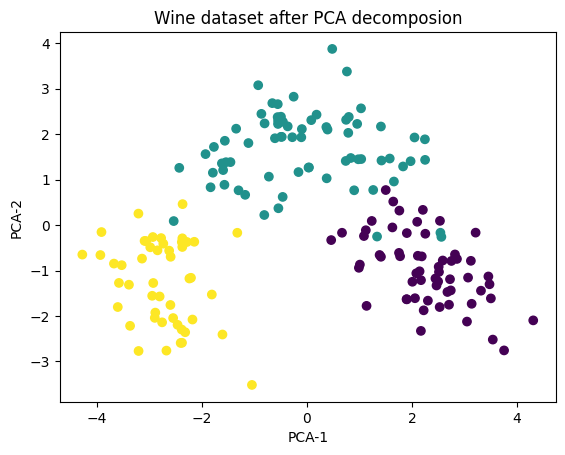

In [3]:
pca = PCA(n_components=2).fit_transform(X_scaled)

plt.scatter(pca[:,0], pca[:,1], c=Y)
plt.title('Wine dataset after PCA decomposion')
plt.xlabel('PCA-1')
plt.ylabel('PCA-2')
plt.show()

In [4]:
objective_func_vals = []

def callback_graph(weights, obj_func_eval):
  clear_output(wait=True)
  objective_func_vals.append(obj_func_eval)
  plt.title("Objective function value against iteration")
  plt.xlabel("Iteration")
  plt.ylabel("Objective function value")
  plt.plot(range(len(objective_func_vals)), objective_func_vals)
  plt.show()

# **EfficientSU2 RealAmplitude Test**

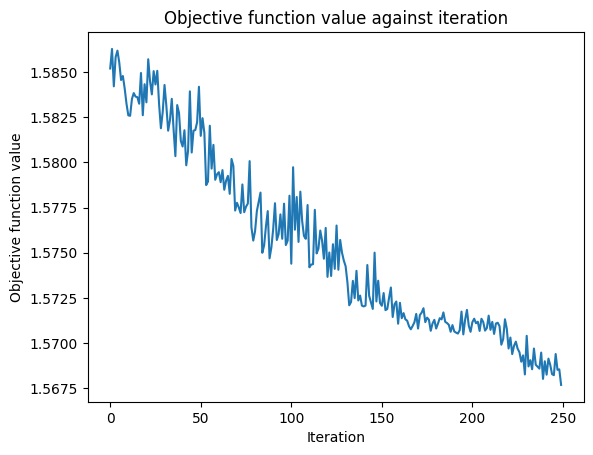

Time:
 [5293.310708284378, 5642.990312576294, 5901.552375078201, 5685.3611536026, 5437.826009750366]
Precision:
 [0.383203601953602, 0.3968253968253968, 0.46825396825396826, 0.41666666666666674, 0.24848484848484853]
Accuracy:
 [0.3888888888888889, 0.3611111111111111, 0.4444444444444444, 0.4166666666666667, 0.25]
Recalls:
 [0.3888888888888889, 0.3611111111111111, 0.4444444444444444, 0.4166666666666667, 0.25]
F1:
 [0.3847736625514403, 0.3611111111111111, 0.44323232323232326, 0.4111111111111111, 0.24783312047679867]


In [12]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(5):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, random_state=42, test_size=0.2)


  MAXITR = 250
  num_qubits = X.shape[1]
  opt = COBYLA(maxiter=MAXITR)

  featuremap = ZZFeatureMap(feature_dimension=num_qubits, reps=1, parameter_prefix='x')
  ansatz = RealAmplitudes(num_qubits=num_qubits, reps=3)



  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)
  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  score = vqc.score(X_test, Y_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='weighted')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Time:\n",times)
  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recalls:\n",recalls)
  print("F1:\n",f1s)

Time:
 [5293.310708284378, 5642.990312576294, 5901.552375078201, 5685.3611536026, 5437.826009750366]
Precision:
 [0.383203601953602, 0.3968253968253968, 0.46825396825396826, 0.41666666666666674, 0.24848484848484853]
Accuracy:
 [0.3888888888888889, 0.3611111111111111, 0.4444444444444444, 0.4166666666666667, 0.25]
Recalls:
 [0.3888888888888889, 0.3611111111111111, 0.4444444444444444, 0.4166666666666667, 0.25]
F1:
 [0.3847736625514403, 0.3611111111111111, 0.44323232323232326, 0.4111111111111111, 0.24783312047679867]

Precision:
 0.3560606060606061
Accuracy:
 0.3333333333333333
Recalls:
 0.3333333333333333
F1:
 0.34122807017543866


In [11]:
print("Time:\n",time)
print("Precision:\n",precision)
print("Accuracy:\n",accuracy)
print("Recalls:\n",recall)
print("F1:\n",f1)

Time:
 <module 'time' (built-in)>
Precision:
 0.3560606060606061
Accuracy:
 0.3333333333333333
Recalls:
 0.3333333333333333
F1:
 0.34122807017543866


In [ ]:
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, random_state=42, test_size=0.2)


  MAXITR = 250
  num_qubits = X.shape[1]
  opt = COBYLA(maxiter=MAXITR)

  featuremap = ZZFeatureMap(feature_dimension=num_qubits, reps=1, parameter_prefix='x')
  ansatz = RealAmplitudes(num_qubits=num_qubits, reps=4)



  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)
  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  score = vqc.score(X_test, Y_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='weighted')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Time:\n",times)
  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recalls:\n",recalls)
  print("F1:\n",f1s)

In [ ]:
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, random_state=42, test_size=0.2)


  MAXITR = 200
  num_qubits = X.shape[1]
  opt = COBYLA(maxiter=MAXITR)

  featuremap = ZFeatureMap(feature_dimension=num_qubits, reps=0, parameter_prefix='x')
  ansatz = RealAmplitudes(num_qubits=num_qubits, reps=3)



  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)
  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  score = vqc.score(X_test, Y_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='weighted')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Time:\n",times)
  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recalls:\n",recalls)
  print("F1:\n",f1s)

# **EfficientSU2 RealAmplitude**

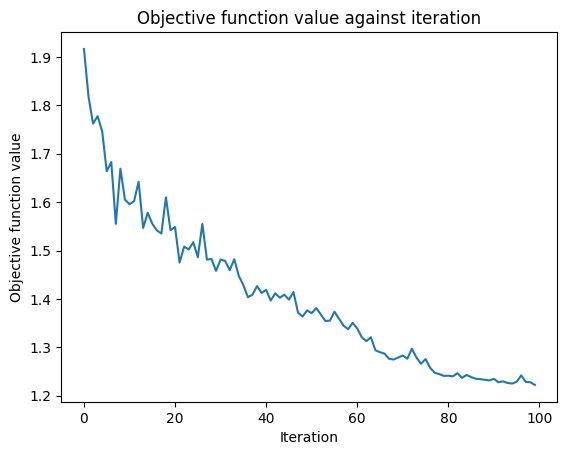

Precision:
 [0.6214424951267056, 0.7377104377104378, 0.700925925925926, 0.8037037037037037, 0.8164983164983164, 0.8213675213675214, 0.7646335146335147, 0.7377104377104378, 0.7453703703703703, 0.7250000000000001]
Accuracy:
 [0.6388888888888888, 0.7222222222222222, 0.6944444444444444, 0.7777777777777778, 0.8055555555555556, 0.8055555555555556, 0.75, 0.7222222222222222, 0.7222222222222222, 0.7222222222222222]
Recall:
 [0.5654761904761905, 0.7440476190476191, 0.6309523809523809, 0.8095238095238096, 0.8333333333333334, 0.7976190476190476, 0.7678571428571429, 0.7440476190476191, 0.6547619047619048, 0.7440476190476191]
F1:
 [0.5987228607918264, 0.7180211064058614, 0.6776437070554718, 0.7749999999999999, 0.8036611323967646, 0.8106995884773662, 0.7509538328251779, 0.7180211064058614, 0.6987567987567989, 0.7198480531813866]
Time:
 [44.73607587814331, 45.182942628860474, 45.09380078315735, 44.72313833236694, 45.28283071517944, 44.89192199707031, 44.825681924819946, 45.16391682624817, 44.833934307

In [14]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

  rf = RandomForestClassifier(random_state=42)

  rf.fit(X_train, Y_train)

  feature_importances = rf.feature_importances_

  least_important_index = np.argmin(feature_importances)

  X_train = np.delete(X_train, least_important_index, axis=1)

  X_test = np.delete(X_test, least_important_index, axis=1)


  MAXITR = 100
  num_qubits = X.shape[1] //2
  opt = COBYLA(maxiter=MAXITR)

  featuremap = EfficientSU2(num_qubits=num_qubits, reps=0, parameter_prefix='x')
  ansatz = RealAmplitudes(num_qubits=num_qubits, reps=1)



  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)

  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recall:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)


**Precision:**
 [0.6214424951267056, 0.7377104377104378, 0.700925925925926, 0.8037037037037037, 0.8164983164983164, 0.8213675213675214, 0.7646335146335147, 0.7377104377104378, 0.7453703703703703, 0.7250000000000001]
**Mean Precision**
0.7474362723046933±0.057

**Accuracy:**
 [0.6388888888888888, 0.7222222222222222, 0.6944444444444444, 0.7777777777777778, 0.8055555555555556, 0.8055555555555556, 0.75, 0.7222222222222222, 0.7222222222222222, 0.7222222222222222]
**Mean Accuracy**
0.7361111111111112±0.0485

**Recall:**
 [0.5654761904761905, 0.7440476190476191, 0.6309523809523809, 0.8095238095238096, 0.8333333333333334, 0.7976190476190476, 0.7678571428571429, 0.7440476190476191, 0.6547619047619048, 0.7440476190476191]
**Mean Recall**
0.7291666666666666±0.081

**F1:**
 [0.5987228607918264, 0.7180211064058614, 0.6776437070554718, 0.7749999999999999, 0.8036611323967646, 0.8106995884773662, 0.7509538328251779, 0.7180211064058614, 0.6987567987567989, 0.7198480531813866]
**Mean F1**
 0.7271328186296515±0.06
 
**Time:**
 [44.73607587814331, 45.182942628860474, 45.09380078315735, 44.72313833236694, 45.28283071517944, 44.89192199707031, 44.825681924819946, 45.16391682624817, 44.83393430709839, 45.07991600036621]
**Mean Time**
44.98141593933106±0.19183722560274505


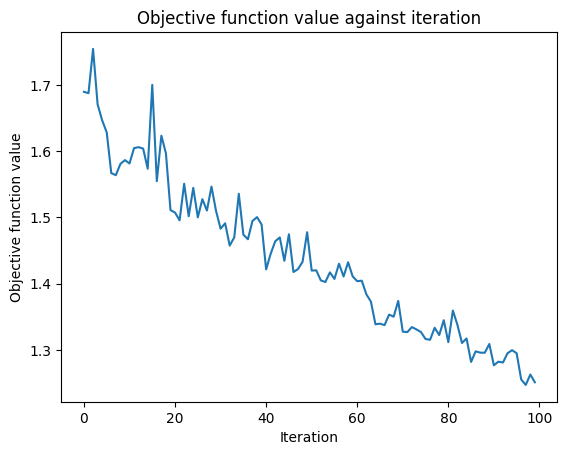

Precision:
 [0.7281576448243116, 0.7396534792368126, 0.691358024691358, 0.8475783475783476, 0.826071169208424, 0.7768389018389018, 0.7231481481481481, 0.9145299145299144, 0.7930021367521367, 0.858974358974359]
Accuracy:
 [0.7222222222222222, 0.7222222222222222, 0.5833333333333334, 0.8055555555555556, 0.6944444444444444, 0.75, 0.6944444444444444, 0.8611111111111112, 0.7222222222222222, 0.8055555555555556]
Recall:
 [0.7083333333333334, 0.7261904761904763, 0.625, 0.8154761904761904, 0.7202380952380952, 0.75, 0.6666666666666666, 0.8809523809523809, 0.7619047619047619, 0.8333333333333334]
F1:
 [0.7243403534253209, 0.7141028900754302, 0.593088071348941, 0.8146502057613169, 0.7190499194847021, 0.7574765498742109, 0.7056030389363723, 0.8705087505087504, 0.7137566137566138, 0.8069933287324592]
Time:
 [52.816195249557495, 52.510732650756836, 52.81733536720276, 52.360251665115356, 52.5595862865448, 52.17078900337219, 52.21463871002197, 52.171632289886475, 52.5647656917572, 61.878737449645996]


In [15]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

  rf = RandomForestClassifier(random_state=42)

  rf.fit(X_train, Y_train)

  feature_importances = rf.feature_importances_

  least_important_index = np.argmin(feature_importances)

  X_train = np.delete(X_train, least_important_index, axis=1)

  X_test = np.delete(X_test, least_important_index, axis=1)


  MAXITR = 100
  num_qubits = X.shape[1] //2
  opt = COBYLA(maxiter=MAXITR)

  featuremap = EfficientSU2(num_qubits=num_qubits, reps=0, parameter_prefix='x')
  ansatz = RealAmplitudes(num_qubits=num_qubits, reps=2)



  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)

  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recall:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)

**Precision:**
 [0.7281576448243116, 0.7396534792368126, 0.691358024691358, 0.8475783475783476, 0.826071169208424, 0.7768389018389018, 0.7231481481481481, 0.9145299145299144, 0.7930021367521367, 0.858974358974359]
**Mean Precision**
0.7899312125782714±0.0675

**Accuracy:**
 [0.7222222222222222, 0.7222222222222222, 0.5833333333333334, 0.8055555555555556, 0.6944444444444444, 0.75, 0.6944444444444444, 0.8611111111111112, 0.7222222222222222, 0.8055555555555556]
**Mean Accuracy**
0.736111111111111±0.07

**Recall:**
 [0.7083333333333334, 0.7261904761904763, 0.625, 0.8154761904761904, 0.7202380952380952, 0.75, 0.6666666666666666, 0.8809523809523809, 0.7619047619047619, 0.8333333333333334]
**Mean Recall**
0.7488095238095237±0.07

**F1:**
 [0.7243403534253209, 0.7141028900754302, 0.593088071348941, 0.8146502057613169, 0.7190499194847021, 0.7574765498742109, 0.7056030389363723, 0.8705087505087504, 0.7137566137566138, 0.8069933287324592]
**Mean F1**
0.7419569721904117±0.07

**Time:**
 [52.816195249557495, 52.510732650756836, 52.81733536720276, 52.360251665115356, 52.5595862865448, 52.17078900337219, 52.21463871002197, 52.171632289886475, 52.5647656917572, 61.878737449645996]
**Mean Time**
53.40646643638611±2.8331891840115353


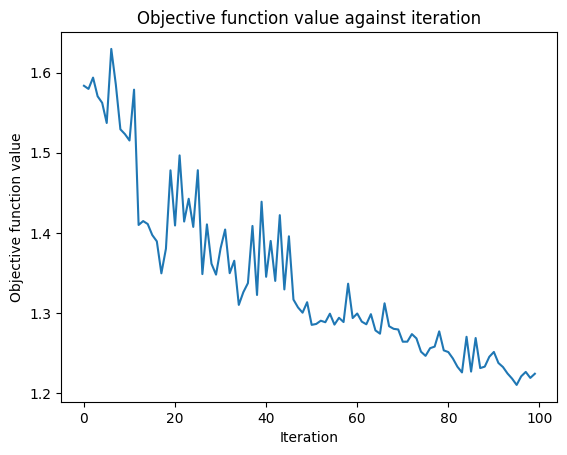

Precision:
 [0.7790775401069517, 0.8391203703703703, 0.8048128342245989, 0.7444919278252612, 0.8529411764705882, 0.7905982905982907, 0.7393162393162394, 0.7133986928104575, 0.861111111111111, 0.8352326685660019]
Accuracy:
 [0.75, 0.8333333333333334, 0.75, 0.7222222222222222, 0.8333333333333334, 0.7222222222222222, 0.7222222222222222, 0.7222222222222222, 0.8333333333333334, 0.8333333333333334]
Recall:
 [0.7678571428571429, 0.8214285714285715, 0.7678571428571428, 0.6904761904761904, 0.8035714285714285, 0.7261904761904763, 0.7083333333333334, 0.6726190476190476, 0.8571428571428571, 0.8392857142857143]
F1:
 [0.7373823120851983, 0.8327635327635328, 0.7476462417039667, 0.720985675846787, 0.8304383788254756, 0.7391240446796002, 0.7283950617283951, 0.7091949269368624, 0.8358974358974359, 0.8332122972645848]
Time:
 [76.32098650932312, 75.27909421920776, 75.73418712615967, 75.87146735191345, 76.82432293891907, 77.38650250434875, 76.24178504943848, 75.9535825252533, 76.1426293849945, 76.709034442

In [16]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

  rf = RandomForestClassifier(random_state=42)

  rf.fit(X_train, Y_train)

  feature_importances = rf.feature_importances_

  least_important_index = np.argmin(feature_importances)

  X_train = np.delete(X_train, least_important_index, axis=1)

  X_test = np.delete(X_test, least_important_index, axis=1)


  MAXITR = 100
  num_qubits = X.shape[1] //2
  opt = COBYLA(maxiter=MAXITR)

  featuremap = EfficientSU2(num_qubits=num_qubits, reps=0, parameter_prefix='x')
  ansatz = RealAmplitudes(num_qubits=num_qubits, reps=3)



  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)

  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recall:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)

**Precision:**
 [0.7790775401069517, 0.8391203703703703, 0.8048128342245989, 0.7444919278252612, 0.8529411764705882, 0.7905982905982907, 0.7393162393162394, 0.7133986928104575, 0.861111111111111, 0.8352326685660019]
**Mean Precision**
0.7960100851399871±0.049

**Accuracy:**
 [0.75, 0.8333333333333334, 0.75, 0.7222222222222222, 0.8333333333333334, 0.7222222222222222, 0.7222222222222222, 0.7222222222222222, 0.8333333333333334, 0.8333333333333334]
**Mean Accuracy**
0.7722222222222221±0.05

**Recall:**
 [0.7678571428571429, 0.8214285714285715, 0.7678571428571428, 0.6904761904761904, 0.8035714285714285, 0.7261904761904763, 0.7083333333333334, 0.6726190476190476, 0.8571428571428571, 0.8392857142857143]
**Mean Recall**
0.7654761904761904±0.061

**F1:**
 [0.7373823120851983, 0.8327635327635328, 0.7476462417039667, 0.720985675846787, 0.8304383788254756, 0.7391240446796002, 0.7283950617283951, 0.7091949269368624, 0.8358974358974359, 0.8332122972645848]
**Mean F1**
0.7715039907731838±0.051

**Time:**
 [76.32098650932312, 75.27909421920776, 75.73418712615967, 75.87146735191345, 76.82432293891907, 77.38650250434875, 76.24178504943848, 75.9535825252533, 76.1426293849945, 76.70903444290161]
**Mean Time**
76.24635920524597±0.5734606443643983



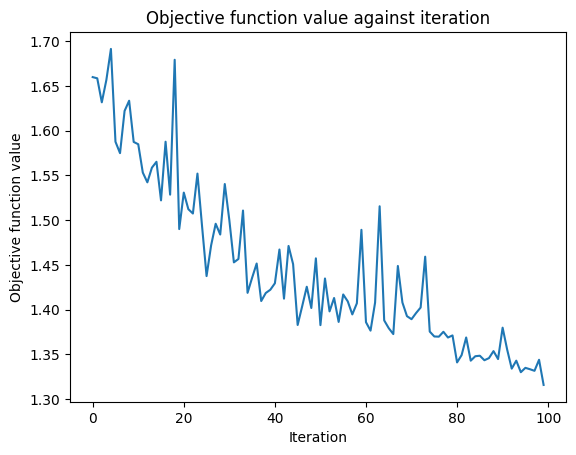

Precision:
 [0.7942760942760942, 0.6715399610136452, 0.7627314814814814, 0.7833333333333333, 0.7000000000000001, 0.7583333333333333, 0.7671156004489338, 0.8962962962962963, 0.7374465811965812, 0.7953897953897954]
Accuracy:
 [0.7777777777777778, 0.6666666666666666, 0.75, 0.7777777777777778, 0.5833333333333334, 0.6666666666666666, 0.6944444444444444, 0.8055555555555556, 0.6944444444444444, 0.7777777777777778]
Recall:
 [0.7916666666666666, 0.6071428571428571, 0.7321428571428571, 0.7738095238095237, 0.625, 0.6964285714285715, 0.7380952380952381, 0.8333333333333334, 0.7380952380952381, 0.8095238095238096]
F1:
 [0.7789697743720733, 0.6414141414141414, 0.7531339031339032, 0.7778471247031086, 0.5831584207896052, 0.6805555555555556, 0.6959742351046699, 0.8119032515167781, 0.6767195767195767, 0.7746502057613169]
Time:
 [86.75473022460938, 71.71454548835754, 67.17946887016296, 66.76259326934814, 67.61312699317932, 67.66738533973694, 67.39995288848877, 67.85497641563416, 67.81648087501526, 67.6350

In [17]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

  rf = RandomForestClassifier(random_state=42)

  rf.fit(X_train, Y_train)

  feature_importances = rf.feature_importances_

  least_important_index = np.argmin(feature_importances)

  X_train = np.delete(X_train, least_important_index, axis=1)

  X_test = np.delete(X_test, least_important_index, axis=1)


  MAXITR = 100
  num_qubits = X.shape[1] //2
  opt = COBYLA(maxiter=MAXITR)

  featuremap = EfficientSU2(num_qubits=num_qubits, reps=0, parameter_prefix='x')
  ansatz = RealAmplitudes(num_qubits=num_qubits, reps=4)



  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)

  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recall:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)

**Precision:**
 [0.7942760942760942, 0.6715399610136452, 0.7627314814814814, 0.7833333333333333, 0.7000000000000001, 0.7583333333333333, 0.7671156004489338, 0.8962962962962963, 0.7374465811965812, 0.7953897953897954]
**Mean Precision**
0.7666462476769494±0.0575

**Accuracy:**
 [0.7777777777777778, 0.6666666666666666, 0.75, 0.7777777777777778, 0.5833333333333334, 0.6666666666666666, 0.6944444444444444, 0.8055555555555556, 0.6944444444444444, 0.7777777777777778]
**Mean Accuracy**
0.7194444444444444±0.066

**Recall:**
 [0.7916666666666666, 0.6071428571428571, 0.7321428571428571, 0.7738095238095237, 0.625, 0.6964285714285715, 0.7380952380952381, 0.8333333333333334, 0.7380952380952381, 0.8095238095238096]
**Mean Recall**
0.7345238095238095±0.07

**F1:**
 [0.7789697743720733, 0.6414141414141414, 0.7531339031339032, 0.7778471247031086, 0.5831584207896052, 0.6805555555555556, 0.6959742351046699, 0.8119032515167781, 0.6767195767195767, 0.7746502057613169]
**Mean F1**
0.7174326189070729±0.069

**Time:**
 [86.75473022460938, 71.71454548835754, 67.17946887016296, 66.76259326934814, 67.61312699317932, 67.66738533973694, 67.39995288848877, 67.85497641563416, 67.81648087501526, 67.63500785827637]
**Mean Time**
69.83982682228088±5.785333728659437



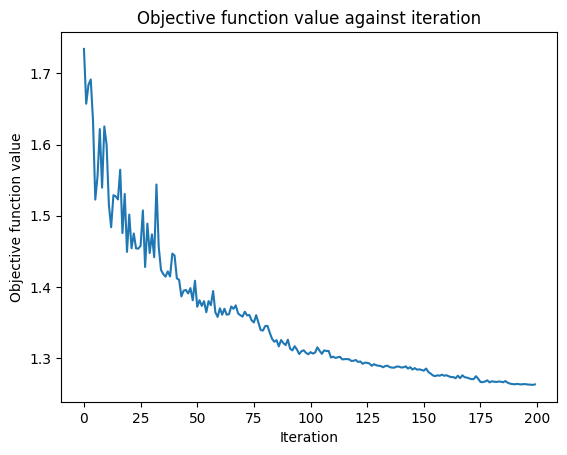

Precision:
 [0.7759081196581197, 0.8339506172839506, 0.7268518518518519, 0.8492063492063492, 0.7858796296296297, 0.8728395061728396, 0.8658119658119658, 0.8453703703703703, 0.8675925925925926, 0.7268518518518519]
Accuracy:
 [0.6944444444444444, 0.8333333333333334, 0.6944444444444444, 0.7777777777777778, 0.7222222222222222, 0.8611111111111112, 0.8611111111111112, 0.8333333333333334, 0.8611111111111112, 0.6666666666666666]
Recall:
 [0.7202380952380952, 0.8392857142857143, 0.7023809523809524, 0.8095238095238094, 0.7440476190476191, 0.8630952380952381, 0.8809523809523809, 0.8392857142857143, 0.8809523809523809, 0.7142857142857143]
F1:
 [0.6925925925925926, 0.8308108389244293, 0.7017094017094017, 0.7777777777777778, 0.7235690235690236, 0.8638199753818416, 0.8600823045267489, 0.8352326685660019, 0.8599240265906932, 0.6594146594146593]
Time:
 [157.6887183189392, 159.0414764881134, 136.8200535774231, 160.45677137374878, 152.4491515159607, 154.19775128364563, 158.89716267585754, 157.55722141265

In [6]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

  rf = RandomForestClassifier(random_state=42)

  rf.fit(X_train, Y_train)

  feature_importances = rf.feature_importances_

  least_important_index = np.argmin(feature_importances)

  X_train = np.delete(X_train, least_important_index, axis=1)

  X_test = np.delete(X_test, least_important_index, axis=1)


  MAXITR = 200
  num_qubits = X.shape[1] //2
  opt = COBYLA(maxiter=MAXITR)

  featuremap = EfficientSU2(num_qubits=num_qubits, reps=0, parameter_prefix='x')
  ansatz = RealAmplitudes(num_qubits=num_qubits, reps=2)



  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)

  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recall:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)
  
  t = np.mean(times)
  t_std = np.std(times)
  p = np.mean(precisions)
  p_std = np.std(precisions)
  a = np.mean(accuracies)
  a_std = np.std(accuracies)
  f = np.mean(f1s)
  f_std = np.std(f1s)
  r = np.mean(recalls)
  r_std = np.std(recalls)
  
  print(f"Mean Precision: {p}±{p_std}")
  print(f"Mean Accuracy: {a}±{a_std}")
  print(f"Mean Recall: {r}±{r_std}")
  print(f"Mean F1: {f}±{f_std}")
  print(f"Mean Time: {t}±{t_std}")

Precision:
 [0.7759081196581197, 0.8339506172839506, 0.7268518518518519, 0.8492063492063492, 0.7858796296296297, 0.8728395061728396, 0.8658119658119658, 0.8453703703703703, 0.8675925925925926, 0.7268518518518519]
Accuracy:
 [0.6944444444444444, 0.8333333333333334, 0.6944444444444444, 0.7777777777777778, 0.7222222222222222, 0.8611111111111112, 0.8611111111111112, 0.8333333333333334, 0.8611111111111112, 0.6666666666666666]
Recall:
 [0.7202380952380952, 0.8392857142857143, 0.7023809523809524, 0.8095238095238094, 0.7440476190476191, 0.8630952380952381, 0.8809523809523809, 0.8392857142857143, 0.8809523809523809, 0.7142857142857143]
F1:
 [0.6925925925925926, 0.8308108389244293, 0.7017094017094017, 0.7777777777777778, 0.7235690235690236, 0.8638199753818416, 0.8600823045267489, 0.8352326685660019, 0.8599240265906932, 0.6594146594146593]
Time:
 [157.6887183189392, 159.0414764881134, 136.8200535774231, 160.45677137374878, 152.4491515159607, 154.19775128364563, 158.89716267585754, 157.5572214126587, 183.12195253372192, 185.66141748428345]
Mean Precision: 0.8150262854429521±0.0539084046984603
Mean Accuracy: 0.7805555555555557±0.07500000000000004
Mean Recall: 0.799404761904762±0.06828654861016505
Mean F1: 0.7804933269053171±0.07546950344317474
Mean Time: 160.58916766643523±13.532575578365558


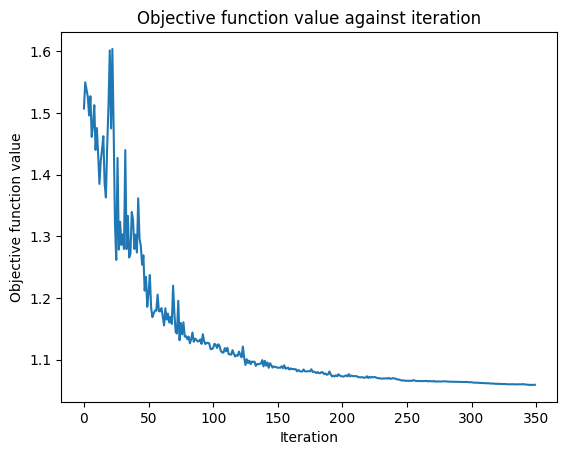

Precision:
 [0.780911680911681, 0.7458791208791209, 0.7947118241235889, 0.8147500647500647, 0.7991452991452992, 0.8179012345679012, 0.7648148148148148, 0.6743827160493827, 0.7882716049382715, 0.7790080290080291]
Accuracy:
 [0.7777777777777778, 0.75, 0.7777777777777778, 0.8055555555555556, 0.75, 0.7777777777777778, 0.75, 0.6666666666666666, 0.7222222222222222, 0.75]
Recall:
 [0.7738095238095237, 0.6964285714285715, 0.7738095238095237, 0.8333333333333334, 0.75, 0.7738095238095238, 0.7857142857142857, 0.6607142857142857, 0.7619047619047619, 0.7857142857142857]
F1:
 [0.7785582517383283, 0.745679012345679, 0.7788530465949821, 0.8031522300528148, 0.7636213991769548, 0.7771827934072181, 0.7425925925925926, 0.6681489571956104, 0.724266072092159, 0.7484574684574685]
Time:
 [311.1585063934326, 255.03251266479492, 213.39250016212463, 228.96563529968262, 312.2219338417053, 332.3385133743286, 312.91119408607483, 307.01017117500305, 300.11864376068115, 279.1121680736542]
Mean Precision: 0.7759776389

In [7]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

  rf = RandomForestClassifier(random_state=42)

  rf.fit(X_train, Y_train)

  feature_importances = rf.feature_importances_

  least_important_index = np.argmin(feature_importances)

  X_train = np.delete(X_train, least_important_index, axis=1)

  X_test = np.delete(X_test, least_important_index, axis=1)


  MAXITR = 350
  num_qubits = X.shape[1] //2
  opt = COBYLA(maxiter=MAXITR)

  featuremap = EfficientSU2(num_qubits=num_qubits, reps=0, parameter_prefix='x')
  ansatz = RealAmplitudes(num_qubits=num_qubits, reps=3)



  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)

  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recall:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)
  
  t = np.mean(times)
  t_std = np.std(times)
  p = np.mean(precisions)
  p_std = np.std(precisions)
  a = np.mean(accuracies)
  a_std = np.std(accuracies)
  f = np.mean(f1s)
  f_std = np.std(f1s)
  r = np.mean(recalls)
  r_std = np.std(recalls)
  
  print(f"Mean Precision: {p}±{p_std}")
  print(f"Mean Accuracy: {a}±{a_std}")
  print(f"Mean Recall: {r}±{r_std}")
  print(f"Mean F1: {f}±{f_std}")
  print(f"Mean Time: {t}±{t_std}")

Precision:
 [0.780911680911681, 0.7458791208791209, 0.7947118241235889, 0.8147500647500647, 0.7991452991452992, 0.8179012345679012, 0.7648148148148148, 0.6743827160493827, 0.7882716049382715, 0.7790080290080291]
Accuracy:
 [0.7777777777777778, 0.75, 0.7777777777777778, 0.8055555555555556, 0.75, 0.7777777777777778, 0.75, 0.6666666666666666, 0.7222222222222222, 0.75]
Recall:
 [0.7738095238095237, 0.6964285714285715, 0.7738095238095237, 0.8333333333333334, 0.75, 0.7738095238095238, 0.7857142857142857, 0.6607142857142857, 0.7619047619047619, 0.7857142857142857]
F1:
 [0.7785582517383283, 0.745679012345679, 0.7788530465949821, 0.8031522300528148, 0.7636213991769548, 0.7771827934072181, 0.7425925925925926, 0.6681489571956104, 0.724266072092159, 0.7484574684574685]
Time:
 [311.1585063934326, 255.03251266479492, 213.39250016212463, 228.96563529968262, 312.2219338417053, 332.3385133743286, 312.91119408607483, 307.01017117500305, 300.11864376068115, 279.1121680736542]
 
Mean Precision: 0.7759776389188154±0.039604704860181306
Mean Accuracy: 0.7527777777777778±0.03611111111111113
Mean Recall: 0.7595238095238095±0.04612231101859646
Mean F1: 0.7530511823653808±0.03569639969316011
Mean Time: 285.2261778831482±37.89192674563356


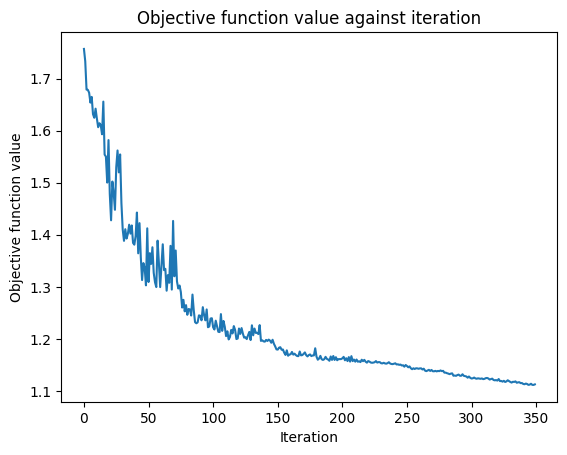

Precision:
 [0.7777777777777779, 0.8314814814814815, 0.8411172161172161, 0.925925925925926, 0.7808641975308642, 0.7899167109693426, 0.9069865319865319, 0.7745935981230098, 0.8340548340548339, 0.8176557239057238]
Accuracy:
 [0.75, 0.75, 0.8333333333333334, 0.8888888888888888, 0.7222222222222222, 0.7777777777777778, 0.8888888888888888, 0.7777777777777778, 0.7777777777777778, 0.8055555555555556]
Recall:
 [0.7678571428571429, 0.7857142857142857, 0.8214285714285715, 0.9047619047619048, 0.7083333333333334, 0.7559523809523809, 0.9047619047619048, 0.7380952380952381, 0.8095238095238096, 0.7976190476190476]
F1:
 [0.7538461538461538, 0.758082497212932, 0.8345679012345679, 0.8944855967078189, 0.722257295173962, 0.7686964886964888, 0.8906799286916246, 0.7700214295196374, 0.7838383838383839, 0.8050108932461875]
Time:
 [347.12161350250244, 286.90353989601135, 263.5774738788605, 256.0851500034332, 268.6017396450043, 289.6581699848175, 289.1336042881012, 315.86271619796753, 244.51508331298828, 234.868

In [8]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

  rf = RandomForestClassifier(random_state=42)

  rf.fit(X_train, Y_train)

  feature_importances = rf.feature_importances_

  least_important_index = np.argmin(feature_importances)

  X_train = np.delete(X_train, least_important_index, axis=1)

  X_test = np.delete(X_test, least_important_index, axis=1)


  MAXITR = 350
  num_qubits = X.shape[1] //2
  opt = COBYLA(maxiter=MAXITR)

  featuremap = EfficientSU2(num_qubits=num_qubits, reps=0, parameter_prefix='x')
  ansatz = RealAmplitudes(num_qubits=num_qubits, reps=4)



  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)

  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recall:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)
  
  t = np.mean(times)
  t_std = np.std(times)
  p = np.mean(precisions)
  p_std = np.std(precisions)
  a = np.mean(accuracies)
  a_std = np.std(accuracies)
  f = np.mean(f1s)
  f_std = np.std(f1s)
  r = np.mean(recalls)
  r_std = np.std(recalls)
  
  print(f"Mean Precision: {p}±{p_std}")
  print(f"Mean Accuracy: {a}±{a_std}")
  print(f"Mean Recall: {r}±{r_std}")
  print(f"Mean F1: {f}±{f_std}")
  print(f"Mean Time: {t}±{t_std}")

Precision:
 [0.7777777777777779, 0.8314814814814815, 0.8411172161172161, 0.925925925925926, 0.7808641975308642, 0.7899167109693426, 0.9069865319865319, 0.7745935981230098, 0.8340548340548339, 0.8176557239057238]
Accuracy:
 [0.75, 0.75, 0.8333333333333334, 0.8888888888888888, 0.7222222222222222, 0.7777777777777778, 0.8888888888888888, 0.7777777777777778, 0.7777777777777778, 0.8055555555555556]
Recall:
 [0.7678571428571429, 0.7857142857142857, 0.8214285714285715, 0.9047619047619048, 0.7083333333333334, 0.7559523809523809, 0.9047619047619048, 0.7380952380952381, 0.8095238095238096, 0.7976190476190476]
F1:
 [0.7538461538461538, 0.758082497212932, 0.8345679012345679, 0.8944855967078189, 0.722257295173962, 0.7686964886964888, 0.8906799286916246, 0.7700214295196374, 0.7838383838383839, 0.8050108932461875]
Time:
 [347.12161350250244, 286.90353989601135, 263.5774738788605, 256.0851500034332, 268.6017396450043, 289.6581699848175, 289.1336042881012, 315.86271619796753, 244.51508331298828, 234.868145942688]
Mean Precision: 0.8280373997872708±0.05020241876222019
Mean Accuracy: 0.7972222222222223±0.05422005915539759
Mean Recall: 0.799404761904762±0.06157478446273809
Mean F1: 0.7981486568167756±0.05514268458926651
Mean Time: 279.63272366523745±32.06565397379309


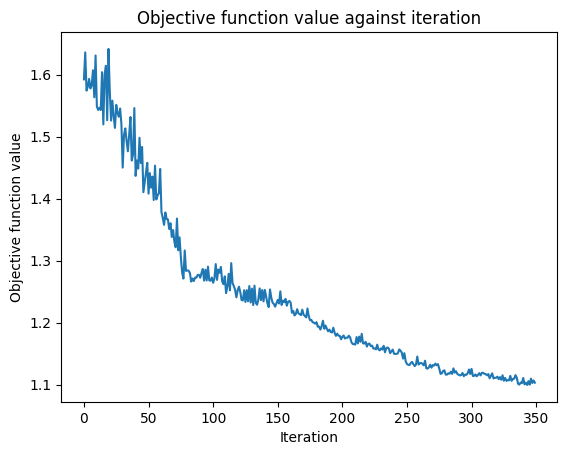

Precision:
 [0.7145169645169644, 0.8611111111111112, 0.8122248122248122, 0.8715277777777778, 0.76003626003626, 0.8543771043771043, 0.8267288267288266, 0.9313725490196079, 0.8675925925925926, 0.8461279461279462]
Accuracy:
 [0.6944444444444444, 0.8333333333333334, 0.7777777777777778, 0.8611111111111112, 0.75, 0.8333333333333334, 0.7777777777777778, 0.9166666666666666, 0.8611111111111112, 0.8333333333333334]
Recall:
 [0.7023809523809524, 0.8571428571428571, 0.7916666666666666, 0.8452380952380952, 0.7857142857142857, 0.8392857142857143, 0.7916666666666666, 0.8928571428571429, 0.8809523809523809, 0.8392857142857143]
F1:
 [0.6987554355975409, 0.8358974358974359, 0.7835390946502058, 0.8626780626780626, 0.7435390946502056, 0.8373735859115976, 0.7871225071225072, 0.9162162674707477, 0.8599240265906932, 0.8326096211153682]
Time:
 [319.98791456222534, 312.1341497898102, 328.51771688461304, 359.2085392475128, 354.0081787109375, 339.7797763347626, 367.373450756073, 358.85884189605713, 364.052168130

In [6]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

  rf = RandomForestClassifier(random_state=42)

  rf.fit(X_train, Y_train)

  feature_importances = rf.feature_importances_

  least_important_index = np.argmin(feature_importances)

  X_train = np.delete(X_train, least_important_index, axis=1)

  X_test = np.delete(X_test, least_important_index, axis=1)


  MAXITR = 350
  num_qubits = X.shape[1] //2
  opt = COBYLA(maxiter=MAXITR)

  featuremap = EfficientSU2(num_qubits=num_qubits, reps=0, parameter_prefix='x')
  ansatz = RealAmplitudes(num_qubits=num_qubits, reps=5)



  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)

  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recall:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)
  
  t = np.mean(times)
  t_std = np.std(times)
  p = np.mean(precisions)
  p_std = np.std(precisions)
  a = np.mean(accuracies)
  a_std = np.std(accuracies)
  f = np.mean(f1s)
  f_std = np.std(f1s)
  r = np.mean(recalls)
  r_std = np.std(recalls)
  
  print(f"Mean Precision: {p}±{p_std}")
  print(f"Mean Accuracy: {a}±{a_std}")
  print(f"Mean Recall: {r}±{r_std}")
  print(f"Mean F1: {f}±{f_std}")
  print(f"Mean Time: {t}±{t_std}")

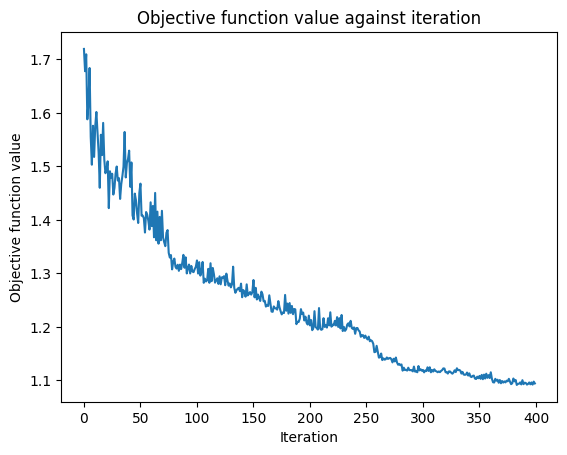

Precision:
 [0.8914141414141414, 0.8358585858585859, 0.8987654320987654, 0.7916666666666666, 0.8904558404558406, 0.8593628593628594, 0.925925925925926, 0.9555555555555555, 0.9145299145299144, 0.8555555555555556]
Accuracy:
 [0.8611111111111112, 0.8055555555555556, 0.8888888888888888, 0.75, 0.8888888888888888, 0.8333333333333334, 0.8888888888888888, 0.9444444444444444, 0.8611111111111112, 0.8333333333333334]
Recall:
 [0.8630952380952381, 0.8154761904761904, 0.8869047619047619, 0.7321428571428571, 0.8869047619047619, 0.8392857142857143, 0.9047619047619048, 0.9523809523809524, 0.8809523809523809, 0.8214285714285715]
F1:
 [0.8670760233918129, 0.8115204678362573, 0.890639898753489, 0.758641975308642, 0.8887824606215412, 0.8395894770163775, 0.8944855967078189, 0.9465020576131687, 0.8705087505087504, 0.8404558404558403]
Time:
 [419.23716950416565, 420.58189511299133, 453.9924397468567, 388.902286529541, 436.4370186328888, 382.43630051612854, 447.8029639720917, 367.80679869651794, 365.081455945

In [7]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

  rf = RandomForestClassifier(random_state=42)

  rf.fit(X_train, Y_train)

  feature_importances = rf.feature_importances_

  least_important_index = np.argmin(feature_importances)

  X_train = np.delete(X_train, least_important_index, axis=1)

  X_test = np.delete(X_test, least_important_index, axis=1)


  MAXITR = 400
  num_qubits = X.shape[1] //2
  opt = COBYLA(maxiter=MAXITR)

  featuremap = EfficientSU2(num_qubits=num_qubits, reps=0, parameter_prefix='x')
  ansatz = RealAmplitudes(num_qubits=num_qubits, reps=6)



  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)

  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recall:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)
  
  t = np.mean(times)
  t_std = np.std(times)
  p = np.mean(precisions)
  p_std = np.std(precisions)
  a = np.mean(accuracies)
  a_std = np.std(accuracies)
  f = np.mean(f1s)
  f_std = np.std(f1s)
  r = np.mean(recalls)
  r_std = np.std(recalls)
  
  print(f"Mean Precision: {p}±{p_std}")
  print(f"Mean Accuracy: {a}±{a_std}")
  print(f"Mean Recall: {r}±{r_std}")
  print(f"Mean F1: {f}±{f_std}")
  print(f"Mean Time: {t}±{t_std}")

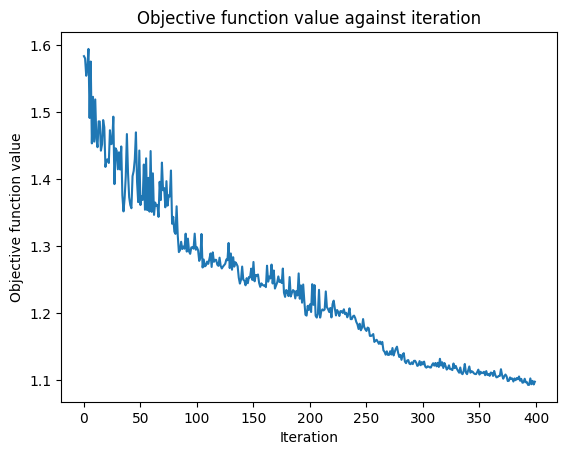

Precision:
 [0.8774928774928775, 0.8574074074074074, 0.8606578606578607, 0.8905723905723906, 0.9393939393939394, 0.9034188034188033, 0.8351851851851853, 0.7929292929292929, 0.8461279461279462, 0.8404558404558404]
Accuracy:
 [0.8333333333333334, 0.7777777777777778, 0.8333333333333334, 0.8611111111111112, 0.9166666666666666, 0.8888888888888888, 0.8333333333333334, 0.7777777777777778, 0.8333333333333334, 0.8333333333333334]
Recall:
 [0.8392857142857143, 0.8095238095238096, 0.8571428571428571, 0.8809523809523809, 0.9285714285714285, 0.8869047619047619, 0.8571428571428571, 0.8095238095238096, 0.8392857142857143, 0.8214285714285715]
F1:
 [0.8434567901234568, 0.7884782608695652, 0.8345679012345679, 0.8633744855967078, 0.9182456140350878, 0.8930041152263376, 0.8300094966761633, 0.7760233918128656, 0.8326096211153682, 0.8358750907770516]
Time:
 [462.1024215221405, 473.39766907691956, 471.97839856147766, 461.4002959728241, 453.0299711227417, 372.9065811634064, 439.92053151130676, 393.20581769943

In [5]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

  rf = RandomForestClassifier(random_state=42)

  rf.fit(X_train, Y_train)

  feature_importances = rf.feature_importances_

  least_important_index = np.argmin(feature_importances)

  X_train = np.delete(X_train, least_important_index, axis=1)

  X_test = np.delete(X_test, least_important_index, axis=1)


  MAXITR = 400
  num_qubits = X.shape[1] //2
  opt = COBYLA(maxiter=MAXITR)

  featuremap = EfficientSU2(num_qubits=num_qubits, reps=0, parameter_prefix='x')
  ansatz = RealAmplitudes(num_qubits=num_qubits, reps=7)



  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)

  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recall:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)
  
  t = np.mean(times)
  t_std = np.std(times)
  p = np.mean(precisions)
  p_std = np.std(precisions)
  a = np.mean(accuracies)
  a_std = np.std(accuracies)
  f = np.mean(f1s)
  f_std = np.std(f1s)
  r = np.mean(recalls)
  r_std = np.std(recalls)
  
  print(f"Mean Precision: {p}±{p_std}")
  print(f"Mean Accuracy: {a}±{a_std}")
  print(f"Mean Recall: {r}±{r_std}")
  print(f"Mean F1: {f}±{f_std}")
  print(f"Mean Time: {t}±{t_std}")

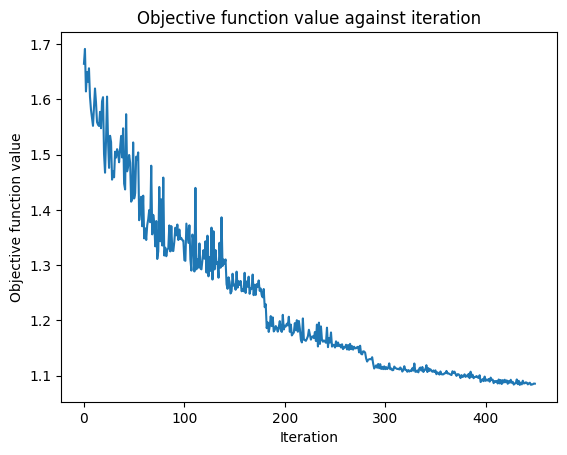

Precision:
 [0.9228395061728395, 0.8838383838383839, 0.9037037037037037, 0.9228395061728395, 0.9166666666666666, 0.9393939393939394, 0.8309116809116809, 0.9116161616161617, 0.8888888888888888, 0.8846153846153846]
Accuracy:
 [0.9166666666666666, 0.8611111111111112, 0.8888888888888888, 0.9166666666666666, 0.9166666666666666, 0.9166666666666666, 0.8333333333333334, 0.8888888888888888, 0.8888888888888888, 0.8333333333333334]
Recall:
 [0.9107142857142857, 0.8809523809523809, 0.9047619047619048, 0.9107142857142857, 0.9107142857142857, 0.9285714285714285, 0.8035714285714285, 0.9047619047619048, 0.8869047619047619, 0.8571428571428571]
F1:
 [0.9186032437666424, 0.8626900584795322, 0.8884120902511707, 0.9186032437666424, 0.9166666666666666, 0.9205944586061546, 0.8312402440754931, 0.89046783625731, 0.8888888888888888, 0.8390652557319224]
Time:
 [459.5023844242096, 451.2690587043762, 449.28994703292847, 446.75738620758057, 446.02447271347046, 446.2793114185333, 444.7974989414215, 510.1372122764587

In [6]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

  rf = RandomForestClassifier(random_state=42)

  rf.fit(X_train, Y_train)

  feature_importances = rf.feature_importances_

  least_important_index = np.argmin(feature_importances)

  X_train = np.delete(X_train, least_important_index, axis=1)

  X_test = np.delete(X_test, least_important_index, axis=1)


  MAXITR = 450
  num_qubits = X.shape[1] //2
  opt = COBYLA(maxiter=MAXITR)

  featuremap = EfficientSU2(num_qubits=num_qubits, reps=0, parameter_prefix='x')
  ansatz = RealAmplitudes(num_qubits=num_qubits, reps=8)



  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)

  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recall:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)
  
  t = np.mean(times)
  t_std = np.std(times)
  p = np.mean(precisions)
  p_std = np.std(precisions)
  a = np.mean(accuracies)
  a_std = np.std(accuracies)
  f = np.mean(f1s)
  f_std = np.std(f1s)
  r = np.mean(recalls)
  r_std = np.std(recalls)
  
  print(f"Mean Precision: {p}±{p_std}")
  print(f"Mean Accuracy: {a}±{a_std}")
  print(f"Mean Recall: {r}±{r_std}")
  print(f"Mean F1: {f}±{f_std}")
  print(f"Mean Time: {t}±{t_std}")

# **EfficientSU2+Hadamrd/RealAmplitudes**

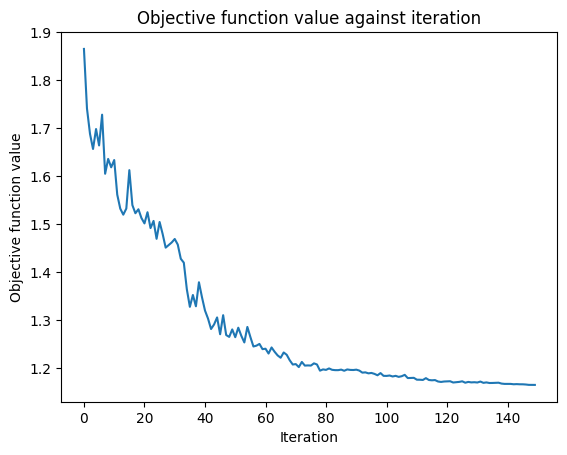

Precision:
 [0.6431327160493827, 0.6607744107744107, 0.873148148148148, 0.7179549114331722, 0.6925925925925926, 0.6071895424836602, 0.5787811222593832, 0.7633406432748537, 0.5652777777777778, 0.7010466988727857]
Accuracy:
 [0.6666666666666666, 0.6111111111111112, 0.8611111111111112, 0.6666666666666666, 0.6944444444444444, 0.6111111111111112, 0.6944444444444444, 0.6944444444444444, 0.5555555555555556, 0.6388888888888888]
Recall:
 [0.5892857142857143, 0.5595238095238095, 0.8630952380952381, 0.6071428571428572, 0.6666666666666666, 0.5773809523809524, 0.5952380952380952, 0.6130952380952381, 0.5476190476190476, 0.5833333333333334]
F1:
 [0.6245370370370371, 0.5984624017957353, 0.8630104463437797, 0.6457480207480207, 0.6902025177887248, 0.6007719878687621, 0.6189522856189522, 0.645679012345679, 0.5524691358024691, 0.6247269997269997]
Time:
 [95.03278732299805, 96.7872793674469, 97.11449670791626, 95.16651773452759, 95.38329291343689, 95.69643115997314, 98.1427710056305, 97.38989567756653, 96.

In [7]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

  rf = RandomForestClassifier(random_state=42)

  rf.fit(X_train, Y_train)

  feature_importances = rf.feature_importances_

  least_important_index = np.argmin(feature_importances)

  X_train = np.delete(X_train, least_important_index, axis=1)

  X_test = np.delete(X_test, least_important_index, axis=1)


  MAXITR = 150
  num_qubits = X.shape[1] //2
  opt = COBYLA(maxiter=MAXITR)
    
  qc_init = QuantumCircuit(num_qubits)
  for i in range(num_qubits):
    qc_init.h(i)

  featuremap = EfficientSU2(num_qubits=num_qubits, reps=0, parameter_prefix='x'
                           ,initial_state=qc_init)
  ansatz = RealAmplitudes(num_qubits=num_qubits, reps=1)



  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)

  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recall:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)
  
  t = np.mean(times)
  t_std = np.std(times)
  p = np.mean(precisions)
  p_std = np.std(precisions)
  a = np.mean(accuracies)
  a_std = np.std(accuracies)
  f = np.mean(f1s)
  f_std = np.std(f1s)
  r = np.mean(recalls)
  r_std = np.std(recalls)
  
  print(f"Mean Precision: {p}±{p_std}")
  print(f"Mean Accuracy: {a}±{a_std}")
  print(f"Mean Recall: {r}±{r_std}")
  print(f"Mean F1: {f}±{f_std}")
  print(f"Mean Time: {t}±{t_std}")

Precision:
 [0.6431327160493827, 0.6607744107744107, 0.873148148148148, 0.7179549114331722, 0.6925925925925926, 0.6071895424836602, 0.5787811222593832, 0.7633406432748537, 0.5652777777777778, 0.7010466988727857]
Accuracy:
 [0.6666666666666666, 0.6111111111111112, 0.8611111111111112, 0.6666666666666666, 0.6944444444444444, 0.6111111111111112, 0.6944444444444444, 0.6944444444444444, 0.5555555555555556, 0.6388888888888888]
Recall:
 [0.5892857142857143, 0.5595238095238095, 0.8630952380952381, 0.6071428571428572, 0.6666666666666666, 0.5773809523809524, 0.5952380952380952, 0.6130952380952381, 0.5476190476190476, 0.5833333333333334]
F1:
 [0.6245370370370371, 0.5984624017957353, 0.8630104463437797, 0.6457480207480207, 0.6902025177887248, 0.6007719878687621, 0.6189522856189522, 0.645679012345679, 0.5524691358024691, 0.6247269997269997]
Time:
 [95.03278732299805, 96.7872793674469, 97.11449670791626, 95.16651773452759, 95.38329291343689, 95.69643115997314, 98.1427710056305, 97.38989567756653, 96.56689929962158, 99.81912279129028]
Mean Precision: 0.6803238563666166±0.08759541395643279
Mean Accuracy: 0.6694444444444445±0.0770301367992336
Mean Recall: 0.6202380952380951±0.08665979826263524
Mean F1: 0.646455984507616±0.07983963975620668
Mean Time: 96.70994939804078±1.4266974537439643


In [9]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

  rf = RandomForestClassifier(random_state=42)

  rf.fit(X_train, Y_train)

  feature_importances = rf.feature_importances_

  least_important_index = np.argmin(feature_importances)

  X_train = np.delete(X_train, least_important_index, axis=1)

  X_test = np.delete(X_test, least_important_index, axis=1)


  MAXITR = 200
  num_qubits = X.shape[1] //2
  opt = COBYLA(maxiter=MAXITR)
    
  qc_init = QuantumCircuit(num_qubits)
  for i in range(num_qubits):
    qc_init.h(i)

  featuremap = EfficientSU2(num_qubits=num_qubits, reps=0, parameter_prefix='x'
                           ,initial_state=qc_init)
  ansatz = RealAmplitudes(num_qubits=num_qubits, reps=2)



  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)

  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recall:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)
  
  t = np.mean(times)
  t_std = np.std(times)
  p = np.mean(precisions)
  p_std = np.std(precisions)
  a = np.mean(accuracies)
  a_std = np.std(accuracies)
  f = np.mean(f1s)
  f_std = np.std(f1s)
  r = np.mean(recalls)
  r_std = np.std(recalls)
  
  print(f"Mean Precision: {p}±{p_std}")
  print(f"Mean Accuracy: {a}±{a_std}")
  print(f"Mean Recall: {r}±{r_std}")
  print(f"Mean F1: {f}±{f_std}")
  print(f"Mean Time: {t}±{t_std}")

Precision:
 [0.6763029998324116, 0.9135802469135802, 0.8976608187134504, 0.838888888888889, 0.8976608187134504, 0.8215277777777779, 0.8675925925925926, 0.7775403608736942, 0.7226430976430975, 0.9313725490196079]
Accuracy:
 [0.6666666666666666, 0.8888888888888888, 0.8611111111111112, 0.8333333333333334, 0.8611111111111112, 0.8055555555555556, 0.8611111111111112, 0.7777777777777778, 0.7222222222222222, 0.9166666666666666]
Recall:
 [0.6964285714285715, 0.8690476190476191, 0.8273809523809524, 0.8392857142857143, 0.8273809523809524, 0.8154761904761906, 0.8809523809523809, 0.7916666666666666, 0.7261904761904762, 0.9107142857142857]
F1:
 [0.6298685782556751, 0.8897283272283273, 0.8598808598808598, 0.8348020434227331, 0.8598808598808598, 0.8015432098765432, 0.8599240265906932, 0.7766279351246673, 0.7168627450980393, 0.9176362466685047]
Time:
 [144.33553671836853, 147.91306257247925, 145.9949231147766, 147.35167932510376, 146.30594158172607, 145.4863166809082, 122.47795748710632, 132.3339672088

Precision:
 [0.6763029998324116, 0.9135802469135802, 0.8976608187134504, 0.838888888888889, 0.8976608187134504, 0.8215277777777779, 0.8675925925925926, 0.7775403608736942, 0.7226430976430975, 0.9313725490196079]
Accuracy:
 [0.6666666666666666, 0.8888888888888888, 0.8611111111111112, 0.8333333333333334, 0.8611111111111112, 0.8055555555555556, 0.8611111111111112, 0.7777777777777778, 0.7222222222222222, 0.9166666666666666]
Recall:
 [0.6964285714285715, 0.8690476190476191, 0.8273809523809524, 0.8392857142857143, 0.8273809523809524, 0.8154761904761906, 0.8809523809523809, 0.7916666666666666, 0.7261904761904762, 0.9107142857142857]
F1:
 [0.6298685782556751, 0.8897283272283273, 0.8598808598808598, 0.8348020434227331, 0.8598808598808598, 0.8015432098765432, 0.8599240265906932, 0.7766279351246673, 0.7168627450980393, 0.9176362466685047]
Time:
 [144.33553671836853, 147.91306257247925, 145.9949231147766, 147.35167932510376, 146.30594158172607, 145.4863166809082, 122.47795748710632, 132.3339672088623, 161.1745891571045, 198.85681223869324]
 
Mean Precision: 0.8344770150968552±0.08104435051216322
Mean Accuracy: 0.8194444444444444±0.07375510026306531
Mean Recall: 0.818452380952381±0.06300813844420482
Mean F1: 0.8146754832026902±0.08253145209260747
Mean Time: 149.22307860851288±19.154347065828734


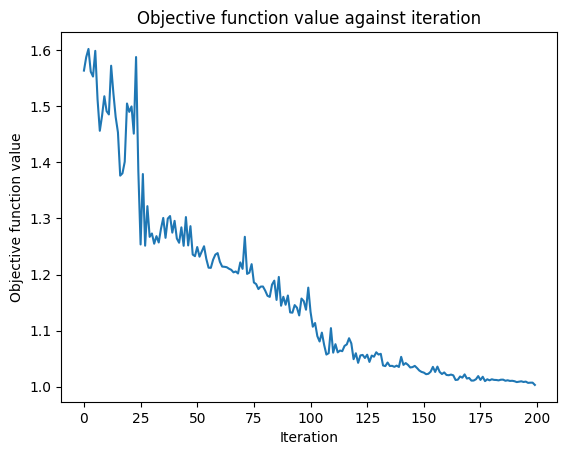

Precision:
 [0.8009259259259259, 0.7981532356532357, 0.805026455026455, 0.9277777777777777, 0.7973856209150326, 0.8334656084656084, 0.7709876543209878, 0.8111271444604778, 0.7451566951566951, 0.9444444444444444]
Accuracy:
 [0.8055555555555556, 0.8055555555555556, 0.8055555555555556, 0.9166666666666666, 0.7777777777777778, 0.7777777777777778, 0.7222222222222222, 0.8055555555555556, 0.75, 0.9444444444444444]
Recall:
 [0.7619047619047619, 0.7797619047619048, 0.7797619047619048, 0.9285714285714285, 0.7559523809523809, 0.8095238095238096, 0.6726190476190476, 0.7976190476190476, 0.7321428571428572, 0.9345238095238096]
F1:
 [0.7992063492063493, 0.7991769547325103, 0.8042784163473818, 0.9176163342830009, 0.7748828232699201, 0.7823426573426574, 0.7104123127830025, 0.7980555555555556, 0.7468071519795658, 0.9444444444444444]
Time:
 [191.31912636756897, 173.9035222530365, 176.49025917053223, 170.6501898765564, 202.33009243011475, 214.39738941192627, 201.2121467590332, 206.98196387290955, 202.00912

In [10]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

  rf = RandomForestClassifier(random_state=42)

  rf.fit(X_train, Y_train)

  feature_importances = rf.feature_importances_

  least_important_index = np.argmin(feature_importances)

  X_train = np.delete(X_train, least_important_index, axis=1)

  X_test = np.delete(X_test, least_important_index, axis=1)


  MAXITR = 200
  num_qubits = X.shape[1] //2
  opt = COBYLA(maxiter=MAXITR)
    
  qc_init = QuantumCircuit(num_qubits)
  for i in range(num_qubits):
    qc_init.h(i)

  featuremap = EfficientSU2(num_qubits=num_qubits, reps=0, parameter_prefix='x'
                           ,initial_state=qc_init)
  ansatz = RealAmplitudes(num_qubits=num_qubits, reps=3)



  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)

  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recall:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)
  
  t = np.mean(times)
  t_std = np.std(times)
  p = np.mean(precisions)
  p_std = np.std(precisions)
  a = np.mean(accuracies)
  a_std = np.std(accuracies)
  f = np.mean(f1s)
  f_std = np.std(f1s)
  r = np.mean(recalls)
  r_std = np.std(recalls)
  
  print(f"Mean Precision: {p}±{p_std}")
  print(f"Mean Accuracy: {a}±{a_std}")
  print(f"Mean Recall: {r}±{r_std}")
  print(f"Mean F1: {f}±{f_std}")
  print(f"Mean Time: {t}±{t_std}")

Precision:
 [0.8009259259259259, 0.7981532356532357, 0.805026455026455, 0.9277777777777777, 0.7973856209150326, 0.8334656084656084, 0.7709876543209878, 0.8111271444604778, 0.7451566951566951, 0.9444444444444444]
Accuracy:
 [0.8055555555555556, 0.8055555555555556, 0.8055555555555556, 0.9166666666666666, 0.7777777777777778, 0.7777777777777778, 0.7222222222222222, 0.8055555555555556, 0.75, 0.9444444444444444]
Recall:
 [0.7619047619047619, 0.7797619047619048, 0.7797619047619048, 0.9285714285714285, 0.7559523809523809, 0.8095238095238096, 0.6726190476190476, 0.7976190476190476, 0.7321428571428572, 0.9345238095238096]
F1:
 [0.7992063492063493, 0.7991769547325103, 0.8042784163473818, 0.9176163342830009, 0.7748828232699201, 0.7823426573426574, 0.7104123127830025, 0.7980555555555556, 0.7468071519795658, 0.9444444444444444]
Time:
 [191.31912636756897, 173.9035222530365, 176.49025917053223, 170.6501898765564, 202.33009243011475, 214.39738941192627, 201.2121467590332, 206.98196387290955, 202.00912189483643, 207.8180592060089]
 
Mean Precision: 0.8234450562146641±0.0606830158305117
Mean Accuracy: 0.8111111111111111±0.06549903401417552
Mean Recall: 0.7952380952380952±0.07716085915761337
Mean F1: 0.8077222999944389±0.06776646703403671
Mean Time: 194.71118712425232±14.89589695876262


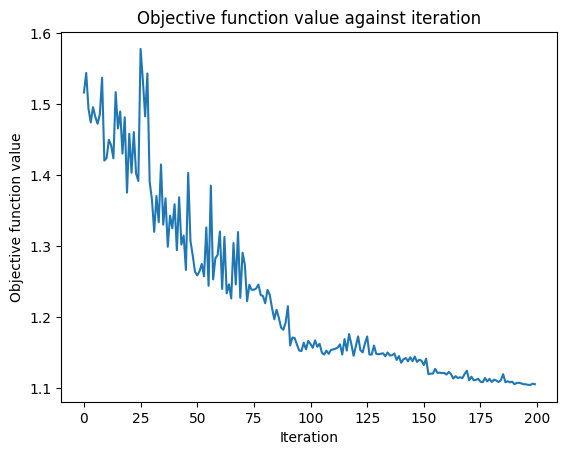

Precision:
 [0.8623931623931624, 0.8411172161172161, 0.8958333333333334, 0.8228988603988604, 0.8869281045751634, 0.9145299145299144, 0.8962962962962963, 0.8119358854652973, 0.8929249762583097, 0.974074074074074]
Accuracy:
 [0.8611111111111112, 0.8333333333333334, 0.8888888888888888, 0.7777777777777778, 0.8611111111111112, 0.8611111111111112, 0.8055555555555556, 0.8055555555555556, 0.8888888888888888, 0.9722222222222222]
Recall:
 [0.8809523809523809, 0.8214285714285715, 0.8690476190476191, 0.7916666666666666, 0.8809523809523809, 0.8809523809523809, 0.8333333333333334, 0.7976190476190476, 0.8869047619047619, 0.9761904761904763]
F1:
 [0.8609337306655315, 0.8345679012345679, 0.8867724867724868, 0.7711018228259608, 0.8531331705712257, 0.8705087505087504, 0.8179115570419918, 0.8030879514750482, 0.8897966594045025, 0.9721867461331064]
Time:
 [206.87658405303955, 213.79116106033325, 218.5781865119934, 213.89839911460876, 224.2123725414276, 165.95293521881104, 225.18731427192688, 212.8074688911

In [11]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

  rf = RandomForestClassifier(random_state=42)

  rf.fit(X_train, Y_train)

  feature_importances = rf.feature_importances_

  least_important_index = np.argmin(feature_importances)

  X_train = np.delete(X_train, least_important_index, axis=1)

  X_test = np.delete(X_test, least_important_index, axis=1)


  MAXITR = 200
  num_qubits = X.shape[1] //2
  opt = COBYLA(maxiter=MAXITR)
    
  qc_init = QuantumCircuit(num_qubits)
  for i in range(num_qubits):
    qc_init.h(i)

  featuremap = EfficientSU2(num_qubits=num_qubits, reps=0, parameter_prefix='x'
                           ,initial_state=qc_init)
  ansatz = RealAmplitudes(num_qubits=num_qubits, reps=4)



  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)

  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recall:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)
  
  t = np.mean(times)
  t_std = np.std(times)
  p = np.mean(precisions)
  p_std = np.std(precisions)
  a = np.mean(accuracies)
  a_std = np.std(accuracies)
  f = np.mean(f1s)
  f_std = np.std(f1s)
  r = np.mean(recalls)
  r_std = np.std(recalls)
  
  print(f"Mean Precision: {p}±{p_std}")
  print(f"Mean Accuracy: {a}±{a_std}")
  print(f"Mean Recall: {r}±{r_std}")
  print(f"Mean F1: {f}±{f_std}")
  print(f"Mean Time: {t}±{t_std}")

Precision:
 [0.8623931623931624, 0.8411172161172161, 0.8958333333333334, 0.8228988603988604, 0.8869281045751634, 0.9145299145299144, 0.8962962962962963, 0.8119358854652973, 0.8929249762583097, 0.974074074074074]
Accuracy:
 [0.8611111111111112, 0.8333333333333334, 0.8888888888888888, 0.7777777777777778, 0.8611111111111112, 0.8611111111111112, 0.8055555555555556, 0.8055555555555556, 0.8888888888888888, 0.9722222222222222]
Recall:
 [0.8809523809523809, 0.8214285714285715, 0.8690476190476191, 0.7916666666666666, 0.8809523809523809, 0.8809523809523809, 0.8333333333333334, 0.7976190476190476, 0.8869047619047619, 0.9761904761904763]
F1:
 [0.8609337306655315, 0.8345679012345679, 0.8867724867724868, 0.7711018228259608, 0.8531331705712257, 0.8705087505087504, 0.8179115570419918, 0.8030879514750482, 0.8897966594045025, 0.9721867461331064]
Time:
 [206.87658405303955, 213.79116106033325, 218.5781865119934, 213.89839911460876, 224.2123725414276, 165.95293521881104, 225.18731427192688, 212.8074688911438, 189.28683137893677, 185.31368350982666]
 
Mean Precision: 0.8798931823441627±0.04526431830488089
Mean Accuracy: 0.8555555555555555±0.05241100628920334
Mean Recall: 0.8619047619047621±0.05132871699359549
Mean F1: 0.8560000776633172±0.05267735193384568
Mean Time: 205.59049365520477±18.269086973485425


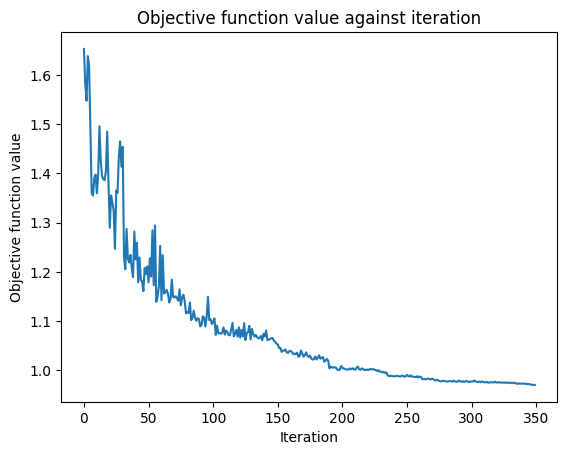

Precision:
 [0.8675925925925926, 0.9116161616161617, 0.9037037037037037, 0.8509259259259259, 0.9277777777777777, 0.8675925925925926, 0.8100118835412953, 0.8703703703703705, 0.8277777777777778, 0.974074074074074]
Accuracy:
 [0.8611111111111112, 0.8888888888888888, 0.8888888888888888, 0.8333333333333334, 0.9166666666666666, 0.8611111111111112, 0.8055555555555556, 0.8611111111111112, 0.8055555555555556, 0.9722222222222222]
Recall:
 [0.8809523809523809, 0.9047619047619048, 0.9047619047619048, 0.8035714285714285, 0.9285714285714285, 0.8809523809523809, 0.8154761904761906, 0.8452380952380952, 0.7976190476190476, 0.9761904761904763]
F1:
 [0.8599240265906932, 0.89046783625731, 0.8884120902511707, 0.8307102858826997, 0.9176163342830009, 0.8599240265906932, 0.8006093189964159, 0.8609742747673783, 0.8126780626780625, 0.9721867461331064]
Time:
 [343.66142773628235, 464.5725622177124, 448.9980368614197, 383.8555471897125, 351.8007597923279, 315.53286957740784, 330.0275619029999, 330.8441741466522, 

In [12]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

  rf = RandomForestClassifier(random_state=42)

  rf.fit(X_train, Y_train)

  feature_importances = rf.feature_importances_

  least_important_index = np.argmin(feature_importances)

  X_train = np.delete(X_train, least_important_index, axis=1)

  X_test = np.delete(X_test, least_important_index, axis=1)


  MAXITR = 350
  num_qubits = X.shape[1] //2
  opt = COBYLA(maxiter=MAXITR)
    
  qc_init = QuantumCircuit(num_qubits)
  for i in range(num_qubits):
    qc_init.h(i)

  featuremap = EfficientSU2(num_qubits=num_qubits, reps=0, parameter_prefix='x'
                           ,initial_state=qc_init)
  ansatz = RealAmplitudes(num_qubits=num_qubits, reps=4)



  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)

  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recall:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)
  
  t = np.mean(times)
  t_std = np.std(times)
  p = np.mean(precisions)
  p_std = np.std(precisions)
  a = np.mean(accuracies)
  a_std = np.std(accuracies)
  f = np.mean(f1s)
  f_std = np.std(f1s)
  r = np.mean(recalls)
  r_std = np.std(recalls)
  
  print(f"Mean Precision: {p}±{p_std}")
  print(f"Mean Accuracy: {a}±{a_std}")
  print(f"Mean Recall: {r}±{r_std}")
  print(f"Mean F1: {f}±{f_std}")
  print(f"Mean Time: {t}±{t_std}")

Precision:
 [0.8675925925925926, 0.9116161616161617, 0.9037037037037037, 0.8509259259259259, 0.9277777777777777, 0.8675925925925926, 0.8100118835412953, 0.8703703703703705, 0.8277777777777778, 0.974074074074074]
Accuracy:
 [0.8611111111111112, 0.8888888888888888, 0.8888888888888888, 0.8333333333333334, 0.9166666666666666, 0.8611111111111112, 0.8055555555555556, 0.8611111111111112, 0.8055555555555556, 0.9722222222222222]
Recall:
 [0.8809523809523809, 0.9047619047619048, 0.9047619047619048, 0.8035714285714285, 0.9285714285714285, 0.8809523809523809, 0.8154761904761906, 0.8452380952380952, 0.7976190476190476, 0.9761904761904763]
F1:
 [0.8599240265906932, 0.89046783625731, 0.8884120902511707, 0.8307102858826997, 0.9176163342830009, 0.8599240265906932, 0.8006093189964159, 0.8609742747673783, 0.8126780626780625, 0.9721867461331064]
Time:
 [343.66142773628235, 464.5725622177124, 448.9980368614197, 383.8555471897125, 351.8007597923279, 315.53286957740784, 330.0275619029999, 330.8441741466522, 292.937059879303, 298.0323579311371]
 
Mean Precision: 0.881144285997227±0.046424580567770914
Mean Accuracy: 0.8694444444444445±0.048192643258048506
Mean Recall: 0.8738095238095237±0.0551872713642822
Mean F1: 0.8693503002430532±0.04836551416734795
Mean Time: 356.02623572349546±56.271296803901826


In [7]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

  rf = RandomForestClassifier(random_state=42)

  rf.fit(X_train, Y_train)

  feature_importances = rf.feature_importances_

  least_important_index = np.argmin(feature_importances)

  X_train = np.delete(X_train, least_important_index, axis=1)

  X_test = np.delete(X_test, least_important_index, axis=1)


  MAXITR = 350
  num_qubits = X.shape[1] //2
  opt = COBYLA(maxiter=MAXITR)
    
  qc_init = QuantumCircuit(num_qubits)
  for i in range(num_qubits):
    qc_init.h(i)

  featuremap = EfficientSU2(num_qubits=num_qubits, reps=0, parameter_prefix='x'
                           ,initial_state=qc_init)
  ansatz = RealAmplitudes(num_qubits=num_qubits, reps=5)



  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)

  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recall:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)
  
  t = np.mean(times)
  t_std = np.std(times)
  p = np.mean(precisions)
  p_std = np.std(precisions)
  a = np.mean(accuracies)
  a_std = np.std(accuracies)
  f = np.mean(f1s)
  f_std = np.std(f1s)
  r = np.mean(recalls)
  r_std = np.std(recalls)
  
  print(f"Mean Precision: {p}±{p_std}")
  print(f"Mean Accuracy: {a}±{a_std}")
  print(f"Mean Recall: {r}±{r_std}")
  print(f"Mean F1: {f}±{f_std}")
  print(f"Mean Time: {t}±{t_std}")

Precision:
 [0.6981481481481482, 0.8904558404558406, 0.8028490028490028, 0.8910493827160493, 0.9203703703703704, 0.9182336182336184, 0.9214743589743589, 0.8344907407407408, 0.7775403608736942, 0.8013227513227513]
Accuracy:
 [0.6944444444444444, 0.8888888888888888, 0.8055555555555556, 0.8888888888888888, 0.9166666666666666, 0.9166666666666666, 0.9166666666666666, 0.8333333333333334, 0.7777777777777778, 0.8055555555555556]
Recall:
 [0.7023809523809524, 0.8869047619047619, 0.7976190476190476, 0.9047619047619048, 0.9107142857142857, 0.9285714285714285, 0.9107142857142857, 0.8392857142857143, 0.7916666666666666, 0.7797619047619048]
F1:
 [0.693019943019943, 0.8887824606215412, 0.8033915141194835, 0.8868691596886323, 0.9171775223499361, 0.916560238399319, 0.9160493827160495, 0.8306267806267805, 0.7766279351246673, 0.8023627075351213]
Time:
 [367.9598755836487, 360.2835865020752, 311.83494806289673, 316.2294406890869, 311.94319438934326, 322.7908902168274, 286.58958768844604, 312.7266688346863

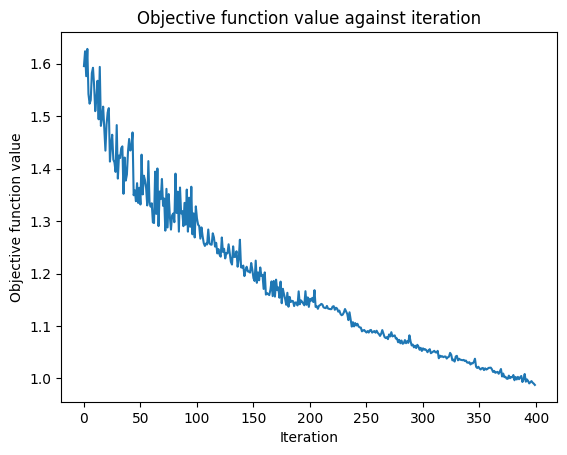

Precision:
 [0.8989651416122003, 0.9203703703703704, 0.8333333333333334, 0.8067534317534317, 0.8605413105413106, 0.9176163342830009, 0.8946759259259258, 0.9277777777777777, 0.9166666666666666, 0.9037037037037037]
Accuracy:
 [0.8888888888888888, 0.9166666666666666, 0.8333333333333334, 0.7777777777777778, 0.8611111111111112, 0.9166666666666666, 0.8888888888888888, 0.9166666666666666, 0.9166666666666666, 0.8888888888888888]
Recall:
 [0.8869047619047619, 0.9107142857142857, 0.8571428571428571, 0.7738095238095237, 0.8630952380952381, 0.9285714285714285, 0.9047619047619048, 0.9285714285714285, 0.9107142857142857, 0.9047619047619048]
F1:
 [0.8877217167539748, 0.9171775223499361, 0.8333333333333334, 0.7862831342363505, 0.8599758762594012, 0.9159404502541757, 0.8883190883190883, 0.9176163342830009, 0.9166666666666666, 0.8884120902511707]
Time:
 [448.10829854011536, 469.6216320991516, 449.0261206626892, 447.56576108932495, 372.75748109817505, 349.3403742313385, 349.35469794273376, 422.6717586517

In [8]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

  rf = RandomForestClassifier(random_state=42)

  rf.fit(X_train, Y_train)

  feature_importances = rf.feature_importances_

  least_important_index = np.argmin(feature_importances)

  X_train = np.delete(X_train, least_important_index, axis=1)

  X_test = np.delete(X_test, least_important_index, axis=1)


  MAXITR = 400
  num_qubits = X.shape[1] //2
  opt = COBYLA(maxiter=MAXITR)
    
  qc_init = QuantumCircuit(num_qubits)
  for i in range(num_qubits):
    qc_init.h(i)

  featuremap = EfficientSU2(num_qubits=num_qubits, reps=0, parameter_prefix='x'
                           ,initial_state=qc_init)
  ansatz = RealAmplitudes(num_qubits=num_qubits, reps=6)



  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)

  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recall:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)
  
  t = np.mean(times)
  t_std = np.std(times)
  p = np.mean(precisions)
  p_std = np.std(precisions)
  a = np.mean(accuracies)
  a_std = np.std(accuracies)
  f = np.mean(f1s)
  f_std = np.std(f1s)
  r = np.mean(recalls)
  r_std = np.std(recalls)
  
  print(f"Mean Precision: {p}±{p_std}")
  print(f"Mean Accuracy: {a}±{a_std}")
  print(f"Mean Recall: {r}±{r_std}")
  print(f"Mean F1: {f}±{f_std}")
  print(f"Mean Time: {t}±{t_std}")

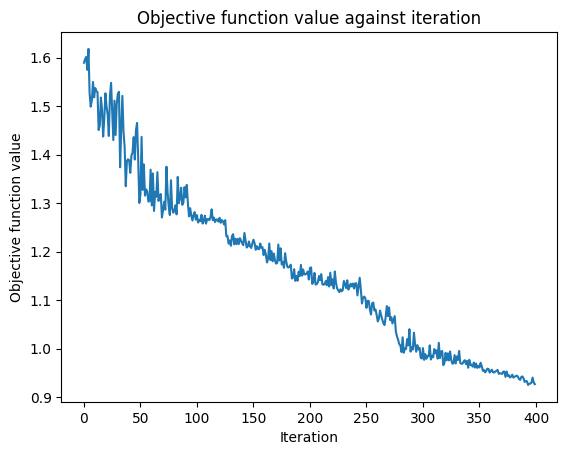

Precision:
 [0.9222222222222223, 0.9037037037037037, 0.8668981481481481, 0.8478906714200831, 0.806837606837607, 0.9214743589743589, 0.9462962962962962, 0.8912037037037036, 0.947530864197531, 0.974074074074074]
Accuracy:
 [0.9166666666666666, 0.8888888888888888, 0.8611111111111112, 0.8055555555555556, 0.8055555555555556, 0.9166666666666666, 0.9444444444444444, 0.8888888888888888, 0.9444444444444444, 0.9722222222222222]
Recall:
 [0.8928571428571429, 0.9047619047619048, 0.8630952380952381, 0.8333333333333334, 0.7976190476190476, 0.9107142857142857, 0.9345238095238096, 0.8869047619047619, 0.9523809523809524, 0.9761904761904763]
F1:
 [0.9146141215106732, 0.8884120902511707, 0.8605413105413106, 0.7961276603042307, 0.805378175109976, 0.9160493827160495, 0.9444089683553286, 0.8864672364672365, 0.9447470346163157, 0.9721867461331064]
Time:
 [476.2276122570038, 383.0981328487396, 383.57776165008545, 382.8372631072998, 379.16193652153015, 378.7383840084076, 379.56599164009094, 380.18221712112427,

In [9]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

  rf = RandomForestClassifier(random_state=42)

  rf.fit(X_train, Y_train)

  feature_importances = rf.feature_importances_

  least_important_index = np.argmin(feature_importances)

  X_train = np.delete(X_train, least_important_index, axis=1)

  X_test = np.delete(X_test, least_important_index, axis=1)


  MAXITR = 400
  num_qubits = X.shape[1] //2
  opt = COBYLA(maxiter=MAXITR)
    
  qc_init = QuantumCircuit(num_qubits)
  for i in range(num_qubits):
    qc_init.h(i)

  featuremap = EfficientSU2(num_qubits=num_qubits, reps=0, parameter_prefix='x'
                           ,initial_state=qc_init)
  ansatz = RealAmplitudes(num_qubits=num_qubits, reps=7)



  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)

  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recall:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)
  
  t = np.mean(times)
  t_std = np.std(times)
  p = np.mean(precisions)
  p_std = np.std(precisions)
  a = np.mean(accuracies)
  a_std = np.std(accuracies)
  f = np.mean(f1s)
  f_std = np.std(f1s)
  r = np.mean(recalls)
  r_std = np.std(recalls)
  
  print(f"Mean Precision: {p}±{p_std}")
  print(f"Mean Accuracy: {a}±{a_std}")
  print(f"Mean Recall: {r}±{r_std}")
  print(f"Mean F1: {f}±{f_std}")
  print(f"Mean Time: {t}±{t_std}")

In [10]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

  rf = RandomForestClassifier(random_state=42)

  rf.fit(X_train, Y_train)

  feature_importances = rf.feature_importances_

  least_important_index = np.argmin(feature_importances)

  X_train = np.delete(X_train, least_important_index, axis=1)

  X_test = np.delete(X_test, least_important_index, axis=1)


  MAXITR = 450
  num_qubits = X.shape[1] //2
  opt = COBYLA(maxiter=MAXITR)
    
  qc_init = QuantumCircuit(num_qubits)
  for i in range(num_qubits):
    qc_init.h(i)

  featuremap = EfficientSU2(num_qubits=num_qubits, reps=0, parameter_prefix='x'
                           ,initial_state=qc_init)
  ansatz = RealAmplitudes(num_qubits=num_qubits, reps=8)



  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)

  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recall:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)
  
  t = np.mean(times)
  t_std = np.std(times)
  p = np.mean(precisions)
  p_std = np.std(precisions)
  a = np.mean(accuracies)
  a_std = np.std(accuracies)
  f = np.mean(f1s)
  f_std = np.std(f1s)
  r = np.mean(recalls)
  r_std = np.std(recalls)
  
  print(f"Mean Precision: {p}±{p_std}")
  print(f"Mean Accuracy: {a}±{a_std}")
  print(f"Mean Recall: {r}±{r_std}")
  print(f"Mean F1: {f}±{f_std}")
  print(f"Mean Time: {t}±{t_std}")

Precision:
 [0.9234567901234567, 0.9753086419753088, 0.947530864197531, 0.9296296296296297, 0.8715277777777778, 0.9234567901234567, 0.9094794094794094, 0.9176163342830009, 0.9444444444444444, 0.8912037037037036]
Accuracy:
 [0.9166666666666666, 0.9722222222222222, 0.9444444444444444, 0.9166666666666666, 0.8611111111111112, 0.9166666666666666, 0.8888888888888888, 0.9166666666666666, 0.9444444444444444, 0.8888888888888888]
Recall:
 [0.9285714285714285, 0.9761904761904763, 0.9523809523809524, 0.9285714285714285, 0.8452380952380952, 0.9285714285714285, 0.9047619047619048, 0.9285714285714285, 0.9523809523809524, 0.8869047619047619]
F1:
 [0.9167836896031623, 0.9725248123940935, 0.9447470346163157, 0.9152320136228183, 0.8626780626780626, 0.9167836896031623, 0.8917878742440146, 0.9159404502541757, 0.9444444444444444, 0.8864672364672365]
Time:
 [493.5972731113434, 488.95658922195435, 490.09066343307495, 473.82588601112366, 470.04948115348816, 482.2218325138092, 628.56876039505, 604.5355701446533

# **EfficientSU2 TwoLocal**

In [18]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

  rf = RandomForestClassifier(random_state=42)

  rf.fit(X_train, Y_train)

  feature_importances = rf.feature_importances_

  least_important_index = np.argmin(feature_importances)

  X_train = np.delete(X_train, least_important_index, axis=1)

  X_test = np.delete(X_test, least_important_index, axis=1)


  MAXITR = 100
  num_qubits = X.shape[1] //2
  opt = COBYLA(maxiter=MAXITR)

  featuremap = EfficientSU2(num_qubits=num_qubits, reps=0, parameter_prefix='x')
  ansatz = TwoLocal(num_qubits=num_qubits, reps=1, entanglement_blocks='cz', rotation_blocks=['rz', 'ry'])




  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)

  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recall:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)

Precision:
 [0.9145299145299144, 0.8796296296296297, 0.8791763791763791, 0.8814814814814815, 0.9145299145299144, 0.9094794094794094, 0.9393939393939394, 0.9145299145299144, 0.8925925925925926, 0.9047619047619047]
Accuracy:
 [0.8611111111111112, 0.8333333333333334, 0.8333333333333334, 0.8611111111111112, 0.8611111111111112, 0.8888888888888888, 0.9166666666666666, 0.8611111111111112, 0.8888888888888888, 0.8333333333333334]
Recall:
 [0.8809523809523809, 0.8392857142857143, 0.8571428571428571, 0.8630952380952381, 0.8809523809523809, 0.9047619047619048, 0.9285714285714285, 0.8809523809523809, 0.8690476190476191, 0.8571428571428571]
F1:
 [0.8705087505087504, 0.8407407407407407, 0.8393976393976393, 0.8637207322264794, 0.8705087505087504, 0.8917878742440146, 0.9182456140350878, 0.8705087505087504, 0.8898112672059033, 0.8460606060606062]
Time:
 [59.767016887664795, 59.46497082710266, 60.181538105010986, 60.010112285614014, 60.26585650444031, 60.00543522834778, 60.2920036315918, 60.1013491153717

**Precision:**
 [0.9145299145299144, 0.8796296296296297, 0.8791763791763791, 0.8814814814814815, 0.9145299145299144, 0.9094794094794094, 0.9393939393939394, 0.9145299145299144, 0.8925925925925926, 0.9047619047619047]

**Mean Precision**
0.9030105080105081±0.018

**Accuracy:**
 [0.8611111111111112, 0.8333333333333334, 0.8333333333333334, 0.8611111111111112, 0.8611111111111112, 0.8888888888888888, 0.9166666666666666, 0.8611111111111112, 0.8888888888888888, 0.8333333333333334]

**Mean Accuracy**
 0.8638888888888889±0.026

**Recall:**
 [0.8809523809523809, 0.8392857142857143, 0.8571428571428571, 0.8630952380952381, 0.8809523809523809, 0.9047619047619048, 0.9285714285714285, 0.8809523809523809, 0.8690476190476191, 0.8571428571428571]

**Mean Recall**
0.8761904761904763±0.024

**F1:**
 [0.8705087505087504, 0.8407407407407407, 0.8393976393976393, 0.8637207322264794, 0.8705087505087504, 0.8917878742440146, 0.9182456140350878, 0.8705087505087504, 0.8898112672059033, 0.8460606060606062]

**Mean F1**
0.8701290725436722±0.024


**Time:**
 [59.767016887664795, 59.46497082710266, 60.181538105010986, 60.010112285614014, 60.26585650444031, 60.00543522834778, 60.2920036315918, 60.101349115371704, 60.44071912765503, 59.92348575592041]
 
**Mean Time**
60.04524874687195±0.2682267628666144


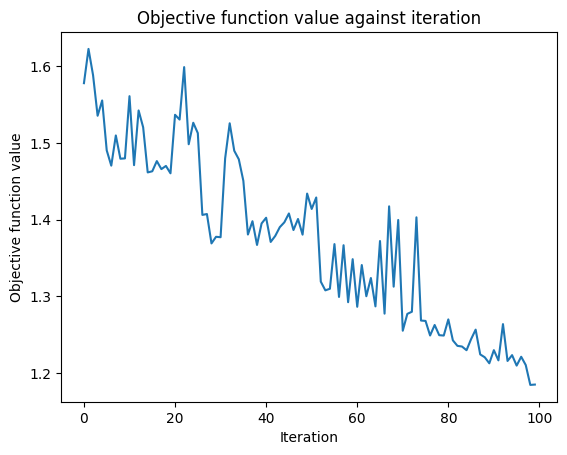

Precision:
 [0.8821225071225071, 0.9145299145299144, 0.8105413105413105, 0.8176638176638177, 0.8425925925925926, 0.8518518518518519, 0.8189542483660132, 0.8888888888888888, 0.7585130918464252, 0.8888888888888888]
Accuracy:
 [0.8333333333333334, 0.8611111111111112, 0.8055555555555556, 0.7777777777777778, 0.8055555555555556, 0.8055555555555556, 0.7777777777777778, 0.8888888888888888, 0.7222222222222222, 0.8888888888888888]
Recall:
 [0.8571428571428571, 0.8809523809523809, 0.7976190476190476, 0.7916666666666666, 0.8333333333333334, 0.8154761904761904, 0.7916666666666666, 0.8690476190476191, 0.7619047619047619, 0.8690476190476191]
F1:
 [0.8405942205942206, 0.8705087505087504, 0.8070685064149116, 0.7858436213991771, 0.8074074074074074, 0.8129629629629629, 0.7782626010770003, 0.8888888888888888, 0.7152035654451113, 0.8888888888888888]
Time:
 [77.82895827293396, 77.63202929496765, 77.3433108329773, 77.90164709091187, 78.07630014419556, 77.8449878692627, 77.91283655166626, 77.39677476882935, 7

In [19]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

  rf = RandomForestClassifier(random_state=42)

  rf.fit(X_train, Y_train)

  feature_importances = rf.feature_importances_

  least_important_index = np.argmin(feature_importances)

  X_train = np.delete(X_train, least_important_index, axis=1)

  X_test = np.delete(X_test, least_important_index, axis=1)


  MAXITR = 100
  num_qubits = X.shape[1] //2
  opt = COBYLA(maxiter=MAXITR)

  featuremap = EfficientSU2(num_qubits=num_qubits, reps=0, parameter_prefix='x')
  ansatz = TwoLocal(num_qubits=num_qubits, reps=2, entanglement_blocks='cz', rotation_blocks=['rz', 'ry'])




  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)

  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recall:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)

Precision:
 [0.8821225071225071, 0.9145299145299144, 0.8105413105413105, 0.8176638176638177, 0.8425925925925926, 0.8518518518518519, 0.8189542483660132, 0.8888888888888888, 0.7585130918464252, 0.8888888888888888]
Accuracy:
 [0.8333333333333334, 0.8611111111111112, 0.8055555555555556, 0.7777777777777778, 0.8055555555555556, 0.8055555555555556, 0.7777777777777778, 0.8888888888888888, 0.7222222222222222, 0.8888888888888888]
Recall:
 [0.8571428571428571, 0.8809523809523809, 0.7976190476190476, 0.7916666666666666, 0.8333333333333334, 0.8154761904761904, 0.7916666666666666, 0.8690476190476191, 0.7619047619047619, 0.8690476190476191]
F1:
 [0.8405942205942206, 0.8705087505087504, 0.8070685064149116, 0.7858436213991771, 0.8074074074074074, 0.8129629629629629, 0.7782626010770003, 0.8888888888888888, 0.7152035654451113, 0.8888888888888888]
Time:
 [77.82895827293396, 77.63202929496765, 77.3433108329773, 77.90164709091187, 78.07630014419556, 77.8449878692627, 77.91283655166626, 77.39677476882935, 78.09191107749939, 78.2254798412323]


**Precision:**
 [0.8821225071225071, 0.9145299145299144, 0.8105413105413105, 0.8176638176638177, 0.8425925925925926, 0.8518518518518519, 0.8189542483660132, 0.8888888888888888, 0.7585130918464252, 0.8888888888888888]
**Mean Precision:**
0.847454711229221±0.045

**Accuracy:**
 [0.8333333333333334, 0.8611111111111112, 0.8055555555555556, 0.7777777777777778, 0.8055555555555556, 0.8055555555555556, 0.7777777777777778, 0.8888888888888888, 0.7222222222222222, 0.8888888888888888]
**Mean Accuracy:**
0.8166666666666667±0.05

**Recall:**
 [0.8571428571428571, 0.8809523809523809, 0.7976190476190476, 0.7916666666666666, 0.8333333333333334, 0.8154761904761904, 0.7916666666666666, 0.8690476190476191, 0.7619047619047619, 0.8690476190476191]
**Mean Recall:**
 0.8267857142857142±0.04

**F1:**
 [0.8405942205942206, 0.8705087505087504, 0.8070685064149116, 0.7858436213991771, 0.8074074074074074, 0.8129629629629629, 0.7782626010770003, 0.8888888888888888, 0.7152035654451113, 0.8888888888888888]
**Mean F1:**
0.819562941358732±0.052


**Time:**
 [77.82895827293396, 77.63202929496765, 77.3433108329773, 77.90164709091187, 78.07630014419556, 77.8449878692627, 77.91283655166626, 77.39677476882935, 78.09191107749939, 78.2254798412323]
**Mean Time:**
77.82542357444763±0.2759383643642067


In [20]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

  rf = RandomForestClassifier(random_state=42)

  rf.fit(X_train, Y_train)

  feature_importances = rf.feature_importances_

  least_important_index = np.argmin(feature_importances)

  X_train = np.delete(X_train, least_important_index, axis=1)

  X_test = np.delete(X_test, least_important_index, axis=1)


  MAXITR = 100
  num_qubits = X.shape[1] //2
  opt = COBYLA(maxiter=MAXITR)

  featuremap = EfficientSU2(num_qubits=num_qubits, reps=0, parameter_prefix='x')
  ansatz = TwoLocal(num_qubits=num_qubits, reps=3, entanglement_blocks='cz', rotation_blocks=['rz', 'ry'])




  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)

  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recall:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)

Precision:
 [0.8175925925925925, 0.8907828282828283, 0.8735042735042735, 0.7917228969860548, 0.9094794094794094, 0.7731718898385566, 0.7986704653371319, 0.8484848484848485, 0.8214285714285714, 0.7038027332144979]
Accuracy:
 [0.8055555555555556, 0.8611111111111112, 0.8611111111111112, 0.7777777777777778, 0.8888888888888888, 0.7777777777777778, 0.75, 0.8333333333333334, 0.75, 0.6944444444444444]
Recall:
 [0.8154761904761904, 0.8809523809523809, 0.8630952380952381, 0.7202380952380952, 0.9047619047619048, 0.7202380952380952, 0.7678571428571428, 0.8571428571428571, 0.7857142857142857, 0.6666666666666666]
F1:
 [0.8074548907882241, 0.8544452919738961, 0.8641975308641975, 0.7631874298540965, 0.8917878742440146, 0.7642153371320038, 0.7520128824476652, 0.8315789473684211, 0.75, 0.6921863799283154]
Time:
 [96.56821393966675, 96.4516954421997, 96.15842151641846, 95.75907683372498, 95.90370082855225, 96.34914994239807, 96.80658507347107, 96.62062525749207, 117.39056491851807, 122.12983393669128]


**Precision:**
 [0.8175925925925925, 0.8907828282828283, 0.8735042735042735, 0.7917228969860548, 0.9094794094794094, 0.7731718898385566, 0.7986704653371319, 0.8484848484848485, 0.8214285714285714, 0.7038027332144979]
**Mean Precision:**
0.8228640509148765±0.058

**Accuracy:**
 [0.8055555555555556, 0.8611111111111112, 0.8611111111111112, 0.7777777777777778, 0.8888888888888888, 0.7777777777777778, 0.75, 0.8333333333333334, 0.75, 0.6944444444444444]
**Mean Accuracy:**
0.8±0.058

**Recall:**
 [0.8154761904761904, 0.8809523809523809, 0.8630952380952381, 0.7202380952380952, 0.9047619047619048, 0.7202380952380952, 0.7678571428571428, 0.8571428571428571, 0.7857142857142857, 0.6666666666666666]
**Mean Recall:**
 0.7982142857142858±0.075

**F1:**
 [0.8074548907882241, 0.8544452919738961, 0.8641975308641975, 0.7631874298540965, 0.8917878742440146, 0.7642153371320038, 0.7520128824476652, 0.8315789473684211, 0.75, 0.6921863799283154]
**Mean F1:**
0.7971066564600834±0.06

**Time:**
 [96.56821393966675, 96.4516954421997, 96.15842151641846, 95.75907683372498, 95.90370082855225, 96.34914994239807, 96.80658507347107, 96.62062525749207, 117.39056491851807, 122.12983393669128]
**Mean Time:**
 101.01378676891326±9.43780103126481



In [21]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

  rf = RandomForestClassifier(random_state=42)

  rf.fit(X_train, Y_train)

  feature_importances = rf.feature_importances_

  least_important_index = np.argmin(feature_importances)

  X_train = np.delete(X_train, least_important_index, axis=1)

  X_test = np.delete(X_test, least_important_index, axis=1)


  MAXITR = 100
  num_qubits = X.shape[1] //2
  opt = COBYLA(maxiter=MAXITR)

  featuremap = EfficientSU2(num_qubits=num_qubits, reps=0, parameter_prefix='x')
  ansatz = TwoLocal(num_qubits=num_qubits, reps=4, entanglement_blocks='cz', rotation_blocks=['rz', 'ry'])




  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)

  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recall:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)

Precision:
 [0.6944444444444444, 0.766025641025641, 0.7210826210826211, 0.7569444444444444, 0.6919191919191919, 0.7885802469135803, 0.8016835016835017, 0.7763979665940449, 0.7751322751322751, 0.7899167109693426]
Accuracy:
 [0.6944444444444444, 0.6666666666666666, 0.7222222222222222, 0.6944444444444444, 0.6944444444444444, 0.6944444444444444, 0.7777777777777778, 0.75, 0.75, 0.7777777777777778]
Recall:
 [0.7023809523809524, 0.6607142857142857, 0.7261904761904763, 0.7202380952380952, 0.7023809523809524, 0.7202380952380952, 0.7559523809523809, 0.75, 0.7142857142857143, 0.7559523809523809]
F1:
 [0.6944444444444444, 0.6761904761904761, 0.7209450830140485, 0.6944444444444443, 0.687765006385696, 0.7085668276972625, 0.7832269050659855, 0.744844423666303, 0.7524074074074074, 0.7686964886964888]
Time:
 [142.35497736930847, 145.1288182735443, 140.86143016815186, 143.75081253051758, 147.48146152496338, 113.99957036972046, 113.74943017959595, 113.31708788871765, 113.72081542015076, 112.7892441749572

**Precision:**
 [0.6944444444444444, 0.766025641025641, 0.7210826210826211, 0.7569444444444444, 0.6919191919191919, 0.7885802469135803, 0.8016835016835017, 0.7763979665940449, 0.7751322751322751, 0.7899167109693426]
**Mean Precision:**
 0.7562127044209087±0.038

**Accuracy:**
 [0.6944444444444444, 0.6666666666666666, 0.7222222222222222, 0.6944444444444444, 0.6944444444444444, 0.6944444444444444, 0.7777777777777778, 0.75, 0.75, 0.7777777777777778]
**Mean Accuracy:**
 0.7222222222222222±0.037

**Recall:**
 [0.7023809523809524, 0.6607142857142857, 0.7261904761904763, 0.7202380952380952, 0.7023809523809524, 0.7202380952380952, 0.7559523809523809, 0.75, 0.7142857142857143, 0.7559523809523809]
**Mean Recall:**
0.7208333333333334±0.028

**F1:**
 [0.6944444444444444, 0.6761904761904761, 0.7209450830140485, 0.6944444444444443, 0.687765006385696, 0.7085668276972625, 0.7832269050659855, 0.744844423666303, 0.7524074074074074, 0.7686964886964888]
**Mean F1:**
0.7231531507012556±0.035

**Time:**
 [142.35497736930847, 145.1288182735443, 140.86143016815186, 143.75081253051758, 147.48146152496338, 113.99957036972046, 113.74943017959595, 113.31708788871765, 113.72081542015076, 112.78924417495728]
**Mean Time:**
128.71536478996276±15.288286465544141


In [22]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

  rf = RandomForestClassifier(random_state=42)

  rf.fit(X_train, Y_train)

  feature_importances = rf.feature_importances_

  least_important_index = np.argmin(feature_importances)

  X_train = np.delete(X_train, least_important_index, axis=1)

  X_test = np.delete(X_test, least_important_index, axis=1)


  MAXITR = 150
  num_qubits = X.shape[1] //2
  opt = COBYLA(maxiter=MAXITR)

  featuremap = EfficientSU2(num_qubits=num_qubits, reps=0, parameter_prefix='x')
  ansatz = TwoLocal(num_qubits=num_qubits, reps=1, entanglement_blocks='cz', rotation_blocks=['rz', 'ry'])




  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)

  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recall:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)

Precision:
 [0.9393939393939394, 0.9094794094794094, 0.9145299145299144, 0.8498316498316498, 0.896011396011396, 0.9145299145299144, 0.8892773892773893, 0.875, 0.8846153846153846, 0.8892773892773893]
Accuracy:
 [0.9166666666666666, 0.8888888888888888, 0.8611111111111112, 0.8333333333333334, 0.8611111111111112, 0.8611111111111112, 0.8611111111111112, 0.8333333333333334, 0.8333333333333334, 0.8611111111111112]
Recall:
 [0.9285714285714285, 0.9047619047619048, 0.8809523809523809, 0.8214285714285715, 0.8809523809523809, 0.8809523809523809, 0.8630952380952381, 0.8392857142857143, 0.8571428571428571, 0.8630952380952381]
F1:
 [0.9205944586061546, 0.8917878742440146, 0.8705087505087504, 0.8347381864623243, 0.8656790123456789, 0.8705087505087504, 0.8683960613785175, 0.8435897435897436, 0.8390652557319224, 0.8683960613785175]
Time:
 [90.3340094089508, 89.91742515563965, 89.99252820014954, 90.1663887500763, 90.43863296508789, 90.13065075874329, 90.56057071685791, 90.13167238235474, 90.221441507339

**Precision:**
 [0.9393939393939394, 0.9094794094794094, 0.9145299145299144, 0.8498316498316498, 0.896011396011396, 0.9145299145299144, 0.8892773892773893, 0.875, 0.8846153846153846, 0.8892773892773893]
**Mean Precision:**
0.8961946386946386±0.023

**Accuracy:**
 [0.9166666666666666, 0.8888888888888888, 0.8611111111111112, 0.8333333333333334, 0.8611111111111112, 0.8611111111111112, 0.8611111111111112, 0.8333333333333334, 0.8333333333333334, 0.8611111111111112]
**Mean Accuracy:**
0.861111111111111±0.025

**Recall:**
 [0.9285714285714285, 0.9047619047619048, 0.8809523809523809, 0.8214285714285715, 0.8809523809523809, 0.8809523809523809, 0.8630952380952381, 0.8392857142857143, 0.8571428571428571, 0.8630952380952381]
**Mean Recall:**
0.8720238095238095±0.029

**F1:**
 [0.9205944586061546, 0.8917878742440146, 0.8705087505087504, 0.8347381864623243, 0.8656790123456789, 0.8705087505087504, 0.8683960613785175, 0.8435897435897436, 0.8390652557319224, 0.8683960613785175]
**Mean F1:**
0.8673264154754374±0.024

**Time:**
 [90.3340094089508, 89.91742515563965, 89.99252820014954, 90.1663887500763, 90.43863296508789, 90.13065075874329, 90.56057071685791, 90.13167238235474, 90.22144150733948, 90.00642323493958]
**Mean Time:**
90.18997430801392±0.19373765764443432


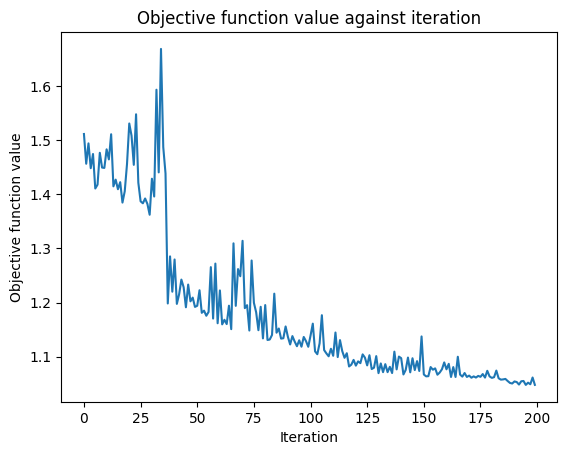

Precision:
 [0.8929249762583097, 0.925925925925926, 0.8635912698412699, 0.9555555555555555, 0.9163817663817664, 0.9047619047619047, 0.9203703703703704, 0.925925925925926, 0.9163817663817664, 0.9555555555555555]
Accuracy:
 [0.8888888888888888, 0.8888888888888888, 0.8611111111111112, 0.9444444444444444, 0.9166666666666666, 0.8333333333333334, 0.9166666666666666, 0.8888888888888888, 0.9166666666666666, 0.9444444444444444]
Recall:
 [0.8869047619047619, 0.9047619047619048, 0.8273809523809524, 0.9523809523809524, 0.9107142857142857, 0.8571428571428571, 0.9107142857142857, 0.9047619047619048, 0.9107142857142857, 0.9523809523809524]
F1:
 [0.8897966594045025, 0.8957264957264957, 0.859670781893004, 0.9465020576131687, 0.9156023839931886, 0.8446645946645945, 0.9175890449836811, 0.8957264957264957, 0.9156023839931886, 0.9465020576131687]
Time:
 [156.49138951301575, 155.3300166130066, 155.79430890083313, 155.23074793815613, 191.48892283439636, 200.82042741775513, 199.38114023208618, 199.00273489952

In [23]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

  rf = RandomForestClassifier(random_state=42)

  rf.fit(X_train, Y_train)

  feature_importances = rf.feature_importances_

  least_important_index = np.argmin(feature_importances)

  X_train = np.delete(X_train, least_important_index, axis=1)

  X_test = np.delete(X_test, least_important_index, axis=1)


  MAXITR = 200
  num_qubits = X.shape[1] //2
  opt = COBYLA(maxiter=MAXITR)

  featuremap = EfficientSU2(num_qubits=num_qubits, reps=0, parameter_prefix='x')
  ansatz = TwoLocal(num_qubits=num_qubits, reps=2, entanglement_blocks='cz', rotation_blocks=['rz', 'ry'])




  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)

  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recall:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)

**Precision:**
 [0.8929249762583097, 0.925925925925926, 0.8635912698412699, 0.9555555555555555, 0.9163817663817664, 0.9047619047619047, 0.9203703703703704, 0.925925925925926, 0.9163817663817664, 0.9555555555555555]

**Mean Precision:**
0.9177375016958351±0.026

**Accuracy:**
 [0.8888888888888888, 0.8888888888888888, 0.8611111111111112, 0.9444444444444444, 0.9166666666666666, 0.8333333333333334, 0.9166666666666666, 0.8888888888888888, 0.9166666666666666, 0.9444444444444444]

**Mean Accuracy:**
0.9±0.033

**Recall:**
 [0.8869047619047619, 0.9047619047619048, 0.8273809523809524, 0.9523809523809524, 0.9107142857142857, 0.8571428571428571, 0.9107142857142857, 0.9047619047619048, 0.9107142857142857, 0.9523809523809524]

**Mean Recall:**
0.9017857142857142±0.036

**F1:**
 [0.8897966594045025, 0.8957264957264957, 0.859670781893004, 0.9465020576131687, 0.9156023839931886, 0.8446645946645945, 0.9175890449836811, 0.8957264957264957, 0.9156023839931886, 0.9465020576131687]

**Mean F1**
0.9027382955611488±0.031

**Time:**
 [156.49138951301575, 155.3300166130066, 155.79430890083313, 155.23074793815613, 191.48892283439636, 200.82042741775513, 199.38114023208618, 199.00273489952087, 201.45121335983276, 202.8497440814972]
 
**Mean Time:**
181.78406457901002±21.478707474433612



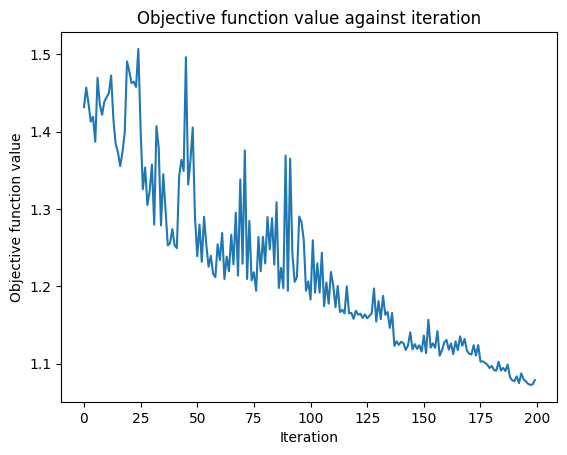

Precision:
 [0.8892773892773893, 0.9393939393939394, 0.8564814814814814, 0.8682336182336182, 0.8500000000000001, 0.9246913580246914, 0.9256410256410257, 0.9094794094794094, 0.71476453829395, 0.925925925925926]
Accuracy:
 [0.8611111111111112, 0.9166666666666666, 0.7777777777777778, 0.8611111111111112, 0.8333333333333334, 0.9166666666666666, 0.9166666666666666, 0.8888888888888888, 0.7222222222222222, 0.8888888888888888]
Recall:
 [0.8630952380952381, 0.9285714285714285, 0.7916666666666666, 0.8452380952380952, 0.8392857142857143, 0.9107142857142857, 0.9285714285714285, 0.9047619047619048, 0.6904761904761906, 0.9047619047619048]
F1:
 [0.8683960613785175, 0.9205944586061546, 0.7945480445480445, 0.8636528685548294, 0.8373694207027539, 0.9174598221251364, 0.9176954732510288, 0.8917878742440146, 0.7124082607953576, 0.8957264957264957]
Time:
 [249.6665449142456, 246.4471173286438, 244.6191051006317, 249.34004735946655, 252.51988863945007, 244.7626757621765, 195.51367473602295, 194.59669399261475

In [25]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

  rf = RandomForestClassifier(random_state=42)

  rf.fit(X_train, Y_train)

  feature_importances = rf.feature_importances_

  least_important_index = np.argmin(feature_importances)

  X_train = np.delete(X_train, least_important_index, axis=1)

  X_test = np.delete(X_test, least_important_index, axis=1)


  MAXITR = 200
  num_qubits = X.shape[1] //2
  opt = COBYLA(maxiter=MAXITR)

  featuremap = EfficientSU2(num_qubits=num_qubits, reps=0, parameter_prefix='x')
  ansatz = TwoLocal(num_qubits=num_qubits, reps=3, entanglement_blocks='cz', rotation_blocks=['rz', 'ry'])




  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)

  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recall:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)

**Precision:**
 [0.8892773892773893, 0.9393939393939394, 0.8564814814814814, 0.8682336182336182, 0.8500000000000001, 0.9246913580246914, 0.9256410256410257, 0.9094794094794094, 0.71476453829395, 0.925925925925926]

**Mean Precision:**
0.8803888685751431±0.062

**Accuracy:**
 [0.8611111111111112, 0.9166666666666666, 0.7777777777777778, 0.8611111111111112, 0.8333333333333334, 0.9166666666666666, 0.9166666666666666, 0.8888888888888888, 0.7222222222222222, 0.8888888888888888]

**Mean Accuracy:**
0.8583333333333332±0.061

**Recall:**
 [0.8630952380952381, 0.9285714285714285, 0.7916666666666666, 0.8452380952380952, 0.8392857142857143, 0.9107142857142857, 0.9285714285714285, 0.9047619047619048, 0.6904761904761906, 0.9047619047619048]

**Mean Recall:**
0.8607142857142855±0.07

**F1:**
 [0.8683960613785175, 0.9205944586061546, 0.7945480445480445, 0.8636528685548294, 0.8373694207027539, 0.9174598221251364, 0.9176954732510288, 0.8917878742440146, 0.7124082607953576, 0.8957264957264957]

**Mean F1:**
0.8619638779932334±0.06

**Time:**
 [249.6665449142456, 246.4471173286438, 244.6191051006317, 249.34004735946655, 252.51988863945007, 244.7626757621765, 195.51367473602295, 194.59669399261475, 194.86786794662476, 195.14848279953003]
 
**Mean Time:**
226.74820985794068±25.9922537923594



In [26]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

  rf = RandomForestClassifier(random_state=42)

  rf.fit(X_train, Y_train)

  feature_importances = rf.feature_importances_

  least_important_index = np.argmin(feature_importances)

  X_train = np.delete(X_train, least_important_index, axis=1)

  X_test = np.delete(X_test, least_important_index, axis=1)


  MAXITR = 200
  num_qubits = X.shape[1] //2
  opt = COBYLA(maxiter=MAXITR)

  featuremap = EfficientSU2(num_qubits=num_qubits, reps=0, parameter_prefix='x')
  ansatz = TwoLocal(num_qubits=num_qubits, reps=1, entanglement_blocks='cz', rotation_blocks=['rz', 'ry'])




  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)

  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recall:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)

Precision:
 [0.9034188034188033, 0.9176163342830009, 0.925925925925926, 0.8892773892773893, 0.925925925925926, 0.9228395061728395, 0.8929249762583097, 0.9555555555555555, 0.9145299145299144, 0.9047619047619047]
Accuracy:
 [0.8888888888888888, 0.9166666666666666, 0.8888888888888888, 0.8611111111111112, 0.8888888888888888, 0.9166666666666666, 0.8888888888888888, 0.9444444444444444, 0.8611111111111112, 0.8333333333333334]
Recall:
 [0.8869047619047619, 0.9285714285714285, 0.9047619047619048, 0.8630952380952381, 0.9047619047619048, 0.9107142857142857, 0.8869047619047619, 0.9523809523809524, 0.8809523809523809, 0.8571428571428571]
F1:
 [0.8930041152263376, 0.9159404502541757, 0.8957264957264957, 0.8683960613785175, 0.8944855967078189, 0.9186032437666424, 0.8897966594045025, 0.9465020576131687, 0.8705087505087504, 0.8460606060606062]
Time:
 [121.55064988136292, 122.79406714439392, 122.11337304115295, 122.25503087043762, 123.30447506904602, 123.73043942451477, 122.57032346725464, 122.549010753

**Precision:**
 [0.9034188034188033, 0.9176163342830009, 0.925925925925926, 0.8892773892773893, 0.925925925925926, 0.9228395061728395, 0.8929249762583097, 0.9555555555555555, 0.9145299145299144, 0.9047619047619047]

**Mean Precision:**
0.915277623610957±0.018

**Accuracy:**
 [0.8888888888888888, 0.9166666666666666, 0.8888888888888888, 0.8611111111111112, 0.8888888888888888, 0.9166666666666666, 0.8888888888888888, 0.9444444444444444, 0.8611111111111112, 0.8333333333333334]

**Mean Accuracy:**
0.888888888888889±0.03

**Recall:**
 [0.8869047619047619, 0.9285714285714285, 0.9047619047619048, 0.8630952380952381, 0.9047619047619048, 0.9107142857142857, 0.8869047619047619, 0.9523809523809524, 0.8809523809523809, 0.8571428571428571]

**Mean Recall:**
0.8976190476190476±0.0275

**F1:**
 [0.8930041152263376, 0.9159404502541757, 0.8957264957264957, 0.8683960613785175, 0.8944855967078189, 0.9186032437666424, 0.8897966594045025, 0.9465020576131687, 0.8705087505087504, 0.8460606060606062]

**Mean F1:**
 0.8939024036647016±0.027
 
**Time:**
 [121.55064988136292, 122.79406714439392, 122.11337304115295, 122.25503087043762, 123.30447506904602, 123.73043942451477, 122.57032346725464, 122.54901075363159, 122.69259524345398, 123.02915096282959]
 
**Mean Time:**
122.6589115858078±0.5856880500124855


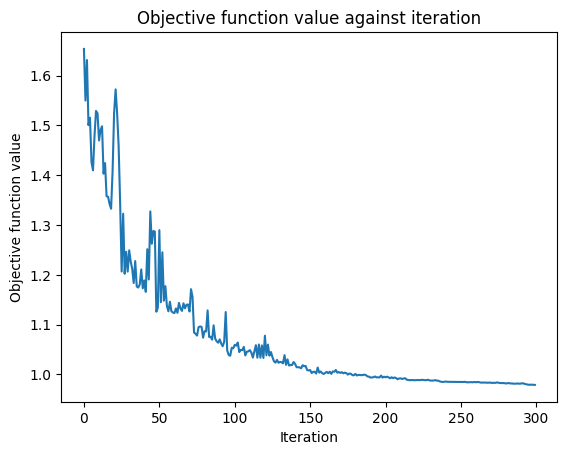

Precision:
 [0.9393939393939394, 0.9393939393939394, 0.9393939393939394, 0.9393939393939394, 0.9145299145299144, 0.925925925925926, 0.9166666666666666, 0.925925925925926, 0.925925925925926, 0.9034188034188033]
Accuracy:
 [0.9166666666666666, 0.9166666666666666, 0.9166666666666666, 0.9166666666666666, 0.8611111111111112, 0.8888888888888888, 0.9166666666666666, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888]
Recall:
 [0.9285714285714285, 0.9285714285714285, 0.9285714285714285, 0.9285714285714285, 0.8809523809523809, 0.9047619047619048, 0.9107142857142857, 0.9047619047619048, 0.9047619047619048, 0.8869047619047619]
F1:
 [0.9205944586061546, 0.9205944586061546, 0.9205944586061546, 0.9205944586061546, 0.8705087505087504, 0.8944855967078189, 0.9166666666666666, 0.8944855967078189, 0.8944855967078189, 0.8930041152263376]
Time:
 [183.14595007896423, 182.80808973312378, 183.73312878608704, 211.62290358543396, 231.75868821144104, 236.88856625556946, 236.1688630580902, 210.71531009674

In [28]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

  rf = RandomForestClassifier(random_state=42)

  rf.fit(X_train, Y_train)

  feature_importances = rf.feature_importances_

  least_important_index = np.argmin(feature_importances)

  X_train = np.delete(X_train, least_important_index, axis=1)

  X_test = np.delete(X_test, least_important_index, axis=1)


  MAXITR = 300
  num_qubits = X.shape[1] //2
  opt = COBYLA(maxiter=MAXITR)

  featuremap = EfficientSU2(num_qubits=num_qubits, reps=0, parameter_prefix='x')
  ansatz = TwoLocal(num_qubits=num_qubits, reps=1, entanglement_blocks='cz', rotation_blocks=['rz', 'ry'])




  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)

  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recall:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)

**Precision:**
 [0.9393939393939394, 0.9393939393939394, 0.9393939393939394, 0.9393939393939394, 0.9145299145299144, 0.925925925925926, 0.9166666666666666, 0.925925925925926, 0.925925925925926, 0.9034188034188033]

**Mean Precision:**
0.9269968919968921±0.012

**Accuracy:**
 [0.9166666666666666, 0.9166666666666666, 0.9166666666666666, 0.9166666666666666, 0.8611111111111112, 0.8888888888888888, 0.9166666666666666, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888]

**Mean Accuracy:**
0.9±0.018

**Recall:**
 [0.9285714285714285, 0.9285714285714285, 0.9285714285714285, 0.9285714285714285, 0.8809523809523809, 0.9047619047619048, 0.9107142857142857, 0.9047619047619048, 0.9047619047619048, 0.8869047619047619]

**Mean Recall:**
0.9107142857142858±0.017

**F1:**
 [0.9205944586061546, 0.9205944586061546, 0.9205944586061546, 0.9205944586061546, 0.8705087505087504, 0.8944855967078189, 0.9166666666666666, 0.8944855967078189, 0.8944855967078189, 0.8930041152263376]

**Mean F1:**
0.9046014156949831±0.017

**Time:**
 [183.14595007896423, 182.80808973312378, 183.73312878608704, 211.62290358543396, 231.75868821144104, 236.88856625556946, 236.1688630580902, 210.71531009674072, 183.46513152122498, 182.97371983528137]
 
**Mean Time:**
204.32803511619568±22.688512730204067


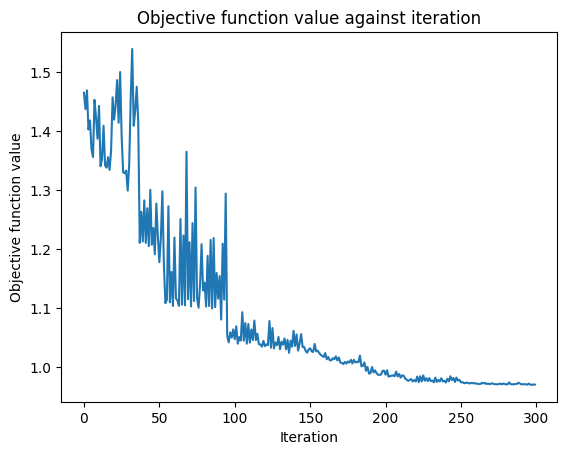

Precision:
 [0.9094794094794094, 0.9166666666666666, 0.7991452991452992, 0.9555555555555555, 0.896011396011396, 0.9009259259259258, 0.925925925925926, 0.9228395061728395, 0.9094794094794094, 0.9555555555555555]
Accuracy:
 [0.8888888888888888, 0.9166666666666666, 0.7777777777777778, 0.9444444444444444, 0.8611111111111112, 0.8888888888888888, 0.8888888888888888, 0.9166666666666666, 0.8888888888888888, 0.9444444444444444]
Recall:
 [0.9047619047619048, 0.9107142857142857, 0.7559523809523809, 0.9523809523809524, 0.8809523809523809, 0.8869047619047619, 0.9047619047619048, 0.9107142857142857, 0.9047619047619048, 0.9523809523809524]
F1:
 [0.8917878742440146, 0.9166666666666666, 0.786008230452675, 0.9465020576131687, 0.8656790123456789, 0.8907882241215574, 0.8957264957264957, 0.9186032437666424, 0.8917878742440146, 0.9465020576131687]
Time:
 [234.9155411720276, 236.34190893173218, 234.95381784439087, 235.53967380523682, 236.25861978530884, 237.01499915122986, 236.06364154815674, 267.45973324775

In [29]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

  rf = RandomForestClassifier(random_state=42)

  rf.fit(X_train, Y_train)

  feature_importances = rf.feature_importances_

  least_important_index = np.argmin(feature_importances)

  X_train = np.delete(X_train, least_important_index, axis=1)

  X_test = np.delete(X_test, least_important_index, axis=1)


  MAXITR = 300
  num_qubits = X.shape[1] //2
  opt = COBYLA(maxiter=MAXITR)

  featuremap = EfficientSU2(num_qubits=num_qubits, reps=0, parameter_prefix='x')
  ansatz = TwoLocal(num_qubits=num_qubits, reps=2, entanglement_blocks='cz', rotation_blocks=['rz', 'ry'])




  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)

  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recall:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)

**Precision:**
 [0.9094794094794094, 0.9166666666666666, 0.7991452991452992, 0.9555555555555555, 0.896011396011396, 0.9009259259259258, 0.925925925925926, 0.9228395061728395, 0.9094794094794094, 0.9555555555555555]

**Mean Precision:**
0.9091584649917983±0.041

**Accuracy:**
 [0.8888888888888888, 0.9166666666666666, 0.7777777777777778, 0.9444444444444444, 0.8611111111111112, 0.8888888888888888, 0.8888888888888888, 0.9166666666666666, 0.8888888888888888, 0.9444444444444444]

**Mean Accuracy:**
0.8916666666666666±0.046

**Recall:**
 [0.9047619047619048, 0.9107142857142857, 0.7559523809523809, 0.9523809523809524, 0.8809523809523809, 0.8869047619047619, 0.9047619047619048, 0.9107142857142857, 0.9047619047619048, 0.9523809523809524]

**Mean Recall:**
0.8964285714285714±0.052

**F1:**
 [0.8917878742440146, 0.9166666666666666, 0.786008230452675, 0.9465020576131687, 0.8656790123456789, 0.8907882241215574, 0.8957264957264957, 0.9186032437666424, 0.8917878742440146, 0.9465020576131687]

**Mean F1:**
0.8950051736794082±0.044

**Time:**
 [234.9155411720276, 236.34190893173218, 234.95381784439087, 235.53967380523682, 236.25861978530884, 237.01499915122986, 236.06364154815674, 267.45973324775696, 302.3043158054352, 300.0834147930145]
 
**Mean Time:**
252.09356660842894±26.279902602318625


In [30]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

  rf = RandomForestClassifier(random_state=42)

  rf.fit(X_train, Y_train)

  feature_importances = rf.feature_importances_

  least_important_index = np.argmin(feature_importances)

  X_train = np.delete(X_train, least_important_index, axis=1)

  X_test = np.delete(X_test, least_important_index, axis=1)


  MAXITR = 300
  num_qubits = X.shape[1] //2
  opt = COBYLA(maxiter=MAXITR)

  featuremap = EfficientSU2(num_qubits=num_qubits, reps=0, parameter_prefix='x')
  ansatz = TwoLocal(num_qubits=num_qubits, reps=3, entanglement_blocks='cz', rotation_blocks=['rz', 'ry'])




  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)

  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recall:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)

Precision:
 [0.9393939393939394, 0.9555555555555555, 0.925925925925926, 0.9055555555555556, 0.9116161616161617, 0.8914141414141414, 0.974074074074074, 0.9236111111111112, 0.8847222222222223, 0.8244625744625744]
Accuracy:
 [0.9166666666666666, 0.9444444444444444, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8611111111111112, 0.9722222222222222, 0.9166666666666666, 0.8611111111111112, 0.8055555555555556]
Recall:
 [0.9285714285714285, 0.9523809523809524, 0.9047619047619048, 0.8869047619047619, 0.9047619047619048, 0.8630952380952381, 0.9761904761904763, 0.9107142857142857, 0.8630952380952381, 0.8154761904761904]
F1:
 [0.9205944586061546, 0.9465020576131687, 0.8944855967078189, 0.8929249762583095, 0.89046783625731, 0.8670760233918129, 0.9721867461331064, 0.9163817663817664, 0.8598765432098765, 0.8085670015494577]
Time:
 [341.1889729499817, 328.0985631942749, 369.09259366989136, 371.76506638526917, 372.44227623939514, 365.26895356178284, 299.3195288181305, 291.88140630722046

**Precision:**
 [0.9393939393939394, 0.9555555555555555, 0.925925925925926, 0.9055555555555556, 0.9116161616161617, 0.8914141414141414, 0.974074074074074, 0.9236111111111112, 0.8847222222222223, 0.8244625744625744]

**Mean Precision:**
0.9136331261331261±0.04

**Accuracy:**
 [0.9166666666666666, 0.9444444444444444, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8611111111111112, 0.9722222222222222, 0.9166666666666666, 0.8611111111111112, 0.8055555555555556]

**Mean Accuracy:**
0.8944444444444445±0.044

**Recall:**
 [0.9285714285714285, 0.9523809523809524, 0.9047619047619048, 0.8869047619047619, 0.9047619047619048, 0.8630952380952381, 0.9761904761904763, 0.9107142857142857, 0.8630952380952381, 0.8154761904761904]

**Mean Recall:**
0.900595238095238±0.044

**F1:**
 [0.9205944586061546, 0.9465020576131687, 0.8944855967078189, 0.8929249762583095, 0.89046783625731, 0.8670760233918129, 0.9721867461331064, 0.9163817663817664, 0.8598765432098765, 0.8085670015494577]

**Mean F1:**
 0.8969063006108782±0.044

**Time:**
 [341.1889729499817, 328.0985631942749, 369.09259366989136, 371.76506638526917, 372.44227623939514, 365.26895356178284, 299.3195288181305, 291.88140630722046, 292.1728472709656, 292.1734161376953]
 
**Mean Time:**
332.34036245346067±34.12901344681647


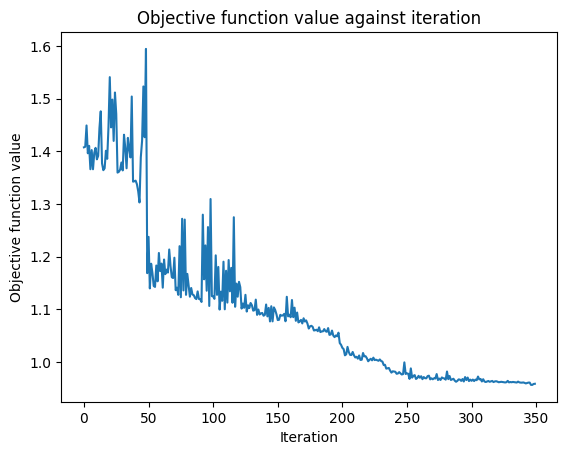

Precision:
 [0.9753086419753088, 0.9145299145299144, 0.9228395061728395, 0.925925925925926, 0.9047619047619047, 0.9034188034188033, 0.9236111111111112, 0.8592592592592593, 0.925925925925926, 0.9393939393939394]
Accuracy:
 [0.9722222222222222, 0.8611111111111112, 0.9166666666666666, 0.8888888888888888, 0.8333333333333334, 0.8888888888888888, 0.9166666666666666, 0.8333333333333334, 0.8888888888888888, 0.9166666666666666]
Recall:
 [0.9761904761904763, 0.8809523809523809, 0.9107142857142857, 0.9047619047619048, 0.8571428571428571, 0.8869047619047619, 0.8928571428571429, 0.8214285714285715, 0.9047619047619048, 0.9285714285714285]
F1:
 [0.9725248123940935, 0.8678718400940624, 0.9186032437666424, 0.8944855967078189, 0.8460606060606062, 0.8930041152263376, 0.9145502645502646, 0.839029374201788, 0.8944855967078189, 0.9182456140350878]
Time:
 [343.91902565956116, 441.6792607307434, 437.2064847946167, 427.67659759521484, 342.0132865905762, 340.8148512840271, 341.67409014701843, 340.7586371898651,

In [31]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

  rf = RandomForestClassifier(random_state=42)

  rf.fit(X_train, Y_train)

  feature_importances = rf.feature_importances_

  least_important_index = np.argmin(feature_importances)

  X_train = np.delete(X_train, least_important_index, axis=1)

  X_test = np.delete(X_test, least_important_index, axis=1)


  MAXITR = 350
  num_qubits = X.shape[1] //2
  opt = COBYLA(maxiter=MAXITR)

  featuremap = EfficientSU2(num_qubits=num_qubits, reps=0, parameter_prefix='x')
  ansatz = TwoLocal(num_qubits=num_qubits, reps=3, entanglement_blocks='cz', rotation_blocks=['rz', 'ry'])




  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)

  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recall:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)

**Precision:**
 [0.9753086419753088, 0.9145299145299144, 0.9228395061728395, 0.925925925925926, 0.9047619047619047, 0.9034188034188033, 0.9236111111111112, 0.8592592592592593, 0.925925925925926, 0.9393939393939394]

**Mean Precision:**
0.9194974932474931±0.028

**Accuracy:**
 [0.9722222222222222, 0.8611111111111112, 0.9166666666666666, 0.8888888888888888, 0.8333333333333334, 0.8888888888888888, 0.9166666666666666, 0.8333333333333334, 0.8888888888888888, 0.9166666666666666]

**Mean Accuracy:**
0.8916666666666666±0.04

**Recall:**
 [0.9761904761904763, 0.8809523809523809, 0.9107142857142857, 0.9047619047619048, 0.8571428571428571, 0.8869047619047619, 0.8928571428571429, 0.8214285714285715, 0.9047619047619048, 0.9285714285714285]

**Mean Recall:**
0.8964285714285716±0.039

**F1:**
 [0.9725248123940935, 0.8678718400940624, 0.9186032437666424, 0.8944855967078189, 0.8460606060606062, 0.8930041152263376, 0.9145502645502646, 0.839029374201788, 0.8944855967078189, 0.9182456140350878]

**Mean F1:**
0.8958861063744521±0.037

**Time:**
 [343.91902565956116, 441.6792607307434, 437.2064847946167, 427.67659759521484, 342.0132865905762, 340.8148512840271, 341.67409014701843, 340.7586371898651, 378.65614581108093, 454.22248673439026]
 
**Mean Time:**
384.8620866537094±46.81177051350796


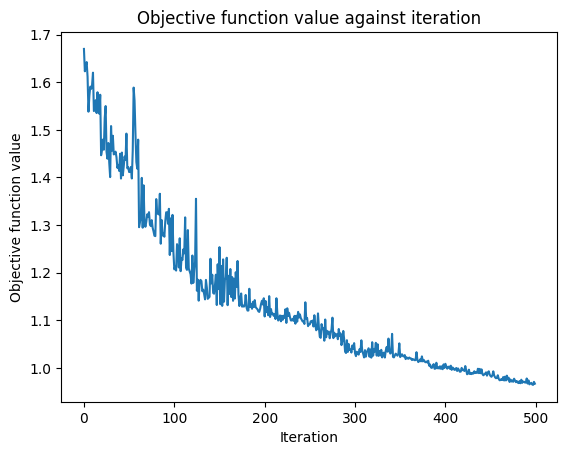

Precision:
 [0.9753086419753088, 0.8867845117845117, 0.9393939393939394, 0.925925925925926, 0.7882716049382715, 0.9393939393939394, 0.8953373015873015, 0.9393939393939394, 0.9277777777777777, 0.9753086419753088]
Accuracy:
 [0.9722222222222222, 0.8611111111111112, 0.9166666666666666, 0.8888888888888888, 0.7222222222222222, 0.9166666666666666, 0.8888888888888888, 0.9166666666666666, 0.9166666666666666, 0.9722222222222222]
Recall:
 [0.9761904761904763, 0.8630952380952381, 0.9285714285714285, 0.9047619047619048, 0.7619047619047619, 0.9285714285714285, 0.8690476190476191, 0.9285714285714285, 0.9285714285714285, 0.9761904761904763]
F1:
 [0.9725248123940935, 0.8672881158261275, 0.9205944586061546, 0.8957264957264957, 0.724266072092159, 0.9205944586061546, 0.8893004115226337, 0.9205944586061546, 0.9176163342830009, 0.9725248123940935]
Time:
 [684.6943068504333, 596.5562462806702, 586.8606774806976, 568.1896049976349, 570.4605326652527, 611.3181092739105, 665.363055229187, 600.3840615749359, 59

In [6]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

  rf = RandomForestClassifier(random_state=42)

  rf.fit(X_train, Y_train)

  feature_importances = rf.feature_importances_

  least_important_index = np.argmin(feature_importances)

  X_train = np.delete(X_train, least_important_index, axis=1)

  X_test = np.delete(X_test, least_important_index, axis=1)


  MAXITR = 500
  num_qubits = X.shape[1] //2
  opt = COBYLA(maxiter=MAXITR)

  featuremap = EfficientSU2(num_qubits=num_qubits, reps=0, parameter_prefix='x')
  ansatz = TwoLocal(num_qubits=num_qubits, reps=4, entanglement_blocks='cz', rotation_blocks=['rz', 'ry'])




  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)

  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recall:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)
    
  t = np.mean(times)
  t_std = np.std(times)
  p = np.mean(precisions)
  p_std = np.std(precisions)
  a = np.mean(accuracies)
  a_std = np.std(accuracies)
  f = np.mean(f1s)
  f_std = np.std(f1s)
  r = np.mean(recall)
  r_std = np.std(recall)
  
  print(f"Mean Precision: {p}±{p_std}")
  print(f"Mean Accuracy: {a}±{a_std}")
  print(f"Mean Recall: {r}±{r_std}")
  print(f"Mean F1: {f}±{f_std}")
  print(f"Mean Time: {t}±{t_std}")
#   0.9065476190476189±0.05988284575251499

# **EfficientSU2+Hadamard/TwoLocal**

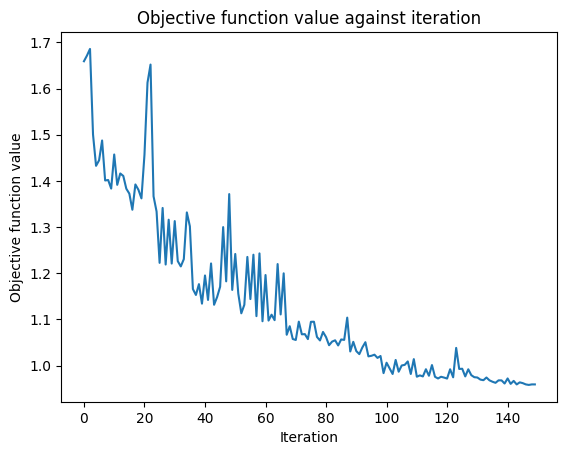

Precision:
 [0.947530864197531, 0.9444444444444444, 0.9277777777777777, 0.7929292929292928, 0.947530864197531, 0.7603485838779956, 0.8898385565052231, 0.9207027540360875, 0.947530864197531, 0.9176163342830009]
Accuracy:
 [0.9444444444444444, 0.9444444444444444, 0.9166666666666666, 0.7777777777777778, 0.9444444444444444, 0.7222222222222222, 0.8888888888888888, 0.9166666666666666, 0.9444444444444444, 0.9166666666666666]
Recall:
 [0.9523809523809524, 0.9523809523809524, 0.9285714285714285, 0.7916666666666666, 0.9523809523809524, 0.7440476190476191, 0.9047619047619048, 0.9107142857142857, 0.9523809523809524, 0.9285714285714285]
F1:
 [0.9447470346163157, 0.9444444444444444, 0.9176163342830009, 0.7770760233918129, 0.9447470346163157, 0.7039426523297492, 0.888162672476398, 0.9175744371822803, 0.9447470346163157, 0.9159404502541757]
Time:
 [123.21550250053406, 129.78526782989502, 128.23483085632324, 126.32370901107788, 129.77939701080322, 126.15370774269104, 128.3030288219452, 130.215711832046

In [13]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

  rf = RandomForestClassifier(random_state=42)

  rf.fit(X_train, Y_train)

  feature_importances = rf.feature_importances_

  least_important_index = np.argmin(feature_importances)

  X_train = np.delete(X_train, least_important_index, axis=1)

  X_test = np.delete(X_test, least_important_index, axis=1)


  MAXITR = 150
  num_qubits = X.shape[1] //2
  opt = COBYLA(maxiter=MAXITR)
    
  qc_init = QuantumCircuit(num_qubits)
  for i in range(num_qubits):
    qc_init.h(i)

  featuremap = EfficientSU2(num_qubits=num_qubits, reps=0, parameter_prefix='x'
                           ,initial_state=qc_init)
  ansatz = TwoLocal(num_qubits=num_qubits, reps=1, entanglement_blocks='cz', rotation_blocks=['rz', 'ry'])




  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)

  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recall:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)
  
  t = np.mean(times)
  t_std = np.std(times)
  p = np.mean(precisions)
  p_std = np.std(precisions)
  a = np.mean(accuracies)
  a_std = np.std(accuracies)
  f = np.mean(f1s)
  f_std = np.std(f1s)
  r = np.mean(recalls)
  r_std = np.std(recalls)
  
  print(f"Mean Precision: {p}±{p_std}")
  print(f"Mean Accuracy: {a}±{a_std}")
  print(f"Mean Recall: {r}±{r_std}")
  print(f"Mean F1: {f}±{f_std}")
  print(f"Mean Time: {t}±{t_std}")

Precision:
 [0.947530864197531, 0.9444444444444444, 0.9277777777777777, 0.7929292929292928, 0.947530864197531, 0.7603485838779956, 0.8898385565052231, 0.9207027540360875, 0.947530864197531, 0.9176163342830009]
Accuracy:
 [0.9444444444444444, 0.9444444444444444, 0.9166666666666666, 0.7777777777777778, 0.9444444444444444, 0.7222222222222222, 0.8888888888888888, 0.9166666666666666, 0.9444444444444444, 0.9166666666666666]
Recall:
 [0.9523809523809524, 0.9523809523809524, 0.9285714285714285, 0.7916666666666666, 0.9523809523809524, 0.7440476190476191, 0.9047619047619048, 0.9107142857142857, 0.9523809523809524, 0.9285714285714285]
F1:
 [0.9447470346163157, 0.9444444444444444, 0.9176163342830009, 0.7770760233918129, 0.9447470346163157, 0.7039426523297492, 0.888162672476398, 0.9175744371822803, 0.9447470346163157, 0.9159404502541757]
Time:
 [123.21550250053406, 129.78526782989502, 128.23483085632324, 126.32370901107788, 129.77939701080322, 126.15370774269104, 128.3030288219452, 130.2157118320465, 127.51935315132141, 129.93356275558472]
 
Mean Precision: 0.8996250336446415±0.06428989443630462
Mean Accuracy: 0.8916666666666666±0.07396403864274637
Mean Recall: 0.9017857142857142±0.06983591474780103
Mean F1: 0.8898998118210809±0.07843740555631334
Mean Time: 127.94640715122223±2.108575660417705


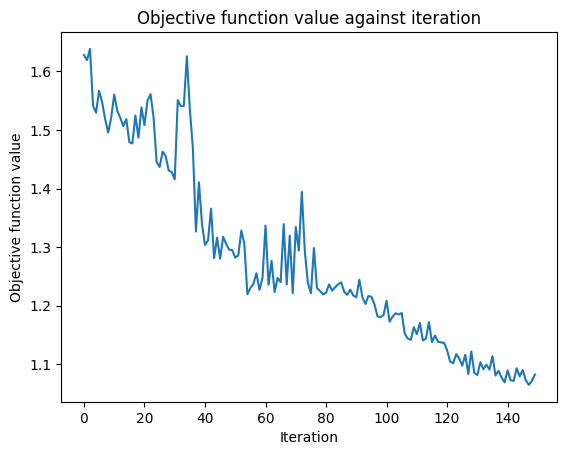

Precision:
 [0.8348117024587612, 0.9236111111111112, 0.9236111111111112, 0.6994047619047619, 0.8382716049382716, 0.7885521885521886, 0.8691358024691359, 0.8634259259259259, 0.7885521885521886, 0.8598137973137974]
Accuracy:
 [0.8333333333333334, 0.9166666666666666, 0.9166666666666666, 0.6666666666666666, 0.8055555555555556, 0.7777777777777778, 0.8333333333333334, 0.8611111111111112, 0.7777777777777778, 0.8611111111111112]
Recall:
 [0.8214285714285715, 0.8928571428571429, 0.8928571428571429, 0.6785714285714285, 0.8154761904761904, 0.7738095238095238, 0.8571428571428571, 0.8452380952380952, 0.7738095238095238, 0.8452380952380952]
F1:
 [0.8281775572098152, 0.9145502645502646, 0.9145502645502646, 0.6590909090909091, 0.8015658837248043, 0.7768071519795658, 0.8206369248035915, 0.8586894586894587, 0.7768071519795658, 0.8576131687242798]
Time:
 [158.24889469146729, 163.21503329277039, 164.24885725975037, 160.59579920768738, 160.64016151428223, 150.30864024162292, 124.57698559761047, 124.6855385

In [14]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

  rf = RandomForestClassifier(random_state=42)

  rf.fit(X_train, Y_train)

  feature_importances = rf.feature_importances_

  least_important_index = np.argmin(feature_importances)

  X_train = np.delete(X_train, least_important_index, axis=1)

  X_test = np.delete(X_test, least_important_index, axis=1)


  MAXITR = 150
  num_qubits = X.shape[1] //2
  opt = COBYLA(maxiter=MAXITR)
    
  qc_init = QuantumCircuit(num_qubits)
  for i in range(num_qubits):
    qc_init.h(i)

  featuremap = EfficientSU2(num_qubits=num_qubits, reps=0, parameter_prefix='x'
                           ,initial_state=qc_init)
  ansatz = TwoLocal(num_qubits=num_qubits, reps=2, entanglement_blocks='cz', rotation_blocks=['rz', 'ry'])




  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)

  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recall:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)
  
  t = np.mean(times)
  t_std = np.std(times)
  p = np.mean(precisions)
  p_std = np.std(precisions)
  a = np.mean(accuracies)
  a_std = np.std(accuracies)
  f = np.mean(f1s)
  f_std = np.std(f1s)
  r = np.mean(recalls)
  r_std = np.std(recalls)
  
  print(f"Mean Precision: {p}±{p_std}")
  print(f"Mean Accuracy: {a}±{a_std}")
  print(f"Mean Recall: {r}±{r_std}")
  print(f"Mean F1: {f}±{f_std}")
  print(f"Mean Time: {t}±{t_std}")

Precision:
 [0.8348117024587612, 0.9236111111111112, 0.9236111111111112, 0.6994047619047619, 0.8382716049382716, 0.7885521885521886, 0.8691358024691359, 0.8634259259259259, 0.7885521885521886, 0.8598137973137974]
Accuracy:
 [0.8333333333333334, 0.9166666666666666, 0.9166666666666666, 0.6666666666666666, 0.8055555555555556, 0.7777777777777778, 0.8333333333333334, 0.8611111111111112, 0.7777777777777778, 0.8611111111111112]
Recall:
 [0.8214285714285715, 0.8928571428571429, 0.8928571428571429, 0.6785714285714285, 0.8154761904761904, 0.7738095238095238, 0.8571428571428571, 0.8452380952380952, 0.7738095238095238, 0.8452380952380952]
F1:
 [0.8281775572098152, 0.9145502645502646, 0.9145502645502646, 0.6590909090909091, 0.8015658837248043, 0.7768071519795658, 0.8206369248035915, 0.8586894586894587, 0.7768071519795658, 0.8576131687242798]
Time:
 [158.24889469146729, 163.21503329277039, 164.24885725975037, 160.59579920768738, 160.64016151428223, 150.30864024162292, 124.57698559761047, 124.68553853034973, 124.32200574874878, 124.54701137542725]
 
Mean Precision: 0.8389190194337253±0.06391469903635931
Mean Accuracy: 0.825±0.07032771611762313
Mean Recall: 0.8196428571428571±0.061286403407529055
Mean F1: 0.820848873530252±0.07128393816345045
Mean Time: 145.53889274597168±17.51182862707396


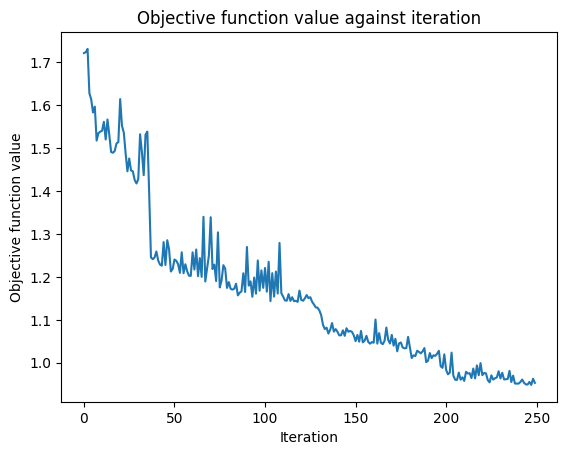

Precision:
 [0.8330687830687831, 0.9555555555555555, 0.8630104463437797, 0.9256410256410257, 0.9462962962962962, 0.9753086419753088, 0.9493827160493827, 0.8922839506172839, 0.9462962962962962, 0.947530864197531]
Accuracy:
 [0.8333333333333334, 0.9444444444444444, 0.8611111111111112, 0.9166666666666666, 0.9444444444444444, 0.9722222222222222, 0.9444444444444444, 0.8888888888888888, 0.9444444444444444, 0.9444444444444444]
Recall:
 [0.8214285714285715, 0.9523809523809524, 0.8630952380952381, 0.9285714285714285, 0.9345238095238096, 0.9761904761904763, 0.9523809523809524, 0.8869047619047619, 0.9345238095238096, 0.9523809523809524]
F1:
 [0.831992337164751, 0.9465020576131687, 0.8609900750423626, 0.9176954732510288, 0.9439974457215836, 0.9725248123940935, 0.9436036129748098, 0.8875452922106066, 0.9439974457215836, 0.9447470346163157]
Time:
 [260.8236196041107, 266.1265766620636, 269.0379741191864, 237.83068323135376, 274.5266718864441, 271.80985021591187, 251.52509379386902, 234.6498901844024

In [15]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

  rf = RandomForestClassifier(random_state=42)

  rf.fit(X_train, Y_train)

  feature_importances = rf.feature_importances_

  least_important_index = np.argmin(feature_importances)

  X_train = np.delete(X_train, least_important_index, axis=1)

  X_test = np.delete(X_test, least_important_index, axis=1)


  MAXITR = 250
  num_qubits = X.shape[1] //2
  opt = COBYLA(maxiter=MAXITR)
    
  qc_init = QuantumCircuit(num_qubits)
  for i in range(num_qubits):
    qc_init.h(i)

  featuremap = EfficientSU2(num_qubits=num_qubits, reps=0, parameter_prefix='x'
                           ,initial_state=qc_init)
  ansatz = TwoLocal(num_qubits=num_qubits, reps=2, entanglement_blocks='cz', rotation_blocks=['rz', 'ry'])




  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)

  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recall:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)
  
  t = np.mean(times)
  t_std = np.std(times)
  p = np.mean(precisions)
  p_std = np.std(precisions)
  a = np.mean(accuracies)
  a_std = np.std(accuracies)
  f = np.mean(f1s)
  f_std = np.std(f1s)
  r = np.mean(recalls)
  r_std = np.std(recalls)
  
  print(f"Mean Precision: {p}±{p_std}")
  print(f"Mean Accuracy: {a}±{a_std}")
  print(f"Mean Recall: {r}±{r_std}")
  print(f"Mean F1: {f}±{f_std}")
  print(f"Mean Time: {t}±{t_std}")

Precision:
 [0.8330687830687831, 0.9555555555555555, 0.8630104463437797, 0.9256410256410257, 0.9462962962962962, 0.9753086419753088, 0.9493827160493827, 0.8922839506172839, 0.9462962962962962, 0.947530864197531]
Accuracy:
 [0.8333333333333334, 0.9444444444444444, 0.8611111111111112, 0.9166666666666666, 0.9444444444444444, 0.9722222222222222, 0.9444444444444444, 0.8888888888888888, 0.9444444444444444, 0.9444444444444444]
Recall:
 [0.8214285714285715, 0.9523809523809524, 0.8630952380952381, 0.9285714285714285, 0.9345238095238096, 0.9761904761904763, 0.9523809523809524, 0.8869047619047619, 0.9345238095238096, 0.9523809523809524]
F1:
 [0.831992337164751, 0.9465020576131687, 0.8609900750423626, 0.9176954732510288, 0.9439974457215836, 0.9725248123940935, 0.9436036129748098, 0.8875452922106066, 0.9439974457215836, 0.9447470346163157]
Time:
 [260.8236196041107, 266.1265766620636, 269.0379741191864, 237.83068323135376, 274.5266718864441, 271.80985021591187, 251.52509379386902, 234.64989018440247, 227.89673495292664, 214.16084814071655]
 
Mean Precision: 0.9234374576041244±0.04337535176879571
Mean Accuracy: 0.9194444444444445±0.04203540541783764
Mean Recall: 0.9202380952380954±0.045659068835155026
Mean F1: 0.9193595586710306±0.04250241552706723
Mean Time: 250.83879427909852±19.922089000289706


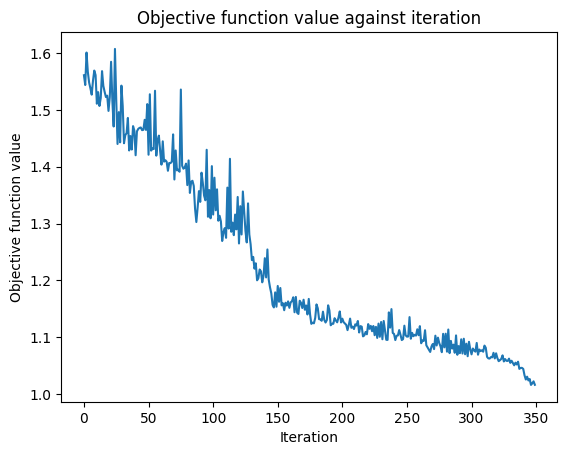

Precision:
 [0.9493827160493827, 0.925925925925926, 0.9145502645502646, 0.8670384399551065, 0.8683501683501683, 0.824074074074074, 0.9176163342830009, 0.9493827160493827, 0.8630104463437797, 0.8339506172839506]
Accuracy:
 [0.9444444444444444, 0.8888888888888888, 0.9166666666666666, 0.8611111111111112, 0.8611111111111112, 0.8055555555555556, 0.9166666666666666, 0.9444444444444444, 0.8611111111111112, 0.8333333333333334]
Recall:
 [0.9523809523809524, 0.9047619047619048, 0.8928571428571429, 0.8809523809523809, 0.8809523809523809, 0.8333333333333334, 0.9285714285714285, 0.9523809523809524, 0.8630952380952381, 0.8392857142857143]
F1:
 [0.9436036129748098, 0.8907407407407406, 0.914367816091954, 0.8572984749455339, 0.8573009791400596, 0.7956539499857915, 0.9159404502541757, 0.9436036129748098, 0.8609900750423626, 0.8308108389244293]
Time:
 [356.45901107788086, 356.3029730319977, 356.482542514801, 445.8015375137329, 440.69279646873474, 475.951064825058, 472.3660635948181, 392.77317070961, 510.

In [16]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

  rf = RandomForestClassifier(random_state=42)

  rf.fit(X_train, Y_train)

  feature_importances = rf.feature_importances_

  least_important_index = np.argmin(feature_importances)

  X_train = np.delete(X_train, least_important_index, axis=1)

  X_test = np.delete(X_test, least_important_index, axis=1)


  MAXITR = 350
  num_qubits = X.shape[1] //2
  opt = COBYLA(maxiter=MAXITR)
    
  qc_init = QuantumCircuit(num_qubits)
  for i in range(num_qubits):
    qc_init.h(i)

  featuremap = EfficientSU2(num_qubits=num_qubits, reps=0, parameter_prefix='x'
                           ,initial_state=qc_init)
  ansatz = TwoLocal(num_qubits=num_qubits, reps=3, entanglement_blocks='cz', rotation_blocks=['rz', 'ry'])




  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)

  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recall:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)
  
  t = np.mean(times)
  t_std = np.std(times)
  p = np.mean(precisions)
  p_std = np.std(precisions)
  a = np.mean(accuracies)
  a_std = np.std(accuracies)
  f = np.mean(f1s)
  f_std = np.std(f1s)
  r = np.mean(recalls)
  r_std = np.std(recalls)
  
  print(f"Mean Precision: {p}±{p_std}")
  print(f"Mean Accuracy: {a}±{a_std}")
  print(f"Mean Recall: {r}±{r_std}")
  print(f"Mean F1: {f}±{f_std}")
  print(f"Mean Time: {t}±{t_std}")

Precision:
 [0.9493827160493827, 0.925925925925926, 0.9145502645502646, 0.8670384399551065, 0.8683501683501683, 0.824074074074074, 0.9176163342830009, 0.9493827160493827, 0.8630104463437797, 0.8339506172839506]
Accuracy:
 [0.9444444444444444, 0.8888888888888888, 0.9166666666666666, 0.8611111111111112, 0.8611111111111112, 0.8055555555555556, 0.9166666666666666, 0.9444444444444444, 0.8611111111111112, 0.8333333333333334]
Recall:
 [0.9523809523809524, 0.9047619047619048, 0.8928571428571429, 0.8809523809523809, 0.8809523809523809, 0.8333333333333334, 0.9285714285714285, 0.9523809523809524, 0.8630952380952381, 0.8392857142857143]
F1:
 [0.9436036129748098, 0.8907407407407406, 0.914367816091954, 0.8572984749455339, 0.8573009791400596, 0.7956539499857915, 0.9159404502541757, 0.9436036129748098, 0.8609900750423626, 0.8308108389244293]
Time:
 [356.45901107788086, 356.3029730319977, 356.482542514801, 445.8015375137329, 440.69279646873474, 475.951064825058, 472.3660635948181, 392.77317070961, 510.92702984809875, 491.3834593296051]
 
Mean Precision: 0.8913281702865035±0.043477774320704876
Mean Accuracy: 0.8833333333333334±0.04444444444444442
Mean Recall: 0.8928571428571429±0.0401068583998167
Mean F1: 0.8810310551074668±0.046469609891440736
Mean Time: 429.9139648914337±56.76057576854857


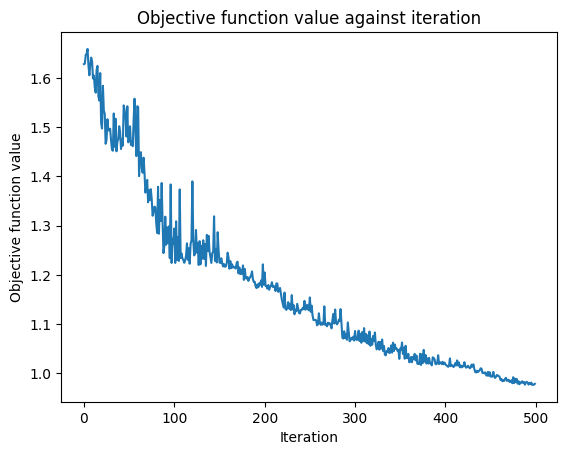

Precision:
 [0.9176163342830009, 0.9134680134680134, 0.9256410256410257, 0.8663580246913579, 0.974074074074074, 0.8910493827160493, 0.9493827160493827, 1.0, 0.9493827160493827, 0.9513888888888888]
Accuracy:
 [0.9166666666666666, 0.8888888888888888, 0.9166666666666666, 0.8611111111111112, 0.9722222222222222, 0.8888888888888888, 0.9444444444444444, 1.0, 0.9444444444444444, 0.9444444444444444]
Recall:
 [0.9285714285714285, 0.9047619047619048, 0.9285714285714285, 0.8630952380952381, 0.9761904761904763, 0.9047619047619048, 0.9523809523809524, 1.0, 0.9523809523809524, 0.9523809523809524]
F1:
 [0.9159404502541757, 0.8866875042011159, 0.9176954732510288, 0.8607253688389592, 0.9721867461331064, 0.8868691596886323, 0.9436036129748098, 1.0, 0.9436036129748098, 0.9441595441595442]
Time:
 [878.1305494308472, 879.4321615695953, 855.2608759403229, 856.7435941696167, 946.7726550102234, 947.312028169632, 1029.7185146808624, 897.1140203475952, 1013.1820526123047, 902.52090716362]
Mean Precision: 0.93383

In [17]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

  rf = RandomForestClassifier(random_state=42)

  rf.fit(X_train, Y_train)

  feature_importances = rf.feature_importances_

  least_important_index = np.argmin(feature_importances)

  X_train = np.delete(X_train, least_important_index, axis=1)

  X_test = np.delete(X_test, least_important_index, axis=1)


  MAXITR = 500
  num_qubits = X.shape[1] //2
  opt = COBYLA(maxiter=MAXITR)
    
  qc_init = QuantumCircuit(num_qubits)
  for i in range(num_qubits):
    qc_init.h(i)

  featuremap = EfficientSU2(num_qubits=num_qubits, reps=0, parameter_prefix='x'
                           ,initial_state=qc_init)
  ansatz = TwoLocal(num_qubits=num_qubits, reps=4, entanglement_blocks='cz', rotation_blocks=['rz', 'ry'])




  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)

  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recall:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)
  
  t = np.mean(times)
  t_std = np.std(times)
  p = np.mean(precisions)
  p_std = np.std(precisions)
  a = np.mean(accuracies)
  a_std = np.std(accuracies)
  f = np.mean(f1s)
  f_std = np.std(f1s)
  r = np.mean(recalls)
  r_std = np.std(recalls)
  
  print(f"Mean Precision: {p}±{p_std}")
  print(f"Mean Accuracy: {a}±{a_std}")
  print(f"Mean Recall: {r}±{r_std}")
  print(f"Mean F1: {f}±{f_std}")
  print(f"Mean Time: {t}±{t_std}")

Precision:
 [0.9176163342830009, 0.9134680134680134, 0.9256410256410257, 0.8663580246913579, 0.974074074074074, 0.8910493827160493, 0.9493827160493827, 1.0, 0.9493827160493827, 0.9513888888888888]
Accuracy:
 [0.9166666666666666, 0.8888888888888888, 0.9166666666666666, 0.8611111111111112, 0.9722222222222222, 0.8888888888888888, 0.9444444444444444, 1.0, 0.9444444444444444, 0.9444444444444444]
Recall:
 [0.9285714285714285, 0.9047619047619048, 0.9285714285714285, 0.8630952380952381, 0.9761904761904763, 0.9047619047619048, 0.9523809523809524, 1.0, 0.9523809523809524, 0.9523809523809524]
F1:
 [0.9159404502541757, 0.8866875042011159, 0.9176954732510288, 0.8607253688389592, 0.9721867461331064, 0.8868691596886323, 0.9436036129748098, 1.0, 0.9436036129748098, 0.9441595441595442]
Time:
 [878.1305494308472, 879.4321615695953, 855.2608759403229, 856.7435941696167, 946.7726550102234, 947.312028169632, 1029.7185146808624, 897.1140203475952, 1013.1820526123047, 902.52090716362]
 
Mean Precision: 0.9338361175861177±0.0373059565963372
Mean Accuracy: 0.9277777777777777±0.03967460238079361
Mean Recall: 0.9363095238095239±0.03727255286774589
Mean F1: 0.9271471472476183±0.040066484300643475
Mean Time: 920.618735909462±58.822236620260554


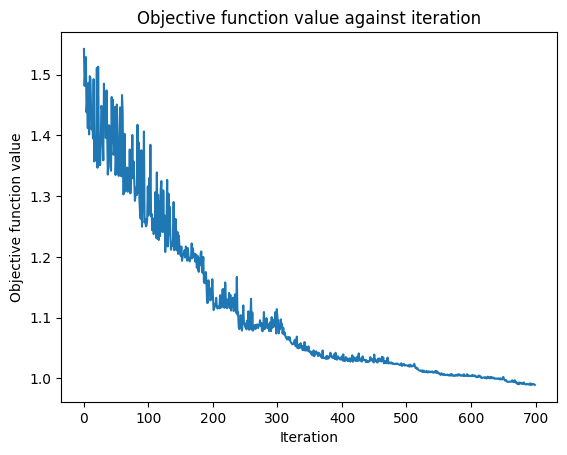

Precision:
 [0.925925925925926]
Accuracy:
 [0.8888888888888888]
Recall:
 [0.9047619047619048]
F1:
 [0.8944855967078189]
Time:
 [970.856837272644]
Mean Precision: 0.925925925925926±0.0
Mean Accuracy: 0.8888888888888888±0.0
Mean Recall: 0.9047619047619048±0.0
Mean F1: 0.8944855967078189±0.0
Mean Time: 970.856837272644±0.0


In [7]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(1):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

  rf = RandomForestClassifier(random_state=42)

  rf.fit(X_train, Y_train)

  feature_importances = rf.feature_importances_

  least_important_index = np.argmin(feature_importances)

  X_train = np.delete(X_train, least_important_index, axis=1)

  X_test = np.delete(X_test, least_important_index, axis=1)


  MAXITR = 700
  num_qubits = X.shape[1] //2
  opt = COBYLA(maxiter=MAXITR)

  featuremap = EfficientSU2(num_qubits=num_qubits, reps=0, parameter_prefix='x')
  ansatz = TwoLocal(num_qubits=num_qubits, reps=4, entanglement_blocks='cz', rotation_blocks=['rz', 'ry'])




  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)

  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recall:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)
    
  t = np.mean(times)
  t_std = np.std(times)
  p = np.mean(precisions)
  p_std = np.std(precisions)
  a = np.mean(accuracies)
  a_std = np.std(accuracies)
  f = np.mean(f1s)
  f_std = np.std(f1s)
  r = np.mean(recall)
  r_std = np.std(recall)
  
  print(f"Mean Precision: {p}±{p_std}")
  print(f"Mean Accuracy: {a}±{a_std}")
  print(f"Mean Recall: {r}±{r_std}")
  print(f"Mean F1: {f}±{f_std}")
  print(f"Mean Time: {t}±{t_std}")
#   0.9065476190476189±0.05988284575251499

# **EfficientSU2/PauliTwoDesign**

In [15]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(1):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

  rf = RandomForestClassifier(random_state=42)

  rf.fit(X_train, Y_train)

  feature_importances = rf.feature_importances_

  least_important_index = np.argmin(feature_importances)

  X_train = np.delete(X_train, least_important_index, axis=1)

  X_test = np.delete(X_test, least_important_index, axis=1)


  MAXITR = 350
  num_qubits = X.shape[1] //2
  opt = COBYLA(maxiter=MAXITR)

  featuremap = EfficientSU2(num_qubits=num_qubits, reps=0, parameter_prefix='x')
  ansatz = PauliTwoDesign(num_qubits=num_qubits, reps=3)




  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)

  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recall:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)

Precision:
 [0.8418300653594771]
Accuracy:
 [0.8055555555555556]
Recall:
 [0.8154761904761906]
F1:
 [0.8033522068117674]
Time:
 [298.49571466445923]


In [7]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

  rf = RandomForestClassifier(random_state=42)

  rf.fit(X_train, Y_train)

  feature_importances = rf.feature_importances_

  least_important_index = np.argmin(feature_importances)

  X_train = np.delete(X_train, least_important_index, axis=1)

  X_test = np.delete(X_test, least_important_index, axis=1)


  MAXITR = 100
  num_qubits = X.shape[1] //2
  opt = COBYLA(maxiter=MAXITR)

  featuremap = EfficientSU2(num_qubits=num_qubits, reps=0, parameter_prefix='x')
  ansatz = PauliTwoDesign(num_qubits=num_qubits, reps=1)




  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)

  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recall:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)
    
  t = np.mean(times)
  t_std = np.std(times)
  p = np.mean(precisions)
  p_std = np.std(precisions)
  a = np.mean(accuracies)
  a_std = np.std(accuracies)
  f = np.mean(f1s)
  f_std = np.std(f1s)
  r = np.mean(recall)
  r_std = np.std(recall)
  
  print(f"Mean Precision: {p}±{p_std}")
  print(f"Mean Accuracy: {a}±{a_std}")
  print(f"Mean Recall: {r}±{r_std}")
  print(f"Mean F1: {f}±{f_std}")
  print(f"Mean Time: {t}±{t_std}")
  
  

Precision:
 [0.5274509803921569, 0.6479302832244008, 0.5656565656565656, 0.4857174988753936, 0.5056980056980057, 0.5689207306854366, 0.7446581196581197, 0.7568850902184237, 0.6348039215686274, 0.687675364758698]
Accuracy:
 [0.5, 0.6666666666666666, 0.4444444444444444, 0.4444444444444444, 0.5, 0.4444444444444444, 0.6944444444444444, 0.6111111111111112, 0.5277777777777778, 0.6944444444444444]
Recall:
 [0.5535714285714285, 0.6071428571428571, 0.5059523809523809, 0.5059523809523809, 0.48214285714285715, 0.4702380952380952, 0.7202380952380952, 0.6666666666666666, 0.5416666666666666, 0.7202380952380952]
F1:
 [0.4649380048361373, 0.6450788942446339, 0.43040935672514613, 0.40329218106995884, 0.5022996853062213, 0.4561728395061728, 0.6814814814814815, 0.6006897585844954, 0.5433048433048433, 0.6859694989106755]
Time:
 [64.40184378623962, 66.2641270160675, 66.03260660171509, 65.88148164749146, 66.07434177398682, 66.06748247146606, 65.93575859069824, 66.39943623542786, 66.37581086158752, 66.460956

Precision:
 [0.5274509803921569, 0.6479302832244008, 0.5656565656565656, 0.4857174988753936, 0.5056980056980057, 0.5689207306854366, 0.7446581196581197, 0.7568850902184237, 0.6348039215686274, 0.687675364758698]
Accuracy:
 [0.5, 0.6666666666666666, 0.4444444444444444, 0.4444444444444444, 0.5, 0.4444444444444444, 0.6944444444444444, 0.6111111111111112, 0.5277777777777778, 0.6944444444444444]
Recall:
 [0.5535714285714285, 0.6071428571428571, 0.5059523809523809, 0.5059523809523809, 0.48214285714285715, 0.4702380952380952, 0.7202380952380952, 0.6666666666666666, 0.5416666666666666, 0.7202380952380952]
F1:
 [0.4649380048361373, 0.6450788942446339, 0.43040935672514613, 0.40329218106995884, 0.5022996853062213, 0.4561728395061728, 0.6814814814814815, 0.6006897585844954, 0.5433048433048433, 0.6859694989106755]
Time:
 [64.40184378623962, 66.2641270160675, 66.03260660171509, 65.88148164749146, 66.07434177398682, 66.06748247146606, 65.93575859069824, 66.39943623542786, 66.37581086158752, 66.46095681190491]
Mean Precision: 0.6125396560735827±0.09193703109511572
Mean Accuracy: 0.5527777777777778±0.09895285072531598
Mean Recall: 0.5773809523809523±0.09070303642285925
Mean F1: 0.5413636543969766±0.10041065581686345
Mean Time: 65.9893845796585±0.5626118659741659


In [8]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

  rf = RandomForestClassifier(random_state=42)

  rf.fit(X_train, Y_train)

  feature_importances = rf.feature_importances_

  least_important_index = np.argmin(feature_importances)

  X_train = np.delete(X_train, least_important_index, axis=1)

  X_test = np.delete(X_test, least_important_index, axis=1)


  MAXITR = 250
  num_qubits = X.shape[1] //2
  opt = COBYLA(maxiter=MAXITR)

  featuremap = EfficientSU2(num_qubits=num_qubits, reps=0, parameter_prefix='x')
  ansatz = PauliTwoDesign(num_qubits=num_qubits, reps=2)




  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)

  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recall:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)
    
  t = np.mean(times)
  t_std = np.std(times)
  p = np.mean(precisions)
  p_std = np.std(precisions)
  a = np.mean(accuracies)
  a_std = np.std(accuracies)
  f = np.mean(f1s)
  f_std = np.std(f1s)
  r = np.mean(recall)
  r_std = np.std(recall)
  
  print(f"Mean Precision: {p}±{p_std}")
  print(f"Mean Accuracy: {a}±{a_std}")
  print(f"Mean Recall: {r}±{r_std}")
  print(f"Mean F1: {f}±{f_std}")
  print(f"Mean Time: {t}±{t_std}")
  
  

Precision:
 [0.713888888888889, 0.6471661054994389, 0.6284425451092118, 0.734967320261438, 0.7808512293806411, 0.8044662309368191, 0.845679012345679, 0.7756410256410257, 0.7583333333333333, 0.5124320124320124]
Accuracy:
 [0.6944444444444444, 0.5833333333333334, 0.6111111111111112, 0.7222222222222222, 0.7777777777777778, 0.6666666666666666, 0.7777777777777778, 0.6666666666666666, 0.6666666666666666, 0.4722222222222222]
Recall:
 [0.6845238095238094, 0.625, 0.5595238095238095, 0.6904761904761904, 0.7380952380952381, 0.6964285714285715, 0.7916666666666666, 0.6785714285714285, 0.6964285714285715, 0.4583333333333333]
F1:
 [0.6938271604938271, 0.5841223832528182, 0.6191600096828854, 0.7182933553901295, 0.7737432221303189, 0.6828490028490029, 0.7864311390881439, 0.6790123456790123, 0.6805555555555556, 0.48609053497942395]
Time:
 [181.20187377929688, 187.63125038146973, 189.01647806167603, 189.3772008419037, 188.07213878631592, 186.86717820167542, 187.96856904029846, 188.3601152896881, 192.9449

Precision:
 [0.713888888888889, 0.6471661054994389, 0.6284425451092118, 0.734967320261438, 0.7808512293806411, 0.8044662309368191, 0.845679012345679, 0.7756410256410257, 0.7583333333333333, 0.5124320124320124]
Accuracy:
 [0.6944444444444444, 0.5833333333333334, 0.6111111111111112, 0.7222222222222222, 0.7777777777777778, 0.6666666666666666, 0.7777777777777778, 0.6666666666666666, 0.6666666666666666, 0.4722222222222222]
Recall:
 [0.6845238095238094, 0.625, 0.5595238095238095, 0.6904761904761904, 0.7380952380952381, 0.6964285714285715, 0.7916666666666666, 0.6785714285714285, 0.6964285714285715, 0.4583333333333333]
F1:
 [0.6938271604938271, 0.5841223832528182, 0.6191600096828854, 0.7182933553901295, 0.7737432221303189, 0.6828490028490029, 0.7864311390881439, 0.6790123456790123, 0.6805555555555556, 0.48609053497942395]
Time:
 [181.20187377929688, 187.63125038146973, 189.01647806167603, 189.3772008419037, 188.07213878631592, 186.86717820167542, 187.96856904029846, 188.3601152896881, 192.94499325752258, 213.68383383750916]
Mean Precision: 0.7201867703828488±0.09393137352828715
Mean Accuracy: 0.663888888888889±0.08735658440842438
Mean Recall: 0.6619047619047619±0.08939675634692498
Mean F1: 0.6704084709101117±0.0844732381019267
Mean Time: 190.51236314773558±8.195682762342969


In [10]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

  rf = RandomForestClassifier(random_state=42)

  rf.fit(X_train, Y_train)

  feature_importances = rf.feature_importances_

  least_important_index = np.argmin(feature_importances)

  X_train = np.delete(X_train, least_important_index, axis=1)

  X_test = np.delete(X_test, least_important_index, axis=1)


  MAXITR = 300
  num_qubits = X.shape[1] //2
  opt = COBYLA(maxiter=MAXITR)

  featuremap = EfficientSU2(num_qubits=num_qubits, reps=0, parameter_prefix='x')
  ansatz = PauliTwoDesign(num_qubits=num_qubits, reps=3)




  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)

  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recall:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)
    
  t = np.mean(times)
  t_std = np.std(times)
  p = np.mean(precisions)
  p_std = np.std(precisions)
  a = np.mean(accuracies)
  a_std = np.std(accuracies)
  f = np.mean(f1s)
  f_std = np.std(f1s)
  r = np.mean(recall)
  r_std = np.std(recall)
  
  print(f"Mean Precision: {p}±{p_std}")
  print(f"Mean Accuracy: {a}±{a_std}")
  print(f"Mean Recall: {r}±{r_std}")
  print(f"Mean F1: {f}±{f_std}")
  print(f"Mean Time: {t}±{t_std}")
  
  

Precision:
 [0.7770833333333333, 0.6496913580246912, 0.7391975308641974, 0.822053872053872, 0.6883040935672515, 0.7477106227106227, 0.72002072002072, 0.7695767195767195, 0.7492063492063491, 0.799074074074074]
Accuracy:
 [0.75, 0.6388888888888888, 0.7222222222222222, 0.75, 0.6388888888888888, 0.75, 0.7222222222222222, 0.7777777777777778, 0.6944444444444444, 0.75]
Recall:
 [0.7321428571428572, 0.6190476190476191, 0.7083333333333334, 0.7857142857142857, 0.6190476190476191, 0.7142857142857143, 0.7619047619047619, 0.7380952380952381, 0.6666666666666666, 0.7142857142857143]
F1:
 [0.7521604938271604, 0.6420051663459372, 0.7279780170246702, 0.7573671497584542, 0.6273849607182941, 0.7465020576131687, 0.7145165858616151, 0.7727330779054917, 0.6973761485270437, 0.74467906820848]
Time:
 [237.80623722076416, 252.53901553153992, 302.6463053226471, 258.165363073349, 257.04598569869995, 255.08129239082336, 225.46972036361694, 195.6241216659546, 194.80242943763733, 194.78491616249084]
Mean Precision: 0

Precision:
 [0.7770833333333333, 0.6496913580246912, 0.7391975308641974, 0.822053872053872, 0.6883040935672515, 0.7477106227106227, 0.72002072002072, 0.7695767195767195, 0.7492063492063491, 0.799074074074074]
Accuracy:
 [0.75, 0.6388888888888888, 0.7222222222222222, 0.75, 0.6388888888888888, 0.75, 0.7222222222222222, 0.7777777777777778, 0.6944444444444444, 0.75]
Recall:
 [0.7321428571428572, 0.6190476190476191, 0.7083333333333334, 0.7857142857142857, 0.6190476190476191, 0.7142857142857143, 0.7619047619047619, 0.7380952380952381, 0.6666666666666666, 0.7142857142857143]
F1:
 [0.7521604938271604, 0.6420051663459372, 0.7279780170246702, 0.7573671497584542, 0.6273849607182941, 0.7465020576131687, 0.7145165858616151, 0.7727330779054917, 0.6973761485270437, 0.74467906820848]
Time:
 [237.80623722076416, 252.53901553153992, 302.6463053226471, 258.165363073349, 257.04598569869995, 255.08129239082336, 225.46972036361694, 195.6241216659546, 194.80242943763733, 194.78491616249084]
Mean Precision: 0.7461918673431831±0.048436857451371475
Mean Accuracy: 0.7194444444444444±0.045558942963490924
Mean Recall:0.705952380952381±0.052919311359268736
Mean F1: 0.7182702725790315±0.046646724928050914
Mean Time: 237.3965386867523±33.36822169028627


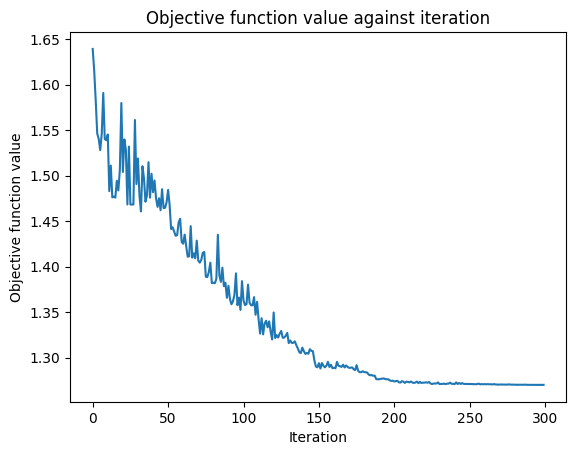

Precision:
 [0.4873737373737374, 0.8555555555555556, 0.6944444444444444, 0.5491228070175438, 0.826851851851852, 0.8186693480811128, 0.6424501424501423, 0.7745098039215687, 0.7877018043684711, 0.654040404040404]
Accuracy:
 [0.4722222222222222, 0.8055555555555556, 0.7222222222222222, 0.5, 0.7777777777777778, 0.8055555555555556, 0.4444444444444444, 0.6944444444444444, 0.7777777777777778, 0.6388888888888888]
Recall:
 [0.4583333333333333, 0.8154761904761906, 0.6547619047619048, 0.48214285714285715, 0.7559523809523809, 0.7797619047619048, 0.4523809523809524, 0.7023809523809524, 0.7380952380952381, 0.6547619047619048]
F1:
 [0.47573099415204684, 0.8085623854739298, 0.6962962962962963, 0.49494949494949503, 0.7801898537192655, 0.8054844398930421, 0.40410052910052907, 0.6936678614097969, 0.7695967869578981, 0.6392397660818714]
Time:
 [310.9451904296875, 286.82136702537537, 286.9935507774353, 282.68440532684326, 244.71298694610596, 240.403311252594, 243.64806938171387, 340.92189621925354, 258.1985

In [5]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

  rf = RandomForestClassifier(random_state=42)

  rf.fit(X_train, Y_train)

  feature_importances = rf.feature_importances_

  least_important_index = np.argmin(feature_importances)

  X_train = np.delete(X_train, least_important_index, axis=1)

  X_test = np.delete(X_test, least_important_index, axis=1)


  MAXITR = 300
  num_qubits = X.shape[1] //2
  opt = COBYLA(maxiter=MAXITR)

  featuremap = EfficientSU2(num_qubits=num_qubits, reps=0, parameter_prefix='x')
  ansatz = PauliTwoDesign(num_qubits=num_qubits, reps=4)




  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)

  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recall:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)
    
  t = np.mean(times)
  t_std = np.std(times)
  p = np.mean(precisions)
  p_std = np.std(precisions)
  a = np.mean(accuracies)
  a_std = np.std(accuracies)
  f = np.mean(f1s)
  f_std = np.std(f1s)
  r = np.mean(recall)
  r_std = np.std(recall)
  
  print(f"Mean Precision: {p}±{p_std}")
  print(f"Mean Accuracy: {a}±{a_std}")
  print(f"Mean Recall: {r}±{r_std}")
  print(f"Mean F1: {f}±{f_std}")
  print(f"Mean Time: {t}±{t_std}")
#   0.6494047619047619±0.13036801433249545
  

Precision:
 [0.4873737373737374, 0.8555555555555556, 0.6944444444444444, 0.5491228070175438, 0.826851851851852, 0.8186693480811128, 0.6424501424501423, 0.7745098039215687, 0.7877018043684711, 0.654040404040404]
Accuracy:
 [0.4722222222222222, 0.8055555555555556, 0.7222222222222222, 0.5, 0.7777777777777778, 0.8055555555555556, 0.4444444444444444, 0.6944444444444444, 0.7777777777777778, 0.6388888888888888]
Recall:
 [0.4583333333333333, 0.8154761904761906, 0.6547619047619048, 0.48214285714285715, 0.7559523809523809, 0.7797619047619048, 0.4523809523809524, 0.7023809523809524, 0.7380952380952381, 0.6547619047619048]
F1:
 [0.47573099415204684, 0.8085623854739298, 0.6962962962962963, 0.49494949494949503, 0.7801898537192655, 0.8054844398930421, 0.40410052910052907, 0.6936678614097969, 0.7695967869578981, 0.6392397660818714]
Time:
 [310.9451904296875, 286.82136702537537, 286.9935507774353, 282.68440532684326, 244.71298694610596, 240.403311252594, 243.64806938171387, 340.92189621925354, 258.1985716819763, 259.1960277557373]
Mean Precision: 0.7090719899104833±0.11841479400817365
Mean Accuracy: 0.663888888888889±0.1352010391515329
Mean Recall: 0.6494047619047619±0.13036801433249545
Mean F1: 0.6567818408034171±0.1411216510888484
Mean Time: 275.4525376796722±30.996090711908572


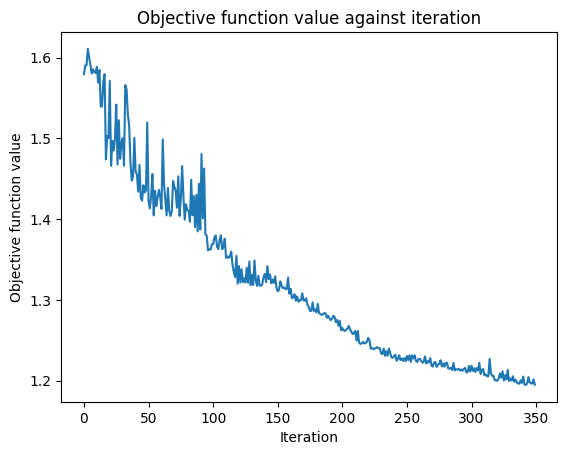

Precision:
 [0.7973856209150326, 0.7359997029114677, 0.6944444444444444, 0.8251633986928104, 0.7225981620718461, 0.7474747474747474, 0.7819548872180451, 0.715964590964591, 0.9035947712418301, 0.7160493827160495]
Accuracy:
 [0.6944444444444444, 0.6944444444444444, 0.6944444444444444, 0.8055555555555556, 0.6944444444444444, 0.6666666666666666, 0.75, 0.7222222222222222, 0.8888888888888888, 0.7222222222222222]
Recall:
 [0.7202380952380952, 0.7023809523809524, 0.6666666666666666, 0.7797619047619048, 0.6666666666666666, 0.6428571428571429, 0.7142857142857143, 0.6726190476190476, 0.8511904761904763, 0.6726190476190476]
F1:
 [0.6722573785392121, 0.6889008934849341, 0.6914529914529914, 0.8072759856630825, 0.693013468013468, 0.6469135802469137, 0.7489898989898989, 0.7168724279835391, 0.8833057623380204, 0.7103556166056166]
Time:
 [291.8150827884674, 291.4666335582733, 285.8222997188568, 289.4686734676361, 287.2384445667267, 286.18021941185, 287.8917832374573, 282.3080711364746, 288.9153513908386

In [12]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

  rf = RandomForestClassifier(random_state=42)

  rf.fit(X_train, Y_train)

  feature_importances = rf.feature_importances_

  least_important_index = np.argmin(feature_importances)

  X_train = np.delete(X_train, least_important_index, axis=1)

  X_test = np.delete(X_test, least_important_index, axis=1)


  MAXITR = 350
  num_qubits = X.shape[1] //2
  opt = COBYLA(maxiter=MAXITR)

  featuremap = EfficientSU2(num_qubits=num_qubits, reps=0, parameter_prefix='x')
  ansatz = PauliTwoDesign(num_qubits=num_qubits, reps=5)




  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)

  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recall:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)

In [13]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

  rf = RandomForestClassifier(random_state=42)

  rf.fit(X_train, Y_train)

  feature_importances = rf.feature_importances_

  least_important_index = np.argmin(feature_importances)

  X_train = np.delete(X_train, least_important_index, axis=1)

  X_test = np.delete(X_test, least_important_index, axis=1)


  MAXITR = 400
  num_qubits = X.shape[1] //2
  opt = COBYLA(maxiter=MAXITR)

  featuremap = EfficientSU2(num_qubits=num_qubits, reps=0, parameter_prefix='x')
  ansatz = PauliTwoDesign(num_qubits=num_qubits, reps=6)




  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)

  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recall:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)

Precision:
 [0.8530092592592592, 0.7476851851851851, 0.7203703703703703, 0.7543209876543211, 0.8696581196581197, 0.8003411306042884, 0.7388888888888889, 0.8080808080808081, 0.6743827160493827, 0.8888888888888888]
Accuracy:
 [0.8333333333333334, 0.6666666666666666, 0.6944444444444444, 0.7222222222222222, 0.8055555555555556, 0.7777777777777778, 0.6944444444444444, 0.7777777777777778, 0.6666666666666666, 0.7777777777777778]
Recall:
 [0.8214285714285715, 0.6071428571428572, 0.6666666666666666, 0.7261904761904763, 0.8154761904761906, 0.7380952380952381, 0.7023809523809524, 0.7738095238095237, 0.6607142857142857, 0.8095238095238094]
F1:
 [0.8361220043572986, 0.6512377782400666, 0.6944444444444444, 0.7256944444444444, 0.813607085346216, 0.7722092722092723, 0.7027777777777778, 0.784795321637427, 0.6681489571956104, 0.7899507899507898]
Time:
 [425.8837139606476, 391.8051743507385, 374.477463722229, 365.9558696746826, 371.15120100975037, 373.22020411491394, 364.51360034942627, 362.5329577922821,

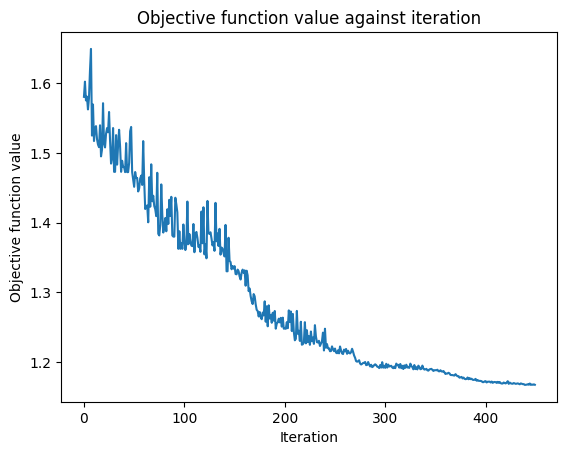

Precision:
 [0.8509259259259259, 0.8194444444444444, 0.7816323110440757, 0.7599206349206349, 0.7929292929292928, 0.8748473748473748, 0.8404558404558404, 0.7046296296296296, 0.7037037037037037, 0.8055555555555556]
Accuracy:
 [0.8333333333333334, 0.7777777777777778, 0.7777777777777778, 0.6388888888888888, 0.7777777777777778, 0.8055555555555556, 0.8333333333333334, 0.6666666666666666, 0.6944444444444444, 0.8055555555555556]
Recall:
 [0.8214285714285715, 0.7380952380952381, 0.7380952380952381, 0.6369047619047619, 0.7916666666666666, 0.8333333333333334, 0.8214285714285715, 0.625, 0.6488095238095238, 0.7976190476190476]
F1:
 [0.8383190883190883, 0.7763599798893916, 0.7737384081470103, 0.6454545454545455, 0.7770760233918129, 0.8116430000487972, 0.8358750907770516, 0.6618903971845148, 0.6805555555555556, 0.8055555555555556]
Time:
 [448.6117811203003, 442.46518993377686, 444.12880873680115, 466.6053419113159, 482.84297490119934, 438.67194390296936, 435.9818835258484, 434.1343607902527, 435.5958

In [14]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

  rf = RandomForestClassifier(random_state=42)

  rf.fit(X_train, Y_train)

  feature_importances = rf.feature_importances_

  least_important_index = np.argmin(feature_importances)

  X_train = np.delete(X_train, least_important_index, axis=1)

  X_test = np.delete(X_test, least_important_index, axis=1)


  MAXITR = 450
  num_qubits = X.shape[1] //2
  opt = COBYLA(maxiter=MAXITR)

  featuremap = EfficientSU2(num_qubits=num_qubits, reps=0, parameter_prefix='x')
  ansatz = PauliTwoDesign(num_qubits=num_qubits, reps=7)




  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)

  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recall:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)

# **EfficientSU2+Hadamard/PauliTwoDesign**

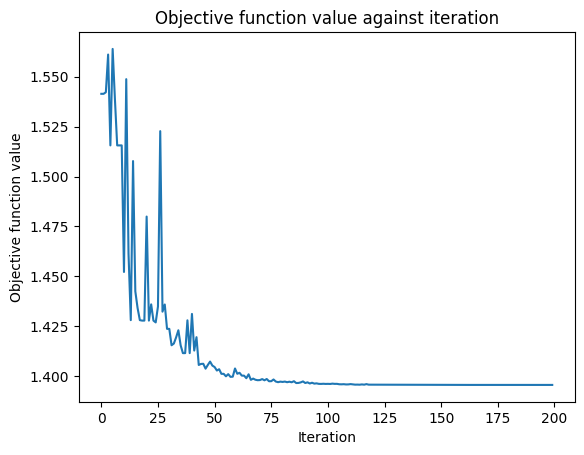

Precision:
 [0.7952798663324979, 0.6494949494949496, 0.7048732943469784, 0.5649405061169768, 0.6226216412490923, 0.7623456790123457, 0.7354808590102707, 0.6027777777777777, 0.7342592592592593, 0.7532163742690059]
Accuracy:
 [0.7777777777777778, 0.6388888888888888, 0.6666666666666666, 0.5833333333333334, 0.6111111111111112, 0.7222222222222222, 0.6944444444444444, 0.5833333333333334, 0.6944444444444444, 0.7222222222222222]
Recall:
 [0.7559523809523809, 0.6547619047619048, 0.7142857142857143, 0.5178571428571429, 0.5952380952380952, 0.7619047619047619, 0.7380952380952381, 0.5714285714285715, 0.7023809523809524, 0.7261904761904763]
F1:
 [0.7697811447811447, 0.6384163473818646, 0.6243487506645402, 0.5707079327151012, 0.607412678332982, 0.6924836601307189, 0.6515237262266125, 0.5902184235517569, 0.6764705882352942, 0.7003367003367003]
Time:
 [132.91048955917358, 146.88607096672058, 158.4295723438263, 121.74146223068237, 122.8683397769928, 116.28125166893005, 123.24391031265259, 120.3784265518

In [11]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

  rf = RandomForestClassifier(random_state=42)

  rf.fit(X_train, Y_train)

  feature_importances = rf.feature_importances_

  least_important_index = np.argmin(feature_importances)

  X_train = np.delete(X_train, least_important_index, axis=1)

  X_test = np.delete(X_test, least_important_index, axis=1)


  MAXITR = 200
  num_qubits = X.shape[1] //2
  opt = COBYLA(maxiter=MAXITR)

  featuremap = EfficientSU2(num_qubits=num_qubits, reps=0, parameter_prefix='x',
                            su2_gates=['h', 'rz', 'ry'])
  ansatz = PauliTwoDesign(num_qubits=num_qubits, reps=1)




  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)

  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recall:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)
    
  t = np.mean(times)
  t_std = np.std(times)
  p = np.mean(precisions)
  p_std = np.std(precisions)
  a = np.mean(accuracies)
  a_std = np.std(accuracies)
  f = np.mean(f1s)
  f_std = np.std(f1s)
  r = np.mean(recalls)
  r_std = np.std(recalls)
  
  print(f"Mean Precision: {p}±{p_std}")
  print(f"Mean Accuracy: {a}±{a_std}")
  print(f"Mean Recall: {r}±{r_std}")
  print(f"Mean F1: {f}±{f_std}")
  print(f"Mean Time: {t}±{t_std}")
  
  

Precision:
 [0.7952798663324979, 0.6494949494949496, 0.7048732943469784, 0.5649405061169768, 0.6226216412490923, 0.7623456790123457, 0.7354808590102707, 0.6027777777777777, 0.7342592592592593, 0.7532163742690059]
Accuracy:
 [0.7777777777777778, 0.6388888888888888, 0.6666666666666666, 0.5833333333333334, 0.6111111111111112, 0.7222222222222222, 0.6944444444444444, 0.5833333333333334, 0.6944444444444444, 0.7222222222222222]
Recall:
 [0.7559523809523809, 0.6547619047619048, 0.7142857142857143, 0.5178571428571429, 0.5952380952380952, 0.7619047619047619, 0.7380952380952381, 0.5714285714285715, 0.7023809523809524, 0.7261904761904763]
F1:
 [0.7697811447811447, 0.6384163473818646, 0.6243487506645402, 0.5707079327151012, 0.607412678332982, 0.6924836601307189, 0.6515237262266125, 0.5902184235517569, 0.6764705882352942, 0.7003367003367003]
Time:
 [132.91048955917358, 146.88607096672058, 158.4295723438263, 121.74146223068237, 122.8683397769928, 116.28125166893005, 123.24391031265259, 120.37842655181885, 111.7572271823883, 109.1425428390503]
Mean Precision: 0.6925290206869155±0.07343486835378833
Mean Accuracy: 0.6694444444444445±0.061425956631933266
Mean Recall: 0.6738095238095239±0.0807332468246951
Mean F1: 0.6521699952356717±0.056399475882357455
Mean Time: 126.36392934322357±14.774845548371406


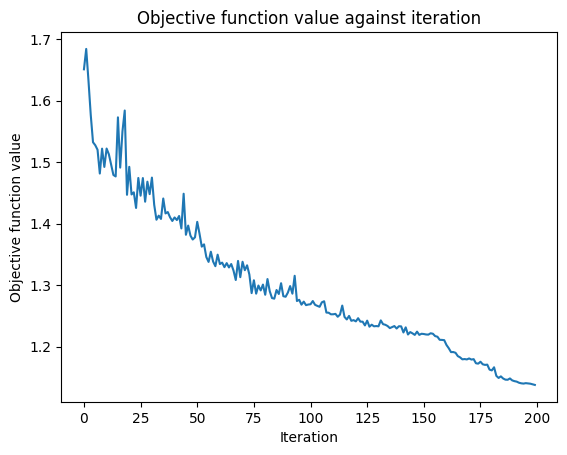

Precision:
 [0.8505644682115271, 0.5243055555555556, 0.7725546058879392, 0.75, 0.8183421516754851, 0.6913250148544265, 0.5626543209876543, 0.7333333333333333, 0.7527777777777778, 0.9266975308641976]
Accuracy:
 [0.8055555555555556, 0.5277777777777778, 0.75, 0.75, 0.7222222222222222, 0.6944444444444444, 0.5555555555555556, 0.7222222222222222, 0.75, 0.9166666666666666]
Recall:
 [0.8154761904761904, 0.5773809523809524, 0.7857142857142857, 0.7142857142857143, 0.7619047619047619, 0.6666666666666666, 0.49404761904761907, 0.6726190476190476, 0.7678571428571429, 0.9285714285714285]
F1:
 [0.7978254531735007, 0.4914141414141414, 0.7393604784909132, 0.75, 0.6747334455667789, 0.6861648745519714, 0.5573845807111527, 0.7071661998132587, 0.7476258309591644, 0.9143355119825708]
Time:
 [153.57791543006897, 157.3321602344513, 159.98757576942444, 156.56374526023865, 161.44642782211304, 150.79829359054565, 122.01098680496216, 121.07957005500793, 145.01763200759888, 158.1568431854248]
Mean Precision: 0.7382

In [5]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

  rf = RandomForestClassifier(random_state=42)

  rf.fit(X_train, Y_train)

  feature_importances = rf.feature_importances_

  least_important_index = np.argmin(feature_importances)

  X_train = np.delete(X_train, least_important_index, axis=1)

  X_test = np.delete(X_test, least_important_index, axis=1)


  MAXITR = 200
  num_qubits = X.shape[1] //2
  opt = COBYLA(maxiter=MAXITR)

  featuremap = EfficientSU2(num_qubits=num_qubits, reps=0, parameter_prefix='x',
                            su2_gates=['h', 'rz', 'ry'])
  ansatz = PauliTwoDesign(num_qubits=num_qubits, reps=2)




  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)

  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recall:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)
    
  t = np.mean(times)
  t_std = np.std(times)
  p = np.mean(precisions)
  p_std = np.std(precisions)
  a = np.mean(accuracies)
  a_std = np.std(accuracies)
  f = np.mean(f1s)
  f_std = np.std(f1s)
  r = np.mean(recalls)
  r_std = np.std(recalls)
  
  print(f"Mean Precision: {p}±{p_std}")
  print(f"Mean Accuracy: {a}±{a_std}")
  print(f"Mean Recall: {r}±{r_std}")
  print(f"Mean F1: {f}±{f_std}")
  print(f"Mean Time: {t}±{t_std}")
  
  

Precision:
 [0.8505644682115271, 0.5243055555555556, 0.7725546058879392, 0.75, 0.8183421516754851, 0.6913250148544265, 0.5626543209876543, 0.7333333333333333, 0.7527777777777778, 0.9266975308641976]
Accuracy:
 [0.8055555555555556, 0.5277777777777778, 0.75, 0.75, 0.7222222222222222, 0.6944444444444444, 0.5555555555555556, 0.7222222222222222, 0.75, 0.9166666666666666]
Recall:
 [0.8154761904761904, 0.5773809523809524, 0.7857142857142857, 0.7142857142857143, 0.7619047619047619, 0.6666666666666666, 0.49404761904761907, 0.6726190476190476, 0.7678571428571429, 0.9285714285714285]
F1:
 [0.7978254531735007, 0.4914141414141414, 0.7393604784909132, 0.75, 0.6747334455667789, 0.6861648745519714, 0.5573845807111527, 0.7071661998132587, 0.7476258309591644, 0.9143355119825708]
Time:
 [153.57791543006897, 157.3321602344513, 159.98757576942444, 156.56374526023865, 161.44642782211304, 150.79829359054565, 122.01098680496216, 121.07957005500793, 145.01763200759888, 158.1568431854248]
Mean Precision: 0.7382554759147897±0.11614640957402117
Mean Accuracy: 0.7194444444444444±0.10646537720409333
Mean Recall: 0.718452380952381±0.1172498180862974
Mean F1: 0.7066010516663451±0.11230300143174497
Mean Time: 148.59711501598358±14.256604796647647


In [9]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

  rf = RandomForestClassifier(random_state=42)

  rf.fit(X_train, Y_train)

  feature_importances = rf.feature_importances_

  least_important_index = np.argmin(feature_importances)

  X_train = np.delete(X_train, least_important_index, axis=1)

  X_test = np.delete(X_test, least_important_index, axis=1)


  MAXITR = 300
  num_qubits = X.shape[1] //2
  opt = COBYLA(maxiter=MAXITR)

  featuremap = EfficientSU2(num_qubits=num_qubits, reps=0, parameter_prefix='x',
                            su2_gates=['h', 'rz', 'ry'])
  ansatz = PauliTwoDesign(num_qubits=num_qubits, reps=3)




  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)

  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recall:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)
    
  t = np.mean(times)
  t_std = np.std(times)
  p = np.mean(precisions)
  p_std = np.std(precisions)
  a = np.mean(accuracies)
  a_std = np.std(accuracies)
  f = np.mean(f1s)
  f_std = np.std(f1s)
  r = np.mean(recalls)
  r_std = np.std(recalls)
  
  print(f"Mean Precision: {p}±{p_std}")
  print(f"Mean Accuracy: {a}±{a_std}")
  print(f"Mean Recall: {r}±{r_std}")
  print(f"Mean F1: {f}±{f_std}")
  print(f"Mean Time: {t}±{t_std}")
  
  

Precision:
 [0.6840277777777778, 0.6666666666666665, 0.7898148148148147, 0.8383190883190883, 0.7296376463043129, 0.7090777051561364, 0.6981481481481481, 0.7845117845117844, 0.8395061728395061, 0.7615740740740741]
Accuracy:
 [0.6944444444444444, 0.6666666666666666, 0.7777777777777778, 0.8333333333333334, 0.7222222222222222, 0.6666666666666666, 0.6944444444444444, 0.6944444444444444, 0.7777777777777778, 0.7222222222222222]
Recall:
 [0.6488095238095238, 0.6428571428571429, 0.7916666666666666, 0.8214285714285715, 0.6726190476190476, 0.6428571428571428, 0.7023809523809524, 0.7023809523809524, 0.8095238095238096, 0.7440476190476191]
F1:
 [0.6859788359788359, 0.6633825944170773, 0.7796771130104463, 0.8348462841926894, 0.7159722222222222, 0.6703721018821533, 0.6623093681917211, 0.6640102434736078, 0.751388888888889, 0.7141414141414142]
Time:
 [267.1950480937958, 222.5836329460144, 216.9746458530426, 268.01633381843567, 266.88213992118835, 268.8884813785553, 259.72458696365356, 272.024156570434

Precision:
 [0.6840277777777778, 0.6666666666666665, 0.7898148148148147, 0.8383190883190883, 0.7296376463043129, 0.7090777051561364, 0.6981481481481481, 0.7845117845117844, 0.8395061728395061, 0.7615740740740741]
Accuracy:
 [0.6944444444444444, 0.6666666666666666, 0.7777777777777778, 0.8333333333333334, 0.7222222222222222, 0.6666666666666666, 0.6944444444444444, 0.6944444444444444, 0.7777777777777778, 0.7222222222222222]
Recall:
 [0.6488095238095238, 0.6428571428571429, 0.7916666666666666, 0.8214285714285715, 0.6726190476190476, 0.6428571428571428, 0.7023809523809524, 0.7023809523809524, 0.8095238095238096, 0.7440476190476191]
F1:
 [0.6859788359788359, 0.6633825944170773, 0.7796771130104463, 0.8348462841926894, 0.7159722222222222, 0.6703721018821533, 0.6623093681917211, 0.6640102434736078, 0.751388888888889, 0.7141414141414142]
Time:
 [267.1950480937958, 222.5836329460144, 216.9746458530426, 268.01633381843567, 266.88213992118835, 268.8884813785553, 259.72458696365356, 272.02415657043457, 267.1134488582611, 268.3828241825104]
Mean Precision: 0.750128387861231±0.0589884278449806
Mean Accuracy: 0.725±0.05189317136741503
Mean Recall: 0.7178571428571429±0.06618662201865545
Mean F1: 0.7142079066399056±0.0554439465092378
Mean Time: 257.7785298585892±19.26069752806254


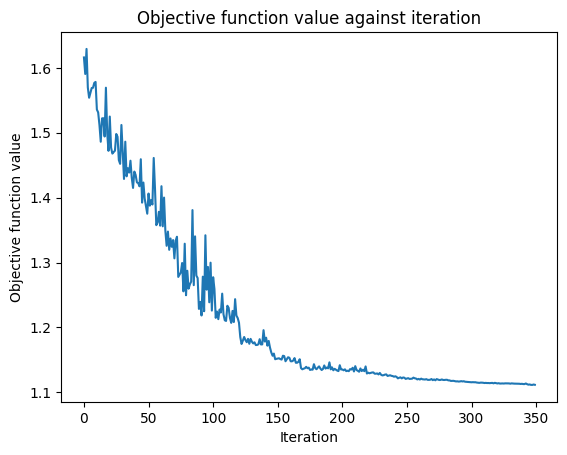

Precision:
 [0.8217592592592592, 0.7473344556677889, 0.7396534792368126, 0.9313725490196079, 0.7106481481481481, 0.623526936026936, 0.7962962962962963, 0.6945006747638327, 0.8836657169990504, 0.8703703703703703]
Accuracy:
 [0.8333333333333334, 0.75, 0.7222222222222222, 0.9166666666666666, 0.6666666666666666, 0.6111111111111112, 0.8055555555555556, 0.6666666666666666, 0.8611111111111112, 0.8611111111111112]
Recall:
 [0.7857142857142857, 0.7678571428571428, 0.7261904761904763, 0.9285714285714285, 0.6607142857142857, 0.6309523809523809, 0.7619047619047619, 0.7142857142857143, 0.8273809523809524, 0.8452380952380952]
F1:
 [0.8232804232804233, 0.7430065359477125, 0.7141028900754302, 0.9156989247311829, 0.6625982042648708, 0.6025086871768794, 0.7974822112753148, 0.6053391053391053, 0.8568969610636278, 0.8646816751391915]
Time:
 [318.6452844142914, 340.1071858406067, 340.5982930660248, 340.4044072628021, 341.7045660018921, 338.55357551574707, 338.40043234825134, 281.3568699359894, 308.76106929

In [5]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

  rf = RandomForestClassifier(random_state=42)

  rf.fit(X_train, Y_train)

  feature_importances = rf.feature_importances_

  least_important_index = np.argmin(feature_importances)

  X_train = np.delete(X_train, least_important_index, axis=1)

  X_test = np.delete(X_test, least_important_index, axis=1)


  MAXITR = 350
  num_qubits = X.shape[1] //2
  opt = COBYLA(maxiter=MAXITR)

  featuremap = EfficientSU2(num_qubits=num_qubits, reps=0, parameter_prefix='x',
                            su2_gates=['h', 'rz', 'ry'])
  ansatz = PauliTwoDesign(num_qubits=num_qubits, reps=4)




  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)

  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recall:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)
    
  t = np.mean(times)
  t_std = np.std(times)
  p = np.mean(precisions)
  p_std = np.std(precisions)
  a = np.mean(accuracies)
  a_std = np.std(accuracies)
  f = np.mean(f1s)
  f_std = np.std(f1s)
  r = np.mean(recalls)
  r_std = np.std(recalls)
  
  print(f"Mean Precision: {p}±{p_std}")
  print(f"Mean Accuracy: {a}±{a_std}")
  print(f"Mean Recall: {r}±{r_std}")
  print(f"Mean F1: {f}±{f_std}")
  print(f"Mean Time: {t}±{t_std}")
  
  

Precision:
 [0.8217592592592592, 0.7473344556677889, 0.7396534792368126, 0.9313725490196079, 0.7106481481481481, 0.623526936026936, 0.7962962962962963, 0.6945006747638327, 0.8836657169990504, 0.8703703703703703]
Accuracy:
 [0.8333333333333334, 0.75, 0.7222222222222222, 0.9166666666666666, 0.6666666666666666, 0.6111111111111112, 0.8055555555555556, 0.6666666666666666, 0.8611111111111112, 0.8611111111111112]
Recall:
 [0.7857142857142857, 0.7678571428571428, 0.7261904761904763, 0.9285714285714285, 0.6607142857142857, 0.6309523809523809, 0.7619047619047619, 0.7142857142857143, 0.8273809523809524, 0.8452380952380952]
F1:
 [0.8232804232804233, 0.7430065359477125, 0.7141028900754302, 0.9156989247311829, 0.6625982042648708, 0.6025086871768794, 0.7974822112753148, 0.6053391053391053, 0.8568969610636278, 0.8646816751391915]
Time:
 [318.6452844142914, 340.1071858406067, 340.5982930660248, 340.4044072628021, 341.7045660018921, 338.55357551574707, 338.40043234825134, 281.3568699359894, 308.7610692977905, 339.0408425331116]
Mean Precision: 0.7819127885788102±0.09115830404759558
Mean Accuracy: 0.7694444444444445±0.09626513028424144
Mean Recall: 0.7648809523809523±0.08393701409748207
Mean F1: 0.7585595618293739±0.10515890220593477
Mean Time: 328.7572526216507±19.015590877299516


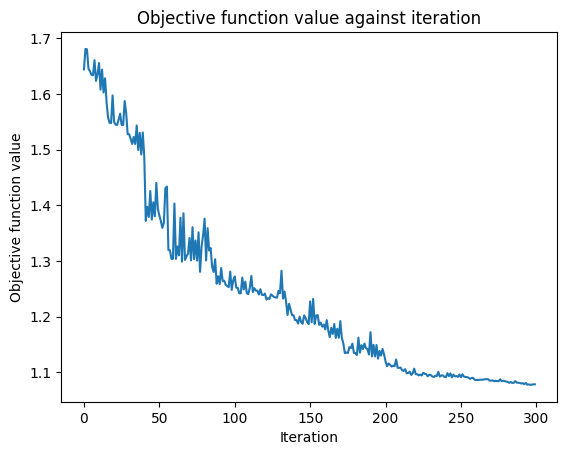

Precision:
 [0.6994301994301995, 0.7349537037037037, 0.7474658869395712, 0.75, 0.8232673961840629, 0.8651234567901234, 0.880718954248366, 0.8630104463437797, 0.8833333333333333, 0.8566448801742919]
Accuracy:
 [0.6666666666666666, 0.7222222222222222, 0.7222222222222222, 0.75, 0.8055555555555556, 0.8611111111111112, 0.8611111111111112, 0.8611111111111112, 0.8333333333333334, 0.8333333333333334]
Recall:
 [0.6964285714285715, 0.6904761904761904, 0.6904761904761904, 0.7321428571428571, 0.8333333333333334, 0.8809523809523809, 0.8630952380952381, 0.8630952380952381, 0.8392857142857143, 0.7857142857142857]
F1:
 [0.6611851201223181, 0.7253561253561254, 0.7187257187257187, 0.75, 0.7947029409271972, 0.8600492363169848, 0.862831541218638, 0.8609900750423626, 0.8320166714028606, 0.8229720265315371]
Time:
 [295.84234976768494, 252.55855512619019, 230.34353637695312, 227.93075323104858, 228.70280241966248, 229.66438007354736, 243.813631772995, 295.45525646209717, 296.41388273239136, 284.9821321964264

In [10]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

  rf = RandomForestClassifier(random_state=42)

  rf.fit(X_train, Y_train)

  feature_importances = rf.feature_importances_

  least_important_index = np.argmin(feature_importances)

  X_train = np.delete(X_train, least_important_index, axis=1)

  X_test = np.delete(X_test, least_important_index, axis=1)


  MAXITR = 300
  num_qubits = X.shape[1] //2
  opt = COBYLA(maxiter=MAXITR)

  featuremap = EfficientSU2(num_qubits=num_qubits, reps=0, parameter_prefix='x',
                            su2_gates=['h', 'rz', 'ry'])
  ansatz = PauliTwoDesign(num_qubits=num_qubits, reps=4)




  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)

  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recall:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)
    
  t = np.mean(times)
  t_std = np.std(times)
  p = np.mean(precisions)
  p_std = np.std(precisions)
  a = np.mean(accuracies)
  a_std = np.std(accuracies)
  f = np.mean(f1s)
  f_std = np.std(f1s)
  r = np.mean(recalls)
  r_std = np.std(recalls)
  
  print(f"Mean Precision: {p}±{p_std}")
  print(f"Mean Accuracy: {a}±{a_std}")
  print(f"Mean Recall: {r}±{r_std}")
  print(f"Mean F1: {f}±{f_std}")
  print(f"Mean Time: {t}±{t_std}")
  
  

Precision:
 [0.6994301994301995, 0.7349537037037037, 0.7474658869395712, 0.75, 0.8232673961840629, 0.8651234567901234, 0.880718954248366, 0.8630104463437797, 0.8833333333333333, 0.8566448801742919]
Accuracy:
 [0.6666666666666666, 0.7222222222222222, 0.7222222222222222, 0.75, 0.8055555555555556, 0.8611111111111112, 0.8611111111111112, 0.8611111111111112, 0.8333333333333334, 0.8333333333333334]
Recall:
 [0.6964285714285715, 0.6904761904761904, 0.6904761904761904, 0.7321428571428571, 0.8333333333333334, 0.8809523809523809, 0.8630952380952381, 0.8630952380952381, 0.8392857142857143, 0.7857142857142857]
F1:
 [0.6611851201223181, 0.7253561253561254, 0.7187257187257187, 0.75, 0.7947029409271972, 0.8600492363169848, 0.862831541218638, 0.8609900750423626, 0.8320166714028606, 0.8229720265315371]
Time:
 [295.84234976768494, 252.55855512619019, 230.34353637695312, 227.93075323104858, 228.70280241966248, 229.66438007354736, 243.813631772995, 295.45525646209717, 296.41388273239136, 284.9821321964264]
Mean Precision: 0.8103948257147431±0.06629178202042826
Mean Accuracy: 0.7916666666666666±0.06718548123582127
Mean Recall: 0.7875±0.0742522245938993
Mean F1: 0.7888829455643742±0.06750203063171561
Mean Time: 258.57072801589965±29.319753242810396


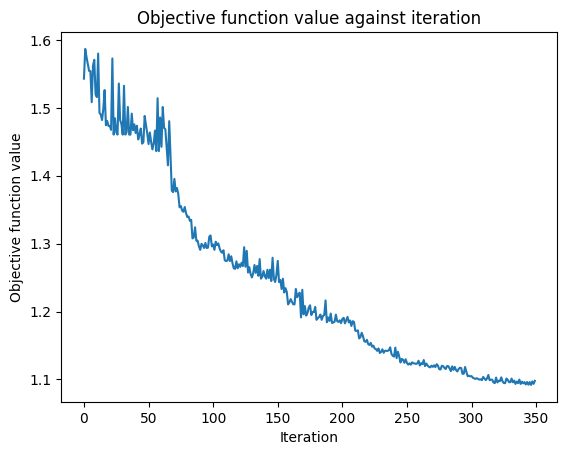

Precision:
 [0.8073793490460157, 0.8469135802469135, 0.8068376068376069, 0.8707664884135473, 0.8543771043771042, 0.9513888888888888, 0.9066811909949166, 0.8912037037037036, 0.7791666666666666, 0.8205128205128206]
Accuracy:
 [0.8055555555555556, 0.8055555555555556, 0.7777777777777778, 0.8333333333333334, 0.8333333333333334, 0.9444444444444444, 0.8888888888888888, 0.8888888888888888, 0.75, 0.75]
Recall:
 [0.8333333333333334, 0.8154761904761904, 0.8095238095238094, 0.8571428571428571, 0.8392857142857143, 0.9345238095238096, 0.9047619047619048, 0.8869047619047619, 0.75, 0.75]
F1:
 [0.8002614379084968, 0.7959455667789002, 0.7742504409171076, 0.8212172660389978, 0.8308882839282113, 0.9448559670781894, 0.8844788811581981, 0.8864672364672365, 0.7344028520499108, 0.7679306290417401]
Time:
 [387.92906522750854, 398.26184368133545, 364.6199893951416, 302.97472310066223, 307.9990499019623, 307.0473687648773, 311.2823660373688, 302.27078127861023, 292.3864016532898, 300.70504426956177]
Mean Precisi

In [15]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

  rf = RandomForestClassifier(random_state=42)

  rf.fit(X_train, Y_train)

  feature_importances = rf.feature_importances_

  least_important_index = np.argmin(feature_importances)

  X_train = np.delete(X_train, least_important_index, axis=1)

  X_test = np.delete(X_test, least_important_index, axis=1)


  MAXITR = 350
  num_qubits = X.shape[1] //2
  opt = COBYLA(maxiter=MAXITR)

  featuremap = EfficientSU2(num_qubits=num_qubits, reps=0, parameter_prefix='x',
                            su2_gates=['h', 'rz', 'ry'])
  ansatz = PauliTwoDesign(num_qubits=num_qubits, reps=5)




  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)

  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recall:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)
    
  t = np.mean(times)
  t_std = np.std(times)
  p = np.mean(precisions)
  p_std = np.std(precisions)
  a = np.mean(accuracies)
  a_std = np.std(accuracies)
  f = np.mean(f1s)
  f_std = np.std(f1s)
  r = np.mean(recalls)
  r_std = np.std(recalls)
  
  print(f"Mean Precision: {p}±{p_std}")
  print(f"Mean Accuracy: {a}±{a_std}")
  print(f"Mean Recall: {r}±{r_std}")
  print(f"Mean F1: {f}±{f_std}")
  print(f"Mean Time: {t}±{t_std}")
  
  

In [16]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

  rf = RandomForestClassifier(random_state=42)

  rf.fit(X_train, Y_train)

  feature_importances = rf.feature_importances_

  least_important_index = np.argmin(feature_importances)

  X_train = np.delete(X_train, least_important_index, axis=1)

  X_test = np.delete(X_test, least_important_index, axis=1)


  MAXITR = 450
  num_qubits = X.shape[1] //2
  opt = COBYLA(maxiter=MAXITR)

  featuremap = EfficientSU2(num_qubits=num_qubits, reps=0, parameter_prefix='x',
                            su2_gates=['h', 'rz', 'ry'])
  ansatz = PauliTwoDesign(num_qubits=num_qubits, reps=6)




  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)

  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recall:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)
    
  t = np.mean(times)
  t_std = np.std(times)
  p = np.mean(precisions)
  p_std = np.std(precisions)
  a = np.mean(accuracies)
  a_std = np.std(accuracies)
  f = np.mean(f1s)
  f_std = np.std(f1s)
  r = np.mean(recalls)
  r_std = np.std(recalls)
  
  print(f"Mean Precision: {p}±{p_std}")
  print(f"Mean Accuracy: {a}±{a_std}")
  print(f"Mean Recall: {r}±{r_std}")
  print(f"Mean F1: {f}±{f_std}")
  print(f"Mean Time: {t}±{t_std}")
  
  

Precision:
 [0.8493055555555556, 0.8202251270878721, 0.9246913580246914, 0.8910493827160493, 0.8049382716049382, 0.9020061728395061, 0.7255680049797698, 0.7796771130104463, 0.8905723905723906, 0.8811728395061729]
Accuracy:
 [0.8333333333333334, 0.8055555555555556, 0.9166666666666666, 0.8888888888888888, 0.7777777777777778, 0.8888888888888888, 0.7222222222222222, 0.7777777777777778, 0.8611111111111112, 0.8611111111111112]
Recall:
 [0.8035714285714285, 0.8154761904761906, 0.9107142857142857, 0.9047619047619048, 0.8095238095238094, 0.8869047619047619, 0.6904761904761904, 0.7916666666666666, 0.8809523809523809, 0.8452380952380952]
F1:
 [0.8298162884369781, 0.8008380771663505, 0.9174598221251364, 0.8868691596886323, 0.7701482592037316, 0.8881917211328977, 0.7187390864810219, 0.7776567417090292, 0.8633744855967078, 0.8598137973137974]
Time:
 [465.6434268951416, 420.70376920700073, 475.20201110839844, 512.5834565162659, 477.9629080295563, 450.8898055553436, 455.5516219139099, 438.391261816024

In [17]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

  rf = RandomForestClassifier(random_state=42)

  rf.fit(X_train, Y_train)

  feature_importances = rf.feature_importances_

  least_important_index = np.argmin(feature_importances)

  X_train = np.delete(X_train, least_important_index, axis=1)

  X_test = np.delete(X_test, least_important_index, axis=1)


  MAXITR = 450
  num_qubits = X.shape[1] //2
  opt = COBYLA(maxiter=MAXITR)

  featuremap = EfficientSU2(num_qubits=num_qubits, reps=0, parameter_prefix='x',
                            su2_gates=['h', 'rz', 'ry'])
  ansatz = PauliTwoDesign(num_qubits=num_qubits, reps=7)




  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)

  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recall:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)
    
  t = np.mean(times)
  t_std = np.std(times)
  p = np.mean(precisions)
  p_std = np.std(precisions)
  a = np.mean(accuracies)
  a_std = np.std(accuracies)
  f = np.mean(f1s)
  f_std = np.std(f1s)
  r = np.mean(recalls)
  r_std = np.std(recalls)
  
  print(f"Mean Precision: {p}±{p_std}")
  print(f"Mean Accuracy: {a}±{a_std}")
  print(f"Mean Recall: {r}±{r_std}")
  print(f"Mean F1: {f}±{f_std}")
  print(f"Mean Time: {t}±{t_std}")
  
  

Precision:
 [0.8847222222222223, 0.8910493827160493, 0.9555555555555555, 0.8682412358882947, 0.778395061728395, 0.8561507936507936, 0.8092592592592592, 0.9246913580246914, 0.8586894586894587, 0.7233115468409586]
Accuracy:
 [0.8611111111111112, 0.8888888888888888, 0.9444444444444444, 0.8611111111111112, 0.75, 0.7777777777777778, 0.8055555555555556, 0.9166666666666666, 0.8611111111111112, 0.7222222222222222]
Recall:
 [0.8630952380952381, 0.9047619047619048, 0.9523809523809524, 0.8630952380952381, 0.7678571428571429, 0.8095238095238096, 0.7976190476190476, 0.9107142857142857, 0.8452380952380952, 0.6726190476190476]
F1:
 [0.8598765432098765, 0.8868691596886323, 0.9453941120607787, 0.8568100358422939, 0.7254901960784315, 0.757912457912458, 0.8046670480747561, 0.9174598221251364, 0.8590180218532709, 0.7054752193795575]
Time:
 [464.745756149292, 494.8271071910858, 480.53610396385193, 473.1980719566345, 471.0931706428528, 506.4238450527191, 478.93252825737, 499.37632608413696, 494.814240932464

In [18]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

  rf = RandomForestClassifier(random_state=42)

  rf.fit(X_train, Y_train)

  feature_importances = rf.feature_importances_

  least_important_index = np.argmin(feature_importances)

  X_train = np.delete(X_train, least_important_index, axis=1)

  X_test = np.delete(X_test, least_important_index, axis=1)


  MAXITR = 500
  num_qubits = X.shape[1] //2
  opt = COBYLA(maxiter=MAXITR)

  featuremap = EfficientSU2(num_qubits=num_qubits, reps=0, parameter_prefix='x',
                            su2_gates=['h', 'rz', 'ry'])
  ansatz = PauliTwoDesign(num_qubits=num_qubits, reps=8)




  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)

  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recall:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)
    
  t = np.mean(times)
  t_std = np.std(times)
  p = np.mean(precisions)
  p_std = np.std(precisions)
  a = np.mean(accuracies)
  a_std = np.std(accuracies)
  f = np.mean(f1s)
  f_std = np.std(f1s)
  r = np.mean(recalls)
  r_std = np.std(recalls)
  
  print(f"Mean Precision: {p}±{p_std}")
  print(f"Mean Accuracy: {a}±{a_std}")
  print(f"Mean Recall: {r}±{r_std}")
  print(f"Mean F1: {f}±{f_std}")
  print(f"Mean Time: {t}±{t_std}")
  
  

Precision:
 [0.9207027540360875, 0.8758169934640523, 0.9094794094794094, 0.9236111111111112, 0.8957264957264957, 0.9176163342830009, 0.7577160493827161, 0.9035947712418301, 0.8707664884135473, 0.8773148148148148]
Accuracy:
 [0.9166666666666666, 0.8611111111111112, 0.8888888888888888, 0.9166666666666666, 0.8888888888888888, 0.9166666666666666, 0.75, 0.8888888888888888, 0.8333333333333334, 0.8333333333333334]
Recall:
 [0.9107142857142857, 0.8452380952380952, 0.9047619047619048, 0.9107142857142857, 0.9047619047619048, 0.9285714285714285, 0.7321428571428572, 0.8869047619047619, 0.8571428571428571, 0.8571428571428571]
F1:
 [0.9175744371822803, 0.8601433691756273, 0.8917878742440146, 0.9163817663817664, 0.8888888888888888, 0.9159404502541757, 0.7439331501831502, 0.887921146953405, 0.8212172660389978, 0.8235690235690236]
Time:
 [557.0858931541443, 614.8722789287567, 684.7482612133026, 625.6533350944519, 593.7807230949402, 642.5603249073029, 587.0822083950043, 608.9248130321503, 635.3101627826

In [14]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

  rf = RandomForestClassifier(random_state=42)

  rf.fit(X_train, Y_train)

  feature_importances = rf.feature_importances_

  least_important_index = np.argmin(feature_importances)

  X_train = np.delete(X_train, least_important_index, axis=1)

  X_test = np.delete(X_test, least_important_index, axis=1)


  MAXITR = 450
  num_qubits = X.shape[1] //2
  opt = COBYLA(maxiter=MAXITR)

  featuremap = EfficientSU2(num_qubits=num_qubits, reps=0, parameter_prefix='x')
  ansatz = TwoLocal(num_qubits=num_qubits, reps=4, entanglement_blocks='cz', rotation_blocks=['rz', 'ry'])




  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)

  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recall:\n",recalls)
  print("F1:\n",f1s)

  print("Time:\n",times)
  t = np.mean(times)
  t_std = np.std(times)
  p = np.mean(precisions)
  p_std = np.std(precisions)
  a = np.mean(accuracies)
  a_std = np.std(accuracies)
  f = np.mean(f1s)
  f_std = np.std(f1s)
  r = np.mean(recall)
  r_std = np.std(recall)
  
  print(f"Mean Precision: {p}±{p_std}")
  print(f"Mean Accuracy: {a}±{a_std}")
  print(f"Mean Recall: {r}±{r_std}")
  print(f"Mean F1: {f}±{f_std}")
  print(f"Mean Time: {t}±{t_std}")

Precision:
 [0.9493827160493827, 0.8892773892773893, 0.8914141414141414, 0.947530864197531, 0.9555555555555555, 0.9145299145299144, 0.9166666666666666, 0.8291666666666667, 0.8638888888888888, 0.9266975308641976]
Accuracy:
 [0.9444444444444444, 0.8611111111111112, 0.8611111111111112, 0.9444444444444444, 0.9444444444444444, 0.8611111111111112, 0.9166666666666666, 0.8333333333333334, 0.7777777777777778, 0.9166666666666666]
Recall:
 [0.9523809523809524, 0.8630952380952381, 0.8630952380952381, 0.9523809523809524, 0.9523809523809524, 0.8809523809523809, 0.9107142857142857, 0.7857142857142857, 0.8095238095238096, 0.9285714285714285]
F1:
 [0.9436036129748098, 0.8683960613785175, 0.8670760233918129, 0.9447470346163157, 0.9465020576131687, 0.8705087505087504, 0.9166666666666666, 0.8215541801748699, 0.787997027127462, 0.9143355119825708]
Time:
 [666.6612904071808, 588.3510189056396, 626.605432510376, 590.4763293266296, 675.2415788173676, 532.7470421791077, 525.8391454219818, 573.6900808811188, 52

In [9]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

  rf = RandomForestClassifier(random_state=42)

  rf.fit(X_train, Y_train)

  feature_importances = rf.feature_importances_

  least_important_index = np.argmin(feature_importances)

  X_train = np.delete(X_train, least_important_index, axis=1)

  X_test = np.delete(X_test, least_important_index, axis=1)


  MAXITR = 500
  num_qubits = X.shape[1] //2
  opt = COBYLA(maxiter=MAXITR)

  featuremap = EfficientSU2(num_qubits=num_qubits, reps=0, parameter_prefix='x', 
                            su2_gates=['h', 'ry','rz'] )
  ansatz = TwoLocal(num_qubits=num_qubits, reps=3, entanglement_blocks='cz', rotation_blocks=['rz', 'ry'])




  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)

  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recall:\n",recalls)
  print("F1:\n",f1s)

  print("Time:\n",times)
  t = np.mean(times)
  t_std = np.std(times)
  p = np.mean(precisions)
  p_std = np.std(precisions)
  a = np.mean(accuracies)
  a_std = np.std(accuracies)
  f = np.mean(f1s)
  f_std = np.std(f1s)
  r = np.mean(recalls)
  r_std = np.std(recalls)
  
  print(f"Mean Precision: {p}±{p_std}")
  print(f"Mean Accuracy: {a}±{a_std}")
  print(f"Mean Recall: {r}±{r_std}")
  print(f"Mean F1: {f}±{f_std}")
  print(f"Mean Time: {t}±{t_std}")

Precision:
 [0.9266975308641976, 0.974074074074074, 0.9116161616161617, 0.974074074074074, 0.8663580246913579, 0.9493827160493827, 0.9493827160493827, 0.8435897435897436, 0.974074074074074, 0.8953703703703704]
Accuracy:
 [0.9166666666666666, 0.9722222222222222, 0.8888888888888888, 0.9722222222222222, 0.8611111111111112, 0.9444444444444444, 0.9444444444444444, 0.8333333333333334, 0.9722222222222222, 0.8888888888888888]
Recall:
 [0.9285714285714285, 0.9761904761904763, 0.9047619047619048, 0.9761904761904763, 0.8630952380952381, 0.9523809523809524, 0.9523809523809524, 0.8392857142857143, 0.9761904761904763, 0.9047619047619048]
F1:
 [0.9143355119825708, 0.9721867461331064, 0.89046783625731, 0.9721867461331064, 0.8607253688389592, 0.9436036129748098, 0.9436036129748098, 0.8353909465020576, 0.9721867461331064, 0.887701804368471]
Time:
 [631.5496368408203, 549.6121146678925, 582.9443497657776, 565.483297586441, 681.1622767448425, 691.8387382030487, 609.070230960846, 796.2019739151001, 818.598

In [10]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

  rf = RandomForestClassifier(random_state=42)

  rf.fit(X_train, Y_train)

  feature_importances = rf.feature_importances_

  least_important_index = np.argmin(feature_importances)

  X_train = np.delete(X_train, least_important_index, axis=1)

  X_test = np.delete(X_test, least_important_index, axis=1)


  MAXITR = 500
  num_qubits = X.shape[1] //2
  opt = COBYLA(maxiter=MAXITR)

  featuremap = EfficientSU2(num_qubits=num_qubits, reps=0, parameter_prefix='x', 
                            su2_gates=['h', 'ry','rz'] )
  ansatz = TwoLocal(num_qubits=num_qubits, reps=4, entanglement_blocks='cz', rotation_blocks=['rz', 'ry'])




  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)

  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recall:\n",recalls)
  print("F1:\n",f1s)

  print("Time:\n",times)
  t = np.mean(times)
  t_std = np.std(times)
  p = np.mean(precisions)
  p_std = np.std(precisions)
  a = np.mean(accuracies)
  a_std = np.std(accuracies)
  f = np.mean(f1s)
  f_std = np.std(f1s)
  r = np.mean(recalls)
  r_std = np.std(recalls)
  
  print(f"Mean Precision: {p}±{p_std}")
  print(f"Mean Accuracy: {a}±{a_std}")
  print(f"Mean Recall: {r}±{r_std}")
  print(f"Mean F1: {f}±{f_std}")
  print(f"Mean Time: {t}±{t_std}")

Precision:
 [0.9176163342830009, 0.8682412358882947, 0.974074074074074, 0.9555555555555555, 0.9163817663817664, 0.9246913580246914, 0.9493827160493827, 0.8912037037037036, 0.8330687830687831, 0.8888888888888888]
Accuracy:
 [0.9166666666666666, 0.8611111111111112, 0.9722222222222222, 0.9444444444444444, 0.9166666666666666, 0.9166666666666666, 0.9444444444444444, 0.8888888888888888, 0.8333333333333334, 0.8888888888888888]
Recall:
 [0.9285714285714285, 0.8630952380952381, 0.9761904761904763, 0.9523809523809524, 0.9107142857142857, 0.9107142857142857, 0.9523809523809524, 0.8869047619047619, 0.8214285714285715, 0.8869047619047619]
F1:
 [0.9159404502541757, 0.8568100358422939, 0.9721867461331064, 0.9453941120607787, 0.9156023839931886, 0.9174598221251364, 0.9436036129748098, 0.8864672364672365, 0.831992337164751, 0.8888888888888888]
Time:
 [630.8701448440552, 596.2204608917236, 649.933806180954, 674.7859501838684, 745.7144863605499, 849.2749435901642, 738.304637670517, 664.3498237133026, 913

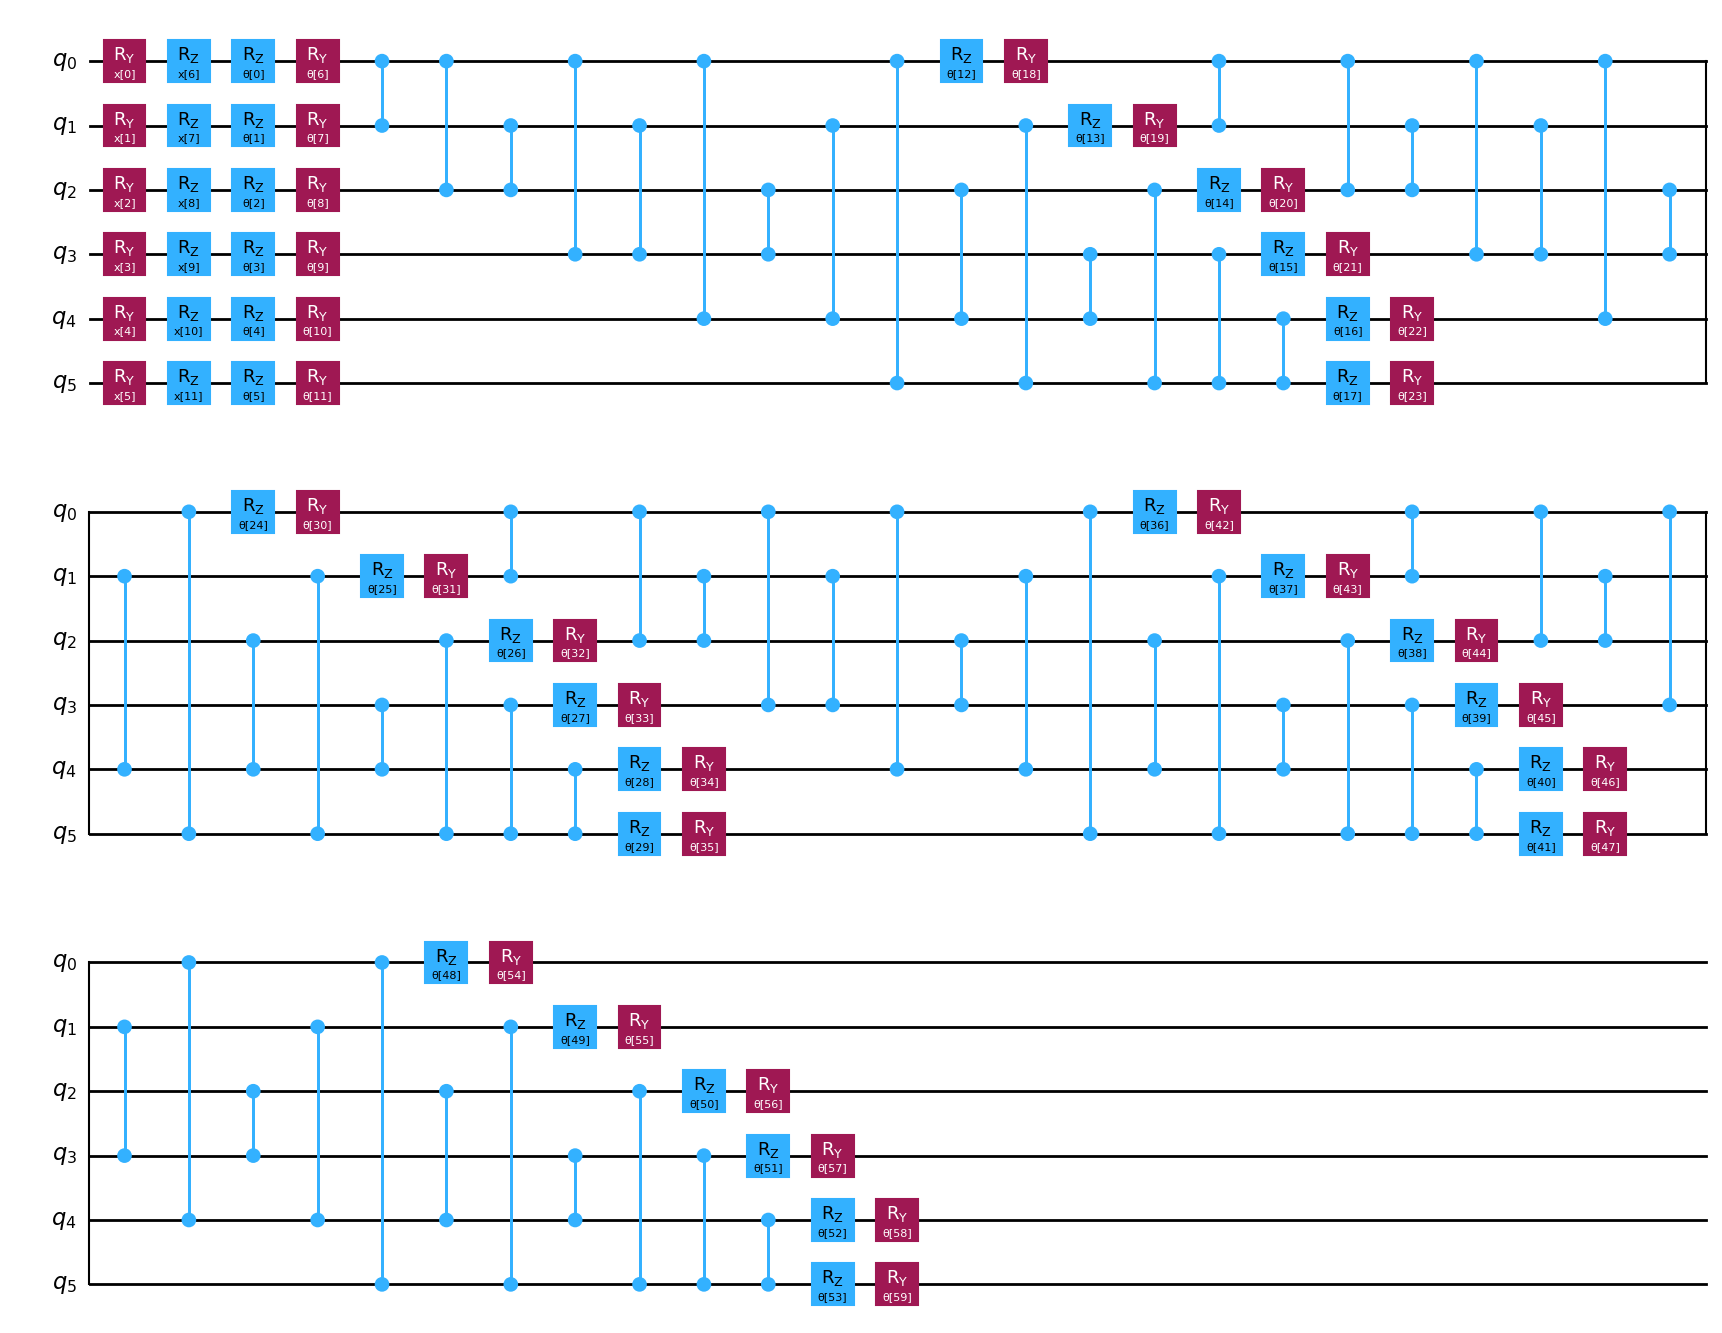

In [8]:
featuremap = EfficientSU2(num_qubits=num_qubits, reps=0, parameter_prefix='x', )
ansatz = TwoLocal(num_qubits=num_qubits, reps=4, entanglement_blocks='cz', rotation_blocks=['rz', 'ry'])

qc = QuantumCircuit(num_qubits)
qc.compose(featuremap, inplace=True)
qc.compose(ansatz, inplace=True)
qc.decompose().draw(output="mpl", style='iqx')

In [17]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

  rf = RandomForestClassifier(random_state=42)

  rf.fit(X_train, Y_train)

  feature_importances = rf.feature_importances_

  least_important_index = np.argmin(feature_importances)

  X_train = np.delete(X_train, least_important_index, axis=1)

  X_test = np.delete(X_test, least_important_index, axis=1)


  MAXITR = 350
  num_qubits = X.shape[1] //2
  opt = COBYLA(maxiter=MAXITR)

  featuremap = EfficientSU2(num_qubits=num_qubits, reps=0, parameter_prefix='x')
  ansatz = TwoLocal(num_qubits=num_qubits, reps=3, entanglement_blocks='cz', rotation_blocks=['rz', 'ry'])




  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)

  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recall:\n",recalls)
  print("F1:\n",f1s)

  print("Time:\n",times)
  t = np.mean(times)
  t_std = np.std(times)
  p = np.mean(precisions)
  p_std = np.std(precisions)
  a = np.mean(accuracies)
  a_std = np.std(accuracies)
  f = np.mean(f1s)
  f_std = np.std(f1s)
  r = np.mean(recall)
  r_std = np.std(recall)
  
  print(f"Mean Precision: {p}±{p_std}")
  print(f"Mean Accuracy: {a}±{a_std}")
  print(f"Mean Recall: {r}±{r_std}")
  print(f"Mean F1: {f}±{f_std}")
  print(f"Mean Time: {t}±{t_std}")

Precision:
 [0.9047619047619047, 0.9055555555555556, 0.9753086419753088, 0.9555555555555555, 0.8484848484848485, 0.9393939393939394, 0.925925925925926, 0.8758169934640523, 0.9145299145299144, 0.9444444444444444]
Accuracy:
 [0.8333333333333334, 0.8888888888888888, 0.9722222222222222, 0.9444444444444444, 0.8333333333333334, 0.9166666666666666, 0.8888888888888888, 0.8611111111111112, 0.8611111111111112, 0.9444444444444444]
Recall:
 [0.8571428571428571, 0.8869047619047619, 0.9761904761904763, 0.9523809523809524, 0.8571428571428571, 0.9285714285714285, 0.9047619047619048, 0.8452380952380952, 0.8809523809523809, 0.9345238095238096]
F1:
 [0.8446645946645945, 0.8929249762583095, 0.9725248123940935, 0.9465020576131687, 0.8315789473684211, 0.9205944586061546, 0.8957264957264957, 0.8601433691756273, 0.8705087505087504, 0.9444444444444444]
Time:
 [450.0323841571808, 436.54948925971985, 401.7457232475281, 364.7313015460968, 345.659770488739, 346.94715428352356, 339.7684404850006, 341.7678806781769,

Precision:
 [0.9047619047619047, 0.9055555555555556, 0.9753086419753088, 0.9555555555555555, 0.8484848484848485, 0.9393939393939394, 0.925925925925926, 0.8758169934640523, 0.9145299145299144, 0.9444444444444444]
Accuracy:
 [0.8333333333333334, 0.8888888888888888, 0.9722222222222222, 0.9444444444444444, 0.8333333333333334, 0.9166666666666666, 0.8888888888888888, 0.8611111111111112, 0.8611111111111112, 0.9444444444444444]
Recall:
 [0.8571428571428571, 0.8869047619047619, 0.9761904761904763, 0.9523809523809524, 0.8571428571428571, 0.9285714285714285, 0.9047619047619048, 0.8452380952380952, 0.8809523809523809, 0.9345238095238096]
F1:
 [0.8446645946645945, 0.8929249762583095, 0.9725248123940935, 0.9465020576131687, 0.8315789473684211, 0.9205944586061546, 0.8957264957264957, 0.8601433691756273, 0.8705087505087504, 0.9444444444444444]
Time:
 [450.0323841571808, 436.54948925971985, 401.7457232475281, 364.7313015460968, 345.659770488739, 346.94715428352356, 339.7684404850006, 341.7678806781769, 341.261426448822, 343.9403281211853]


**Mean Precision:** 0.9189777724091449±0.03585928691799313
**Mean Accuracy:** 0.8944444444444445±0.04614791034954483
**Mean Recall:** 0.9345238095238096±0.0
**Mean F1:** 0.897961290676006±0.04477746970188129
**Mean Time:** 371.2403898715973±40.24186106627079


In [7]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

  rf = RandomForestClassifier(random_state=42)

  rf.fit(X_train, Y_train)

  feature_importances = rf.feature_importances_

  least_important_index = np.argmin(feature_importances)

  X_train = np.delete(X_train, least_important_index, axis=1)

  X_test = np.delete(X_test, least_important_index, axis=1)


  MAXITR = 350
  num_qubits = X.shape[1] //2
  opt = COBYLA(maxiter=MAXITR)

  featuremap = EfficientSU2(num_qubits=num_qubits, reps=0, parameter_prefix='x', su2_gates=['h', 'ry','rz'] )
  ansatz = TwoLocal(num_qubits=num_qubits, reps=3, entanglement_blocks='cz', rotation_blocks=['rz', 'ry'])




  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)

  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recall:\n",recalls)
  print("F1:\n",f1s)

  print("Time:\n",times)
  t = np.mean(times)
  t_std = np.std(times)
  p = np.mean(precisions)
  p_std = np.std(precisions)
  a = np.mean(accuracies)
  a_std = np.std(accuracies)
  f = np.mean(f1s)
  f_std = np.std(f1s)
  r = np.mean(recall)
  r_std = np.std(recall)
  
  print(f"Mean Precision: {p}±{p_std}")
  print(f"Mean Accuracy: {a}±{a_std}")
  print(f"Mean Recall: {r}±{r_std}")
  print(f"Mean F1: {f}±{f_std}")
  print(f"Mean Time: {t}±{t_std}")

Precision:
 [0.8888888888888888, 0.9493827160493827, 0.8670384399551065, 0.9256410256410257, 0.947530864197531, 0.8888888888888888, 0.9266975308641976, 0.974074074074074, 0.8683501683501683, 0.9266975308641976]
Accuracy:
 [0.8888888888888888, 0.9444444444444444, 0.8611111111111112, 0.9166666666666666, 0.9444444444444444, 0.8888888888888888, 0.9166666666666666, 0.9722222222222222, 0.8611111111111112, 0.9166666666666666]
Recall:
 [0.8869047619047619, 0.9523809523809524, 0.8809523809523809, 0.9285714285714285, 0.9523809523809524, 0.9047619047619048, 0.9285714285714285, 0.9761904761904763, 0.8809523809523809, 0.9285714285714285]
F1:
 [0.8888888888888888, 0.9436036129748098, 0.8572984749455339, 0.9176954732510288, 0.9447470346163157, 0.8888888888888888, 0.9143355119825708, 0.9721867461331064, 0.8573009791400596, 0.9143355119825708]
Time:
 [455.6647045612335, 460.1206350326538, 463.89243030548096, 465.47908329963684, 459.8619394302368, 433.9232807159424, 354.72895860671997, 354.1590638160705

# **EfficientSU2/TwoLocal Test**

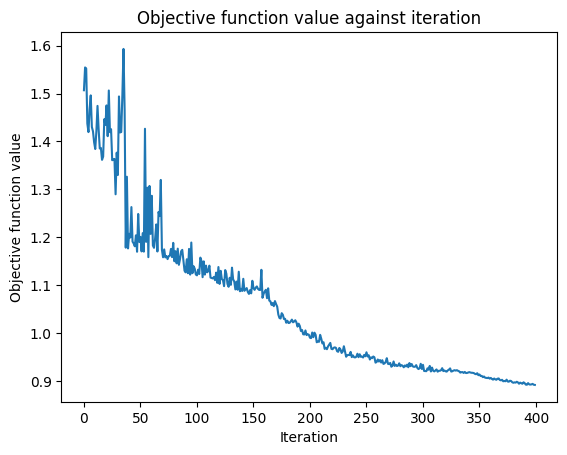

Precision:
 [0.974074074074074]
Accuracy:
 [0.9722222222222222]
Recall:
 [0.9761904761904763]
F1:
 [0.9721867461331064]
Time:
 [435.9503734111786]
Mean Precision: 0.974074074074074±0.0
Mean Accuracy: 0.9722222222222222±0.0
Mean Recall: 0.9761904761904763±0.0
Mean F1: 0.9721867461331064±0.0
Mean Time: 435.9503734111786±0.0


In [9]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(1):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

  rf = RandomForestClassifier(random_state=42)

  rf.fit(X_train, Y_train)

  feature_importances = rf.feature_importances_

  least_important_index = np.argmin(feature_importances)

  X_train = np.delete(X_train, least_important_index, axis=1)

  X_test = np.delete(X_test, least_important_index, axis=1)


  MAXITR = 400
  num_qubits = X.shape[1] //2
  opt = COBYLA(maxiter=MAXITR)

  featuremap = EfficientSU2(num_qubits=num_qubits, reps=0, parameter_prefix='x', su2_gates=['h', 'ry','rz'] )
  ansatz = TwoLocal(num_qubits=num_qubits, reps=2, entanglement_blocks='cz', rotation_blocks=['rz', 'ry'])




  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)

  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recall:\n",recalls)
  print("F1:\n",f1s)

  print("Time:\n",times)
  t = np.mean(times)
  t_std = np.std(times)
  p = np.mean(precisions)
  p_std = np.std(precisions)
  a = np.mean(accuracies)
  a_std = np.std(accuracies)
  f = np.mean(f1s)
  f_std = np.std(f1s)
  r = np.mean(recall)
  r_std = np.std(recall)
  
  print(f"Mean Precision: {p}±{p_std}")
  print(f"Mean Accuracy: {a}±{a_std}")
  print(f"Mean Recall: {r}±{r_std}")
  print(f"Mean F1: {f}±{f_std}")
  print(f"Mean Time: {t}±{t_std}")

In [ ]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(1):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

  rf = RandomForestClassifier(random_state=42)

  rf.fit(X_train, Y_train)

  feature_importances = rf.feature_importances_

  least_important_index = np.argmin(feature_importances)

  X_train = np.delete(X_train, least_important_index, axis=1)

  X_test = np.delete(X_test, least_important_index, axis=1)


  MAXITR = 400
  num_qubits = X.shape[1] //2
  opt = COBYLA(maxiter=MAXITR)

  featuremap = EfficientSU2(num_qubits=num_qubits, reps=0, parameter_prefix='x',
                            su2_gates=['h', 'rz','ry'] )
  ansatz = TwoLocal(num_qubits=num_qubits, reps=2, entanglement_blocks='cz', rotation_blocks=['rz', 'ry'])




  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)

  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recall:\n",recalls)
  print("F1:\n",f1s)

  print("Time:\n",times)
  t = np.mean(times)
  t_std = np.std(times)
  p = np.mean(precisions)
  p_std = np.std(precisions)
  a = np.mean(accuracies)
  a_std = np.std(accuracies)
  f = np.mean(f1s)
  f_std = np.std(f1s)
  r = np.mean(recall)
  r_std = np.std(recall)
  
  print(f"Mean Precision: {p}±{p_std}")
  print(f"Mean Accuracy: {a}±{a_std}")
  print(f"Mean Recall: {r}±{r_std}")
  print(f"Mean F1: {f}±{f_std}")
  print(f"Mean Time: {t}±{t_std}")

# **Final Comparision between Models**

In [9]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(1):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, random_state=42, test_size=0.2)

  
  rf = RandomForestClassifier(random_state=42)

  rf.fit(X_train, Y_train)

  feature_importances = rf.feature_importances_

  least_important_index = np.argmin(feature_importances)

  X_train = np.delete(X_train, least_important_index, axis=1)

  X_test = np.delete(X_test, least_important_index, axis=1)

  MAXITR = 500
  num_qubits = X.shape[1]//2
  opt = COBYLA(maxiter=MAXITR)

  featuremap = EfficientSU2(num_qubits=num_qubits, reps=0, parameter_prefix='x')
  ansatz = RealAmplitudes(num_qubits=num_qubits, reps=3)



  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)
  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  score = vqc.score(X_test, Y_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='weighted')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Time:\n",times)
  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recalls:\n",recalls)
  print("F1:\n",f1s)

Time:
 [523.367066860199]
Precision:
 [0.83367673992674]
Accuracy:
 [0.8333333333333334]
Recalls:
 [0.8333333333333334]
F1:
 [0.8308641975308642]


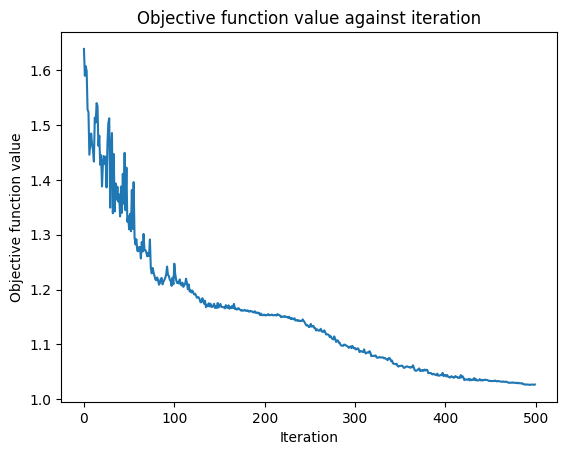

Time:
 [662.1937825679779]
Precision:
 [0.9493827160493827]
Accuracy:
 [0.9444444444444444]
Recalls:
 [0.9444444444444444]
F1:
 [0.9436036129748098]


In [29]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(1):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, random_state=42, test_size=0.2)

  
  rf = RandomForestClassifier(random_state=42)

  rf.fit(X_train, Y_train)

  feature_importances = rf.feature_importances_

  least_important_index = np.argmin(feature_importances)

  X_train = np.delete(X_train, least_important_index, axis=1)

  X_test = np.delete(X_test, least_important_index, axis=1)

  MAXITR = 500
  num_qubits = X.shape[1]//2
  opt = COBYLA(maxiter=MAXITR)

  featuremap = EfficientSU2(num_qubits=num_qubits, reps=0, parameter_prefix='x',
                            su2_gates=['h', 'rz','ry'] )
  ansatz = RealAmplitudes(num_qubits=num_qubits, reps=4)



  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)
  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  score = vqc.score(X_test, Y_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='weighted')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Time:\n",times)
  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recalls:\n",recalls)
  print("F1:\n",f1s)

# effsu2_realamp_objective_func_vals = objective_func_vals

In [30]:
effsu2_hadamrd_realamp_objective_func_vals = objective_func_vals

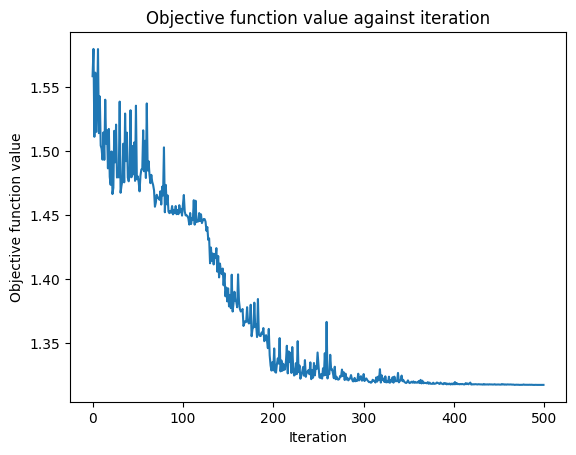

Time:
 [618.1899015903473]
Precision:
 [0.7801898537192655]
Accuracy:
 [0.7777777777777778]
Recalls:
 [0.7777777777777778]
F1:
 [0.7734583218454185]


In [33]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(1):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, random_state=42, test_size=0.2)

  
  rf = RandomForestClassifier(random_state=42)

  rf.fit(X_train, Y_train)

  feature_importances = rf.feature_importances_

  least_important_index = np.argmin(feature_importances)

  X_train = np.delete(X_train, least_important_index, axis=1)

  X_test = np.delete(X_test, least_important_index, axis=1)

  MAXITR = 500
  num_qubits = X.shape[1]//2
  opt = COBYLA(maxiter=MAXITR)

  featuremap = EfficientSU2(num_qubits=num_qubits, reps=0, parameter_prefix='x',
                            su2_gates=['h', 'rz','ry'] )
  ansatz = TwoLocal(num_qubits=num_qubits, reps=4, entanglement='cz', rotation_blocks=['rz', "ry"])



  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)
  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  score = vqc.score(X_test, Y_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='weighted')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Time:\n",times)
  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recalls:\n",recalls)
  print("F1:\n",f1s)

# effsu2_realamp_objective_func_vals = objective_func_vals

In [34]:
effsu2_hadamard_twolocal_objective_func_vals = objective_func_vals

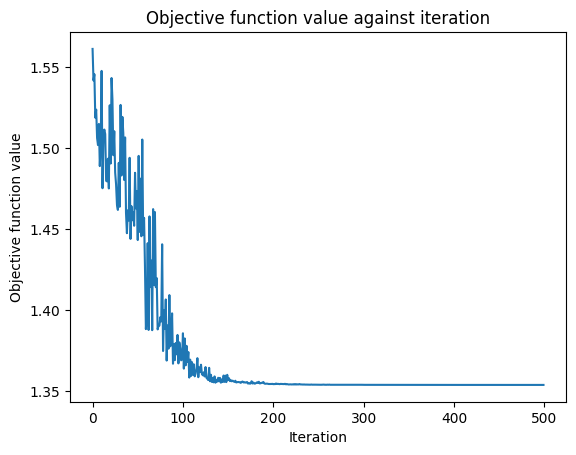

Time:
 [425.19909620285034]
Precision:
 [0.7742424242424243]
Accuracy:
 [0.6666666666666666]
Recalls:
 [0.6666666666666666]
F1:
 [0.6265432098765432]


In [36]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(1):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, random_state=42, test_size=0.2)

  
  rf = RandomForestClassifier(random_state=42)

  rf.fit(X_train, Y_train)

  feature_importances = rf.feature_importances_

  least_important_index = np.argmin(feature_importances)

  X_train = np.delete(X_train, least_important_index, axis=1)

  X_test = np.delete(X_test, least_important_index, axis=1)

  MAXITR = 500
  num_qubits = X.shape[1]//2
  opt = COBYLA(maxiter=MAXITR)

  featuremap = EfficientSU2(num_qubits=num_qubits, reps=0, parameter_prefix='x')
  ansatz = TwoLocal(num_qubits=num_qubits, reps=2, entanglement='cz', rotation_blocks=['rz', "ry"])



  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)
  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  score = vqc.score(X_test, Y_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='weighted')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Time:\n",times)
  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recalls:\n",recalls)
  print("F1:\n",f1s)

# effsu2_realamp_objective_func_vals = objective_func_vals

In [38]:
effsu2_twolocal_objective_func_vals = objective_func_vals

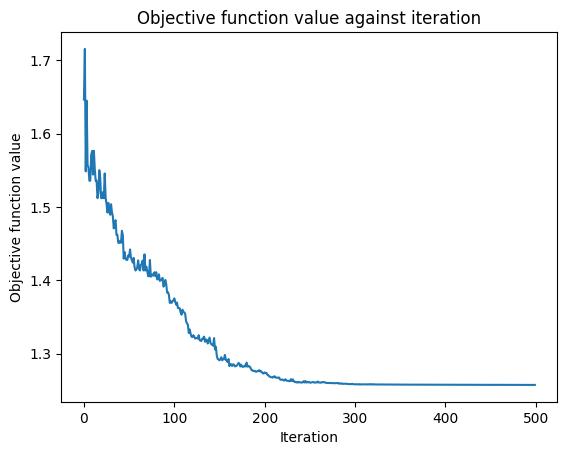

Precision:
 [0.7030303030303029]
Accuracy:
 [0.5]
Recall:
 [0.5357142857142857]
F1:
 [0.5176942355889724]
Time:
 [414.0724790096283]
Mean Precision: 0.7030303030303029±0.0
Mean Accuracy: 0.5±0.0
Mean Recall: 0.5357142857142857±0.0
Mean F1: 0.5176942355889724±0.0
Mean Time: 414.0724790096283±0.0


In [50]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(1):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

  rf = RandomForestClassifier(random_state=42)

  rf.fit(X_train, Y_train)

  feature_importances = rf.feature_importances_

  least_important_index = np.argmin(feature_importances)

  X_train = np.delete(X_train, least_important_index, axis=1)

  X_test = np.delete(X_test, least_important_index, axis=1)


  MAXITR = 500
  num_qubits = X.shape[1] //2
  opt = COBYLA(maxiter=MAXITR)

  featuremap = EfficientSU2(num_qubits=num_qubits, reps=0, parameter_prefix='x')
  ansatz = PauliTwoDesign(num_qubits=num_qubits, reps=3)




  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)

  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recall:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)
    
  t = np.mean(times)
  t_std = np.std(times)
  p = np.mean(precisions)
  p_std = np.std(precisions)
  a = np.mean(accuracies)
  a_std = np.std(accuracies)
  f = np.mean(f1s)
  f_std = np.std(f1s)
  r = np.mean(recalls)
  r_std = np.std(recalls)
  
  print(f"Mean Precision: {p}±{p_std}")
  print(f"Mean Accuracy: {a}±{a_std}")
  print(f"Mean Recall: {r}±{r_std}")
  print(f"Mean F1: {f}±{f_std}")
  print(f"Mean Time: {t}±{t_std}")
  
  

In [51]:
effsu2_paulidl_objective_func_vals = objective_func_vals

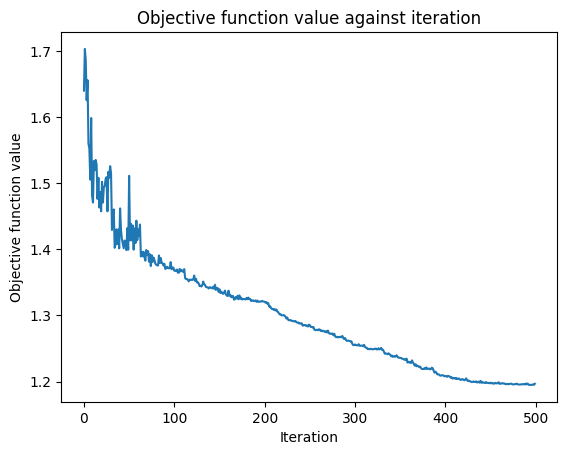

Precision:
 [0.7372685185185186]
Accuracy:
 [0.6944444444444444]
Recall:
 [0.7202380952380952]
F1:
 [0.6882154882154883]
Time:
 [416.3793501853943]
Mean Precision: 0.7372685185185186±0.0
Mean Accuracy: 0.6944444444444444±0.0
Mean Recall: 0.7202380952380952±0.0
Mean F1: 0.6882154882154883±0.0
Mean Time: 416.3793501853943±0.0


In [52]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(1):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

  rf = RandomForestClassifier(random_state=42)

  rf.fit(X_train, Y_train)

  feature_importances = rf.feature_importances_

  least_important_index = np.argmin(feature_importances)

  X_train = np.delete(X_train, least_important_index, axis=1)

  X_test = np.delete(X_test, least_important_index, axis=1)


  MAXITR = 500
  num_qubits = X.shape[1] //2
  opt = COBYLA(maxiter=MAXITR)

  qc_init = QuantumCircuit(num_qubits)

  for i in range(num_qubits):
    qc_init.h(i)

  featuremap = EfficientSU2(num_qubits=num_qubits, reps=0, parameter_prefix='x'
                           ,initial_state=qc_init)
  ansatz = PauliTwoDesign(num_qubits=num_qubits, reps=4)




  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)

  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recall:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)
    
  t = np.mean(times)
  t_std = np.std(times)
  p = np.mean(precisions)
  p_std = np.std(precisions)
  a = np.mean(accuracies)
  a_std = np.std(accuracies)
  f = np.mean(f1s)
  f_std = np.std(f1s)
  r = np.mean(recalls)
  r_std = np.std(recalls)
  
  print(f"Mean Precision: {p}±{p_std}")
  print(f"Mean Accuracy: {a}±{a_std}")
  print(f"Mean Recall: {r}±{r_std}")
  print(f"Mean F1: {f}±{f_std}")
  print(f"Mean Time: {t}±{t_std}")
  
  

In [53]:
effsu2_paulidl_hadamard_objective_func_vals = objective_func_vals

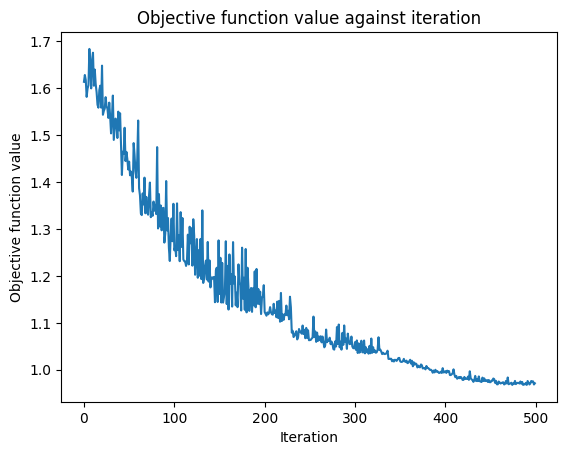

Precision:
 [0.9145502645502646]
Accuracy:
 [0.9166666666666666]
Recall:
 [0.8928571428571429]
F1:
 [0.914367816091954]
Time:
 [733.2001411914825]
Mean Precision: 0.9145502645502646±0.0
Mean Accuracy: 0.9166666666666666±0.0
Mean Recall: 0.8928571428571429±0.0
Mean F1: 0.914367816091954±0.0
Mean Time: 733.2001411914825±0.0


In [58]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(1):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

  rf = RandomForestClassifier(random_state=42)

  rf.fit(X_train, Y_train)

  feature_importances = rf.feature_importances_

  least_important_index = np.argmin(feature_importances)

  X_train = np.delete(X_train, least_important_index, axis=1)

  X_test = np.delete(X_test, least_important_index, axis=1)


  MAXITR = 500
  num_qubits = X.shape[1] //2
  opt = COBYLA(maxiter=MAXITR)
    


  featuremap = EfficientSU2(num_qubits=num_qubits, reps=0, parameter_prefix='x')
  ansatz = TwoLocal(num_qubits=num_qubits, reps=4, entanglement_blocks='cz', rotation_blocks=['rz', 'ry'])




  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)

  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recall:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)
  
  t = np.mean(times)
  t_std = np.std(times)
  p = np.mean(precisions)
  p_std = np.std(precisions)
  a = np.mean(accuracies)
  a_std = np.std(accuracies)
  f = np.mean(f1s)
  f_std = np.std(f1s)
  r = np.mean(recalls)
  r_std = np.std(recalls)
  
  print(f"Mean Precision: {p}±{p_std}")
  print(f"Mean Accuracy: {a}±{a_std}")
  print(f"Mean Recall: {r}±{r_std}")
  print(f"Mean F1: {f}±{f_std}")
  print(f"Mean Time: {t}±{t_std}")

In [59]:
effsu2_twolocal_objective_func_vals = objective_func_vals

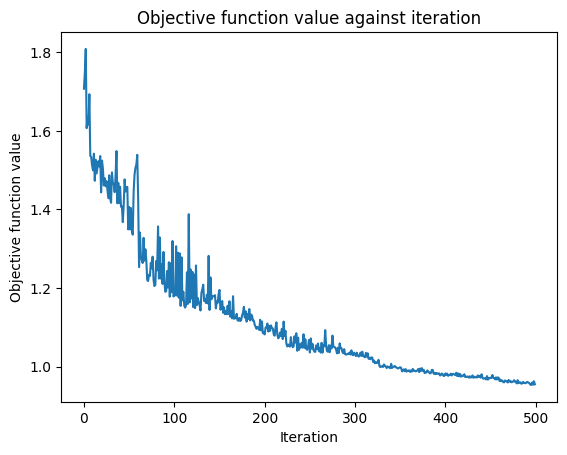

Precision:
 [0.8626984126984127]
Accuracy:
 [0.8611111111111112]
Recall:
 [0.8452380952380952]
F1:
 [0.860727969348659]
Time:
 [697.3187041282654]
Mean Precision: 0.8626984126984127±0.0
Mean Accuracy: 0.8611111111111112±0.0
Mean Recall: 0.8452380952380952±0.0
Mean F1: 0.860727969348659±0.0
Mean Time: 697.3187041282654±0.0


In [55]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(1):

  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

  rf = RandomForestClassifier(random_state=42)

  rf.fit(X_train, Y_train)

  feature_importances = rf.feature_importances_

  least_important_index = np.argmin(feature_importances)

  X_train = np.delete(X_train, least_important_index, axis=1)

  X_test = np.delete(X_test, least_important_index, axis=1)


  MAXITR = 500
  num_qubits = X.shape[1] //2
  opt = COBYLA(maxiter=MAXITR)
    
  qc_init = QuantumCircuit(num_qubits)
  for i in range(num_qubits):
    qc_init.h(i)

  featuremap = EfficientSU2(num_qubits=num_qubits, reps=0, parameter_prefix='x'
                           ,initial_state=qc_init)
  ansatz = TwoLocal(num_qubits=num_qubits, reps=4, entanglement_blocks='cz', rotation_blocks=['rz', 'ry'])




  objective_func_vals = []

  vqc = VQC(
      feature_map=featuremap,
      ansatz=ansatz,
      optimizer=opt,
      callback=callback_graph,
  )

  start = time.time()
  vqc.fit(X_train, Y_train)

  elapsed = time.time() - start
  preds = vqc.predict(X_test)
  precision = precision_score(Y_test, preds, average='weighted')
  accuracy = accuracy_score(Y_test, preds)
  recall = recall_score(Y_test, preds, average='macro')
  f1 = f1_score(Y_test, preds, average='weighted')

  times.append(elapsed)
  precisions.append(precision)
  accuracies.append(accuracy)
  recalls.append(recall)
  f1s.append(f1)

  print("Precision:\n",precisions)
  print("Accuracy:\n",accuracies)
  print("Recall:\n",recalls)
  print("F1:\n",f1s)
  print("Time:\n",times)
  
  t = np.mean(times)
  t_std = np.std(times)
  p = np.mean(precisions)
  p_std = np.std(precisions)
  a = np.mean(accuracies)
  a_std = np.std(accuracies)
  f = np.mean(f1s)
  f_std = np.std(f1s)
  r = np.mean(recalls)
  r_std = np.std(recalls)
  
  print(f"Mean Precision: {p}±{p_std}")
  print(f"Mean Accuracy: {a}±{a_std}")
  print(f"Mean Recall: {r}±{r_std}")
  print(f"Mean F1: {f}±{f_std}")
  print(f"Mean Time: {t}±{t_std}")

In [56]:
effsu2_hadamard_twolocal_objective_func_vals = objective_func_vals

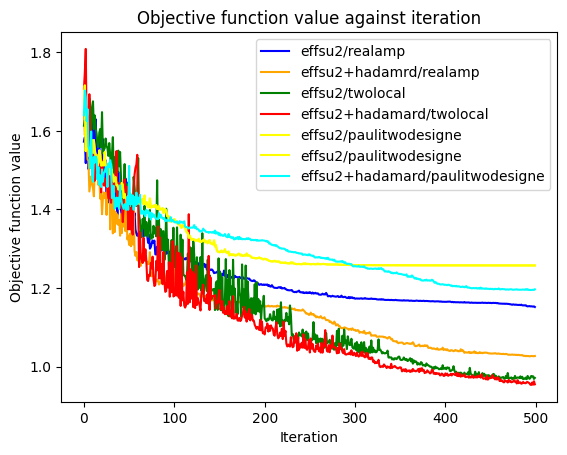

In [60]:
plt.title("Objective function value against iteration")
plt.xlabel("Iteration")
plt.ylabel("Objective function value")

# Colors:
#       Blue
#       Red
#       Green
#       Cyan
#       Magenta
#       Yellow
#       Black
#       White
#       Orange
#       Purple

plt.plot(range(len(effsu2_realamp_objective_func_vals)), 
         effsu2_realamp_objective_func_vals, color='blue', label='effsu2/realamp')
plt.plot(range(len(effsu2_hadamrd_realamp_objective_func_vals)), 
         effsu2_hadamrd_realamp_objective_func_vals, color='orange', 
         label='effsu2+hadamrd/realamp')
plt.plot(range(len(effsu2_twolocal_objective_func_vals)), 
         effsu2_twolocal_objective_func_vals, color='green',
         label='effsu2/twolocal')
plt.plot(range(len(effsu2_hadamard_twolocal_objective_func_vals)), 
         effsu2_hadamard_twolocal_objective_func_vals, color='red',
         label='effsu2+hadamard/twolocal')
plt.plot(range(len(effsu2_paulidl_objective_func_vals)), 
         effsu2_paulidl_objective_func_vals, color='yellow',
         label='effsu2/paulitwodesigne')
plt.plot(range(len(effsu2_paulidl_objective_func_vals)), 
         effsu2_paulidl_objective_func_vals, color='yellow',
         label='effsu2/paulitwodesigne')
plt.plot(range(len(effsu2_paulidl_hadamard_objective_func_vals)), 
         effsu2_paulidl_hadamard_objective_func_vals, color='cyan',
         label='effsu2+hadamard/paulitwodesigne')
effsu2_paulidl_hadamard_objective_func_vals
plt.legend()
plt.show()

In [14]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

    model = Sequential([
        Dense(1, activation='relu', input_shape=(X_scaled.shape[1],)),
    #     Dense(32, activation='relu'),
        Dense(3, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    start_time = time.time()

#     class_mapping = {-1: 0, 1: 1}
#     Y_train = np.array([class_mapping[y] for y in Y_train])
#     Y_test = np.array([class_mapping[y] for y in Y_test])

    history = model.fit(X_train, Y_train, batch_size=32, epochs=100, validation_split=0.2, verbose=1)

    training_time = time.time() - start_time
    print(f"Training time: {training_time} seconds")

#     Y_pred = (model.predict(X_test) > 0.5).astype('int32')
    Y_pred = np.argmax(model.predict(X_test),axis=-1)

    accuracy = accuracy_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred, average='weighted')
    recall = recall_score(Y_test, Y_pred, average='macro')
    f1 = f1_score(Y_test, Y_pred, average='weighted')

#     print(f'Accuracy: {accuracy}')
#     print(f'Precision: {precision}')
#     print(f'Recall: {recall}')
#     print(f'F1-score: {f1}')
    model.summary()
    times.append(training_time)
    precisions.append(precision)
    accuracies.append(accuracy)
    recalls.append(recall)
    f1s.append(f1)

    
    print("Precision:\n",precisions)
    print("Accuracy:\n",accuracies)
    print("Recalls:\n",recalls)
    print("F1:\n",f1s)
    print("Time:\n",times)
    
    t = np.mean(times)
    t_std = np.std(times)
    p = np.mean(precisions)
    p_std = np.std(precisions)
    a = np.mean(accuracies)
    a_std = np.std(accuracies)
    f = np.mean(f1s)
    f_std = np.std(f1s)
    r = np.mean(recalls)
    r_std = np.std(recalls)
  
    print(f"Mean Precision: {p}±{p_std}")
    print(f"Mean Accuracy: {a}±{a_std}")
    print(f"Mean Recall: {r}±{r_std}")
    print(f"Mean F1: {f}±{f_std}")
    print(f"Mean Time: {t}±{t_std}")


Epoch 1/100
4/4 [==============================] - 1s 81ms/step - loss: 1.0985 - accuracy: 0.4425 - val_loss: 1.0448 - val_accuracy: 0.5517
Epoch 2/100
4/4 [==============================] - 0s 18ms/step - loss: 1.0922 - accuracy: 0.4690 - val_loss: 1.0382 - val_accuracy: 0.5862
Epoch 3/100
4/4 [==============================] - 0s 19ms/step - loss: 1.0858 - accuracy: 0.4779 - val_loss: 1.0315 - val_accuracy: 0.5862
Epoch 4/100
4/4 [==============================] - 0s 23ms/step - loss: 1.0799 - accuracy: 0.4956 - val_loss: 1.0252 - val_accuracy: 0.5862
Epoch 5/100
4/4 [==============================] - 0s 26ms/step - loss: 1.0745 - accuracy: 0.4956 - val_loss: 1.0188 - val_accuracy: 0.6207
Epoch 6/100
4/4 [==============================] - 0s 26ms/step - loss: 1.0690 - accuracy: 0.4956 - val_loss: 1.0131 - val_accuracy: 0.6207
Epoch 7/100
4/4 [==============================] - 0s 25ms/step - loss: 1.0642 - accuracy: 0.4956 - val_loss: 1.0075 - val_accuracy: 0.6552
Epoch 8/100
4/4 [===

4/4 [==============================] - 0s 26ms/step - loss: 1.4983 - accuracy: 0.2035 - val_loss: 1.3671 - val_accuracy: 0.3103
Epoch 10/100
4/4 [==============================] - 0s 25ms/step - loss: 1.4845 - accuracy: 0.2035 - val_loss: 1.3553 - val_accuracy: 0.3448
Epoch 11/100
4/4 [==============================] - 0s 17ms/step - loss: 1.4720 - accuracy: 0.2212 - val_loss: 1.3436 - val_accuracy: 0.3448
Epoch 12/100
4/4 [==============================] - 0s 15ms/step - loss: 1.4598 - accuracy: 0.2212 - val_loss: 1.3316 - val_accuracy: 0.3448
Epoch 13/100
4/4 [==============================] - 0s 13ms/step - loss: 1.4465 - accuracy: 0.2212 - val_loss: 1.3198 - val_accuracy: 0.3448
Epoch 14/100
4/4 [==============================] - 0s 17ms/step - loss: 1.4344 - accuracy: 0.2212 - val_loss: 1.3081 - val_accuracy: 0.3448
Epoch 15/100
4/4 [==============================] - 0s 17ms/step - loss: 1.4217 - accuracy: 0.2212 - val_loss: 1.2969 - val_accuracy: 0.3448
Epoch 16/100
4/4 [========

/home/gzuz/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4/4 [==============================] - 1s 60ms/step - loss: 1.6176 - accuracy: 0.3451 - val_loss: 1.6754 - val_accuracy: 0.3793
Epoch 2/100
4/4 [==============================] - 0s 10ms/step - loss: 1.6004 - accuracy: 0.3363 - val_loss: 1.6576 - val_accuracy: 0.3793
Epoch 3/100
4/4 [==============================] - 0s 23ms/step - loss: 1.5838 - accuracy: 0.3363 - val_loss: 1.6399 - val_accuracy: 0.3793
Epoch 4/100
4/4 [==============================] - 0s 12ms/step - loss: 1.5670 - accuracy: 0.3451 - val_loss: 1.6224 - val_accuracy: 0.3793
Epoch 5/100
4/4 [==============================] - 0s 26ms/step - loss: 1.5507 - accuracy: 0.3451 - val_loss: 1.6054 - val_accuracy: 0.3793
Epoch 6/100
4/4 [==============================] - 0s 17ms/step - loss: 1.5349 - accuracy: 0.3540 - val_loss: 1.5888 - val_accuracy: 0.4138
Epoch 7/100
4/4 [==============================] - 0s 16ms/step - loss: 1.5177 - accuracy: 0.3628 - val_loss: 1.5729 - val_accuracy: 0.4138
Epoch 8/100
4/4 [===============

/home/gzuz/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4/4 [==============================] - 1s 55ms/step - loss: 1.3140 - accuracy: 0.4602 - val_loss: 1.2514 - val_accuracy: 0.4138
Epoch 2/100
4/4 [==============================] - 0s 11ms/step - loss: 1.3028 - accuracy: 0.4248 - val_loss: 1.2411 - val_accuracy: 0.4138
Epoch 3/100
4/4 [==============================] - 0s 19ms/step - loss: 1.2923 - accuracy: 0.4248 - val_loss: 1.2305 - val_accuracy: 0.4483
Epoch 4/100
4/4 [==============================] - 0s 13ms/step - loss: 1.2810 - accuracy: 0.4425 - val_loss: 1.2204 - val_accuracy: 0.4483
Epoch 5/100
4/4 [==============================] - 0s 19ms/step - loss: 1.2693 - accuracy: 0.4513 - val_loss: 1.2105 - val_accuracy: 0.4483
Epoch 6/100
4/4 [==============================] - 0s 20ms/step - loss: 1.2592 - accuracy: 0.4513 - val_loss: 1.2005 - val_accuracy: 0.4483
Epoch 7/100
4/4 [==============================] - 0s 28ms/step - loss: 1.2487 - accuracy: 0.4513 - val_loss: 1.1909 - val_accuracy: 0.4483
Epoch 8/100
4/4 [===============

/home/gzuz/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4/4 [==============================] - 1s 56ms/step - loss: 1.1662 - accuracy: 0.2743 - val_loss: 1.1617 - val_accuracy: 0.2414
Epoch 2/100
4/4 [==============================] - 0s 15ms/step - loss: 1.1591 - accuracy: 0.3894 - val_loss: 1.1548 - val_accuracy: 0.5517
Epoch 3/100
4/4 [==============================] - 0s 15ms/step - loss: 1.1532 - accuracy: 0.4779 - val_loss: 1.1480 - val_accuracy: 0.5517
Epoch 4/100
4/4 [==============================] - 0s 12ms/step - loss: 1.1470 - accuracy: 0.4956 - val_loss: 1.1414 - val_accuracy: 0.5517
Epoch 5/100
4/4 [==============================] - 0s 14ms/step - loss: 1.1402 - accuracy: 0.5044 - val_loss: 1.1349 - val_accuracy: 0.5517
Epoch 6/100
4/4 [==============================] - 0s 12ms/step - loss: 1.1347 - accuracy: 0.5221 - val_loss: 1.1285 - val_accuracy: 0.5517
Epoch 7/100
4/4 [==============================] - 0s 16ms/step - loss: 1.1282 - accuracy: 0.5221 - val_loss: 1.1224 - val_accuracy: 0.5517
Epoch 8/100
4/4 [===============

/home/gzuz/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4/4 [==============================] - 1s 51ms/step - loss: 1.0483 - accuracy: 0.3894 - val_loss: 1.0313 - val_accuracy: 0.5517
Epoch 2/100
4/4 [==============================] - 0s 8ms/step - loss: 1.0446 - accuracy: 0.5752 - val_loss: 1.0271 - val_accuracy: 0.5517
Epoch 3/100
4/4 [==============================] - 0s 12ms/step - loss: 1.0409 - accuracy: 0.5841 - val_loss: 1.0229 - val_accuracy: 0.5517
Epoch 4/100
4/4 [==============================] - 0s 20ms/step - loss: 1.0375 - accuracy: 0.5841 - val_loss: 1.0186 - val_accuracy: 0.5517
Epoch 5/100
4/4 [==============================] - 0s 17ms/step - loss: 1.0339 - accuracy: 0.5929 - val_loss: 1.0143 - val_accuracy: 0.5517
Epoch 6/100
4/4 [==============================] - 0s 16ms/step - loss: 1.0299 - accuracy: 0.5929 - val_loss: 1.0100 - val_accuracy: 0.5517
Epoch 7/100
4/4 [==============================] - 0s 16ms/step - loss: 1.0261 - accuracy: 0.6018 - val_loss: 1.0056 - val_accuracy: 0.5517
Epoch 8/100
4/4 [================

Epoch 1/100


/home/gzuz/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4/4 [==============================] - 1s 66ms/step - loss: 1.3555 - accuracy: 0.4336 - val_loss: 1.2353 - val_accuracy: 0.4138
Epoch 2/100
4/4 [==============================] - 0s 14ms/step - loss: 1.3367 - accuracy: 0.5133 - val_loss: 1.2215 - val_accuracy: 0.4483
Epoch 3/100
4/4 [==============================] - 0s 16ms/step - loss: 1.3194 - accuracy: 0.3717 - val_loss: 1.2081 - val_accuracy: 0.2414
Epoch 4/100
4/4 [==============================] - 0s 14ms/step - loss: 1.3012 - accuracy: 0.2655 - val_loss: 1.1963 - val_accuracy: 0.3103
Epoch 5/100
4/4 [==============================] - 0s 14ms/step - loss: 1.2853 - accuracy: 0.2655 - val_loss: 1.1856 - val_accuracy: 0.3103
Epoch 6/100
4/4 [==============================] - 0s 16ms/step - loss: 1.2684 - accuracy: 0.2832 - val_loss: 1.1755 - val_accuracy: 0.3103
Epoch 7/100
4/4 [==============================] - 0s 13ms/step - loss: 1.2534 - accuracy: 0.2832 - val_loss: 1.1659 - val_accuracy: 0.3103
Epoch 8/100
4/4 [===============

/home/gzuz/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4/4 [==============================] - 1s 61ms/step - loss: 1.0995 - accuracy: 0.4513 - val_loss: 1.0930 - val_accuracy: 0.4483
Epoch 2/100
4/4 [==============================] - 0s 12ms/step - loss: 1.0982 - accuracy: 0.4867 - val_loss: 1.0916 - val_accuracy: 0.4483
Epoch 3/100
4/4 [==============================] - 0s 20ms/step - loss: 1.0964 - accuracy: 0.5044 - val_loss: 1.0902 - val_accuracy: 0.4483
Epoch 4/100
4/4 [==============================] - 0s 9ms/step - loss: 1.0948 - accuracy: 0.5044 - val_loss: 1.0888 - val_accuracy: 0.4483
Epoch 5/100
4/4 [==============================] - 0s 14ms/step - loss: 1.0932 - accuracy: 0.5044 - val_loss: 1.0874 - val_accuracy: 0.4483
Epoch 6/100
4/4 [==============================] - 0s 21ms/step - loss: 1.0916 - accuracy: 0.5044 - val_loss: 1.0860 - val_accuracy: 0.4483
Epoch 7/100
4/4 [==============================] - 0s 19ms/step - loss: 1.0899 - accuracy: 0.5044 - val_loss: 1.0845 - val_accuracy: 0.4483
Epoch 8/100
4/4 [================

/home/gzuz/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4/4 [==============================] - 1s 59ms/step - loss: 1.1164 - accuracy: 0.3186 - val_loss: 1.1721 - val_accuracy: 0.3448
Epoch 2/100
4/4 [==============================] - 0s 22ms/step - loss: 1.1103 - accuracy: 0.4336 - val_loss: 1.1642 - val_accuracy: 0.4138
Epoch 3/100
4/4 [==============================] - 0s 20ms/step - loss: 1.1047 - accuracy: 0.4513 - val_loss: 1.1567 - val_accuracy: 0.4138
Epoch 4/100
4/4 [==============================] - 0s 20ms/step - loss: 1.0990 - accuracy: 0.4513 - val_loss: 1.1494 - val_accuracy: 0.4138
Epoch 5/100
4/4 [==============================] - 0s 14ms/step - loss: 1.0934 - accuracy: 0.4602 - val_loss: 1.1421 - val_accuracy: 0.4138
Epoch 6/100
4/4 [==============================] - 0s 15ms/step - loss: 1.0879 - accuracy: 0.4602 - val_loss: 1.1348 - val_accuracy: 0.4138
Epoch 7/100
4/4 [==============================] - 0s 15ms/step - loss: 1.0825 - accuracy: 0.4690 - val_loss: 1.1275 - val_accuracy: 0.4138
Epoch 8/100
4/4 [===============

/home/gzuz/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4/4 [==============================] - 1s 64ms/step - loss: 1.0980 - accuracy: 0.3363 - val_loss: 1.1163 - val_accuracy: 0.4138
Epoch 2/100
4/4 [==============================] - 0s 14ms/step - loss: 1.0945 - accuracy: 0.3982 - val_loss: 1.1114 - val_accuracy: 0.4138
Epoch 3/100
4/4 [==============================] - 0s 14ms/step - loss: 1.0914 - accuracy: 0.3982 - val_loss: 1.1068 - val_accuracy: 0.4138
Epoch 4/100
4/4 [==============================] - 0s 14ms/step - loss: 1.0880 - accuracy: 0.3982 - val_loss: 1.1024 - val_accuracy: 0.4138
Epoch 5/100
4/4 [==============================] - 0s 14ms/step - loss: 1.0852 - accuracy: 0.3982 - val_loss: 1.0980 - val_accuracy: 0.4138
Epoch 6/100
4/4 [==============================] - 0s 21ms/step - loss: 1.0824 - accuracy: 0.3982 - val_loss: 1.0938 - val_accuracy: 0.4138
Epoch 7/100
4/4 [==============================] - 0s 25ms/step - loss: 1.0795 - accuracy: 0.3982 - val_loss: 1.0898 - val_accuracy: 0.4138
Epoch 8/100
4/4 [===============

/home/gzuz/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

    model = Sequential([
        Dense(2, activation='relu', input_shape=(X_scaled.shape[1],)),
    #     Dense(32, activation='relu'),
        Dense(3, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    start_time = time.time()

#     class_mapping = {-1: 0, 1: 1}
#     Y_train = np.array([class_mapping[y] for y in Y_train])
#     Y_test = np.array([class_mapping[y] for y in Y_test])

    history = model.fit(X_train, Y_train, batch_size=32, epochs=100, validation_split=0.2, verbose=1)

    training_time = time.time() - start_time
    print(f"Training time: {training_time} seconds")

#     Y_pred = (model.predict(X_test) > 0.5).astype('int32')
    Y_pred = np.argmax(model.predict(X_test),axis=-1)

    accuracy = accuracy_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred, average='weighted')
    recall = recall_score(Y_test, Y_pred, average='macro')
    f1 = f1_score(Y_test, Y_pred, average='weighted')

#     print(f'Accuracy: {accuracy}')
#     print(f'Precision: {precision}')
#     print(f'Recall: {recall}')
#     print(f'F1-score: {f1}')
    model.summary()
    times.append(training_time)
    precisions.append(precision)
    accuracies.append(accuracy)
    recalls.append(recall)
    f1s.append(f1)

    
    print("Precision:\n",precisions)
    print("Accuracy:\n",accuracies)
    print("Recalls:\n",recalls)
    print("F1:\n",f1s)
    print("Time:\n",times)
    
    t = np.mean(times)
    t_std = np.std(times)
    p = np.mean(precisions)
    p_std = np.std(precisions)
    a = np.mean(accuracies)
    a_std = np.std(accuracies)
    f = np.mean(f1s)
    f_std = np.std(f1s)
    r = np.mean(recalls)
    r_std = np.std(recalls)
  
    print(f"Mean Precision: {p}±{p_std}")
    print(f"Mean Accuracy: {a}±{a_std}")
    print(f"Mean Recall: {r}±{r_std}")
    print(f"Mean F1: {f}±{f_std}")
    print(f"Mean Time: {t}±{t_std}")


Epoch 1/100
4/4 [==============================] - 1s 69ms/step - loss: 1.2794 - accuracy: 0.1150 - val_loss: 1.2700 - val_accuracy: 0.1379
Epoch 2/100
4/4 [==============================] - 0s 15ms/step - loss: 1.2690 - accuracy: 0.1239 - val_loss: 1.2612 - val_accuracy: 0.1379
Epoch 3/100
4/4 [==============================] - 0s 21ms/step - loss: 1.2602 - accuracy: 0.1593 - val_loss: 1.2524 - val_accuracy: 0.1379
Epoch 4/100
4/4 [==============================] - 0s 22ms/step - loss: 1.2507 - accuracy: 0.1681 - val_loss: 1.2440 - val_accuracy: 0.1379
Epoch 5/100
4/4 [==============================] - 0s 32ms/step - loss: 1.2422 - accuracy: 0.1681 - val_loss: 1.2359 - val_accuracy: 0.1379
Epoch 6/100
4/4 [==============================] - 0s 28ms/step - loss: 1.2343 - accuracy: 0.1681 - val_loss: 1.2281 - val_accuracy: 0.1379
Epoch 7/100
4/4 [==============================] - 0s 24ms/step - loss: 1.2256 - accuracy: 0.1681 - val_loss: 1.2208 - val_accuracy: 0.1379
Epoch 8/100
4/4 [===

4/4 [==============================] - 0s 13ms/step - loss: 1.0822 - accuracy: 0.5044 - val_loss: 1.0273 - val_accuracy: 0.4138
Epoch 10/100
4/4 [==============================] - 0s 14ms/step - loss: 1.0771 - accuracy: 0.5044 - val_loss: 1.0211 - val_accuracy: 0.4138
Epoch 11/100
4/4 [==============================] - 0s 18ms/step - loss: 1.0716 - accuracy: 0.5133 - val_loss: 1.0151 - val_accuracy: 0.4138
Epoch 12/100
4/4 [==============================] - 0s 13ms/step - loss: 1.0662 - accuracy: 0.5133 - val_loss: 1.0091 - val_accuracy: 0.4483
Epoch 13/100
4/4 [==============================] - 0s 15ms/step - loss: 1.0610 - accuracy: 0.5133 - val_loss: 1.0036 - val_accuracy: 0.4828
Epoch 14/100
4/4 [==============================] - 0s 16ms/step - loss: 1.0553 - accuracy: 0.5133 - val_loss: 0.9986 - val_accuracy: 0.4828
Epoch 15/100
4/4 [==============================] - 0s 23ms/step - loss: 1.0500 - accuracy: 0.5133 - val_loss: 0.9936 - val_accuracy: 0.4828
Epoch 16/100
4/4 [========

4/4 [==============================] - 0s 16ms/step - loss: 1.0780 - accuracy: 0.5487 - val_loss: 0.9341 - val_accuracy: 0.6207
Epoch 17/100
4/4 [==============================] - 0s 18ms/step - loss: 1.0705 - accuracy: 0.5487 - val_loss: 0.9266 - val_accuracy: 0.6552
Epoch 18/100
4/4 [==============================] - 0s 17ms/step - loss: 1.0615 - accuracy: 0.5487 - val_loss: 0.9194 - val_accuracy: 0.6552
Epoch 19/100
4/4 [==============================] - 0s 14ms/step - loss: 1.0539 - accuracy: 0.5664 - val_loss: 0.9121 - val_accuracy: 0.6552
Epoch 20/100
4/4 [==============================] - 0s 14ms/step - loss: 1.0459 - accuracy: 0.5841 - val_loss: 0.9049 - val_accuracy: 0.6552
Epoch 21/100
4/4 [==============================] - 0s 15ms/step - loss: 1.0381 - accuracy: 0.5841 - val_loss: 0.8978 - val_accuracy: 0.6552
Epoch 22/100
4/4 [==============================] - 0s 16ms/step - loss: 1.0294 - accuracy: 0.5841 - val_loss: 0.8906 - val_accuracy: 0.6552
Epoch 23/100
4/4 [========

2024-06-16 00:36:47.662350: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled


Training time: 10.811541080474854 seconds
2/2 [==============================] - 0s 11ms/step
Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_43 (Dense)            (None, 2)                 28        
                                                                 
 dense_44 (Dense)            (None, 3)                 9         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________
Precision:
 [0.8037037037037036, 0.9555555555555555, 0.7760683760683761]
Accuracy:
 [0.7222222222222222, 0.9444444444444444, 0.7777777777777778]
Recalls:
 [0.7440476190476191, 0.9523809523809524, 0.8095238095238096]
F1:
 [0.68862897985705, 0.9453941120607787, 0.7736625514403292]
Time:
 [7.723147392272949, 6.525583982467651, 10.811541080474854]
Mean Precisio

Epoch 1/100
4/4 [==============================] - 1s 64ms/step - loss: 1.7749 - accuracy: 0.3363 - val_loss: 1.9667 - val_accuracy: 0.3448
Epoch 2/100
4/4 [==============================] - 0s 16ms/step - loss: 1.7496 - accuracy: 0.3451 - val_loss: 1.9398 - val_accuracy: 0.3448
Epoch 3/100
4/4 [==============================] - 0s 16ms/step - loss: 1.7258 - accuracy: 0.3540 - val_loss: 1.9127 - val_accuracy: 0.3448
Epoch 4/100
4/4 [==============================] - 0s 15ms/step - loss: 1.7017 - accuracy: 0.3540 - val_loss: 1.8866 - val_accuracy: 0.3448
Epoch 5/100
4/4 [==============================] - 0s 21ms/step - loss: 1.6789 - accuracy: 0.3540 - val_loss: 1.8610 - val_accuracy: 0.3448
Epoch 6/100
4/4 [==============================] - 0s 14ms/step - loss: 1.6569 - accuracy: 0.3540 - val_loss: 1.8355 - val_accuracy: 0.3448
Epoch 7/100
4/4 [==============================] - 0s 15ms/step - loss: 1.6350 - accuracy: 0.3540 - val_loss: 1.8105 - val_accuracy: 0.3448
Epoch 8/100
4/4 [===

4/4 [==============================] - 0s 28ms/step - loss: 1.0976 - accuracy: 0.4867 - val_loss: 1.0286 - val_accuracy: 0.5862
Epoch 7/100
4/4 [==============================] - 0s 35ms/step - loss: 1.0877 - accuracy: 0.5044 - val_loss: 1.0221 - val_accuracy: 0.5862
Epoch 8/100
4/4 [==============================] - 0s 16ms/step - loss: 1.0801 - accuracy: 0.5133 - val_loss: 1.0160 - val_accuracy: 0.5862
Epoch 9/100
4/4 [==============================] - 0s 13ms/step - loss: 1.0715 - accuracy: 0.5221 - val_loss: 1.0102 - val_accuracy: 0.5862
Epoch 10/100
4/4 [==============================] - 0s 11ms/step - loss: 1.0632 - accuracy: 0.5221 - val_loss: 1.0046 - val_accuracy: 0.5862
Epoch 11/100
4/4 [==============================] - 0s 14ms/step - loss: 1.0558 - accuracy: 0.5221 - val_loss: 0.9989 - val_accuracy: 0.5862
Epoch 12/100
4/4 [==============================] - 0s 21ms/step - loss: 1.0477 - accuracy: 0.5310 - val_loss: 0.9934 - val_accuracy: 0.5862
Epoch 13/100
4/4 [===========

4/4 [==============================] - 0s 32ms/step - loss: 1.0421 - accuracy: 0.4956 - val_loss: 0.9530 - val_accuracy: 0.4828
Epoch 11/100
4/4 [==============================] - 0s 17ms/step - loss: 1.0373 - accuracy: 0.4956 - val_loss: 0.9497 - val_accuracy: 0.4828
Epoch 12/100
4/4 [==============================] - 0s 18ms/step - loss: 1.0331 - accuracy: 0.5044 - val_loss: 0.9465 - val_accuracy: 0.5172
Epoch 13/100
4/4 [==============================] - 0s 16ms/step - loss: 1.0285 - accuracy: 0.5044 - val_loss: 0.9432 - val_accuracy: 0.5172
Epoch 14/100
4/4 [==============================] - 0s 16ms/step - loss: 1.0248 - accuracy: 0.5133 - val_loss: 0.9398 - val_accuracy: 0.5172
Epoch 15/100
4/4 [==============================] - 0s 17ms/step - loss: 1.0203 - accuracy: 0.5133 - val_loss: 0.9365 - val_accuracy: 0.5172
Epoch 16/100
4/4 [==============================] - 0s 15ms/step - loss: 1.0164 - accuracy: 0.5133 - val_loss: 0.9335 - val_accuracy: 0.5172
Epoch 17/100
4/4 [========

Epoch 14/100
4/4 [==============================] - 0s 25ms/step - loss: 1.0334 - accuracy: 0.5575 - val_loss: 0.8685 - val_accuracy: 0.7241
Epoch 15/100
4/4 [==============================] - 0s 16ms/step - loss: 1.0219 - accuracy: 0.5841 - val_loss: 0.8598 - val_accuracy: 0.7241
Epoch 16/100
4/4 [==============================] - 0s 15ms/step - loss: 1.0100 - accuracy: 0.5929 - val_loss: 0.8513 - val_accuracy: 0.7241
Epoch 17/100
4/4 [==============================] - 0s 20ms/step - loss: 0.9987 - accuracy: 0.5929 - val_loss: 0.8431 - val_accuracy: 0.7241
Epoch 18/100
4/4 [==============================] - 0s 19ms/step - loss: 0.9885 - accuracy: 0.5929 - val_loss: 0.8350 - val_accuracy: 0.7586
Epoch 19/100
4/4 [==============================] - 0s 20ms/step - loss: 0.9768 - accuracy: 0.6018 - val_loss: 0.8273 - val_accuracy: 0.7586
Epoch 20/100
4/4 [==============================] - 0s 15ms/step - loss: 0.9655 - accuracy: 0.5929 - val_loss: 0.8206 - val_accuracy: 0.7586
Epoch 21/100


4/4 [==============================] - 0s 16ms/step - loss: 0.8592 - accuracy: 0.5929 - val_loss: 0.7881 - val_accuracy: 0.6552
Epoch 18/100
4/4 [==============================] - 0s 16ms/step - loss: 0.8513 - accuracy: 0.5929 - val_loss: 0.7790 - val_accuracy: 0.6552
Epoch 19/100
4/4 [==============================] - 0s 14ms/step - loss: 0.8433 - accuracy: 0.5929 - val_loss: 0.7701 - val_accuracy: 0.6552
Epoch 20/100
4/4 [==============================] - 0s 16ms/step - loss: 0.8356 - accuracy: 0.5929 - val_loss: 0.7612 - val_accuracy: 0.6552
Epoch 21/100
4/4 [==============================] - 0s 16ms/step - loss: 0.8275 - accuracy: 0.5929 - val_loss: 0.7523 - val_accuracy: 0.6552
Epoch 22/100
4/4 [==============================] - 0s 17ms/step - loss: 0.8196 - accuracy: 0.6018 - val_loss: 0.7434 - val_accuracy: 0.6552
Epoch 23/100
4/4 [==============================] - 0s 24ms/step - loss: 0.8118 - accuracy: 0.6018 - val_loss: 0.7345 - val_accuracy: 0.6552
Epoch 24/100
4/4 [========

4/4 [==============================] - 0s 17ms/step - loss: 0.8443 - accuracy: 0.5575 - val_loss: 0.8978 - val_accuracy: 0.6552
Epoch 20/100
4/4 [==============================] - 0s 16ms/step - loss: 0.8391 - accuracy: 0.5664 - val_loss: 0.8931 - val_accuracy: 0.6552
Epoch 21/100
4/4 [==============================] - 0s 19ms/step - loss: 0.8339 - accuracy: 0.5664 - val_loss: 0.8885 - val_accuracy: 0.6552
Epoch 22/100
4/4 [==============================] - 0s 22ms/step - loss: 0.8285 - accuracy: 0.5752 - val_loss: 0.8838 - val_accuracy: 0.6552
Epoch 23/100
4/4 [==============================] - 0s 18ms/step - loss: 0.8233 - accuracy: 0.5752 - val_loss: 0.8793 - val_accuracy: 0.6552
Epoch 24/100
4/4 [==============================] - 0s 24ms/step - loss: 0.8176 - accuracy: 0.5752 - val_loss: 0.8749 - val_accuracy: 0.6552
Epoch 25/100
4/4 [==============================] - 0s 18ms/step - loss: 0.8122 - accuracy: 0.5752 - val_loss: 0.8702 - val_accuracy: 0.6552
Epoch 26/100
4/4 [========

/home/gzuz/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

    model = Sequential([
        Dense(3, activation='relu', input_shape=(X_scaled.shape[1],)),
    #     Dense(32, activation='relu'),
        Dense(3, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    start_time = time.time()

#     class_mapping = {-1: 0, 1: 1}
#     Y_train = np.array([class_mapping[y] for y in Y_train])
#     Y_test = np.array([class_mapping[y] for y in Y_test])

    history = model.fit(X_train, Y_train, batch_size=32, epochs=100, validation_split=0.2, verbose=1)

    training_time = time.time() - start_time
    print(f"Training time: {training_time} seconds")

#     Y_pred = (model.predict(X_test) > 0.5).astype('int32')
    Y_pred = np.argmax(model.predict(X_test),axis=-1)

    accuracy = accuracy_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred, average='weighted')
    recall = recall_score(Y_test, Y_pred, average='macro')
    f1 = f1_score(Y_test, Y_pred, average='weighted')

#     print(f'Accuracy: {accuracy}')
#     print(f'Precision: {precision}')
#     print(f'Recall: {recall}')
#     print(f'F1-score: {f1}')
    model.summary()
    times.append(training_time)
    precisions.append(precision)
    accuracies.append(accuracy)
    recalls.append(recall)
    f1s.append(f1)

    
    print("Precision:\n",precisions)
    print("Accuracy:\n",accuracies)
    print("Recalls:\n",recalls)
    print("F1:\n",f1s)
    print("Time:\n",times)
    
    t = np.mean(times)
    t_std = np.std(times)
    p = np.mean(precisions)
    p_std = np.std(precisions)
    a = np.mean(accuracies)
    a_std = np.std(accuracies)
    f = np.mean(f1s)
    f_std = np.std(f1s)
    r = np.mean(recalls)
    r_std = np.std(recalls)
  
    print(f"Mean Precision: {p}±{p_std}")
    print(f"Mean Accuracy: {a}±{a_std}")
    print(f"Mean Recall: {r}±{r_std}")
    print(f"Mean F1: {f}±{f_std}")
    print(f"Mean Time: {t}±{t_std}")


Epoch 1/100
4/4 [==============================] - 1s 61ms/step - loss: 1.6957 - accuracy: 0.3274 - val_loss: 1.4682 - val_accuracy: 0.2414
Epoch 2/100
4/4 [==============================] - 0s 19ms/step - loss: 1.6696 - accuracy: 0.2920 - val_loss: 1.4477 - val_accuracy: 0.2414
Epoch 3/100
4/4 [==============================] - 0s 24ms/step - loss: 1.6460 - accuracy: 0.3009 - val_loss: 1.4278 - val_accuracy: 0.2759
Epoch 4/100
4/4 [==============================] - 0s 24ms/step - loss: 1.6239 - accuracy: 0.3009 - val_loss: 1.4091 - val_accuracy: 0.2759
Epoch 5/100
4/4 [==============================] - 0s 25ms/step - loss: 1.6005 - accuracy: 0.3097 - val_loss: 1.3913 - val_accuracy: 0.2759
Epoch 6/100
4/4 [==============================] - 0s 30ms/step - loss: 1.5772 - accuracy: 0.3186 - val_loss: 1.3742 - val_accuracy: 0.2759
Epoch 7/100
4/4 [==============================] - 0s 16ms/step - loss: 1.5580 - accuracy: 0.3186 - val_loss: 1.3572 - val_accuracy: 0.2759
Epoch 8/100
4/4 [===

4/4 [==============================] - 0s 21ms/step - loss: 1.4339 - accuracy: 0.4159 - val_loss: 1.5739 - val_accuracy: 0.4483
Epoch 10/100
4/4 [==============================] - 0s 15ms/step - loss: 1.4178 - accuracy: 0.4159 - val_loss: 1.5567 - val_accuracy: 0.4483
Epoch 11/100
4/4 [==============================] - 0s 17ms/step - loss: 1.4018 - accuracy: 0.4159 - val_loss: 1.5396 - val_accuracy: 0.4483
Epoch 12/100
4/4 [==============================] - 0s 17ms/step - loss: 1.3865 - accuracy: 0.4336 - val_loss: 1.5227 - val_accuracy: 0.4483
Epoch 13/100
4/4 [==============================] - 0s 14ms/step - loss: 1.3707 - accuracy: 0.4513 - val_loss: 1.5063 - val_accuracy: 0.4828
Epoch 14/100
4/4 [==============================] - 0s 15ms/step - loss: 1.3563 - accuracy: 0.4513 - val_loss: 1.4901 - val_accuracy: 0.4828
Epoch 15/100
4/4 [==============================] - 0s 14ms/step - loss: 1.3407 - accuracy: 0.4513 - val_loss: 1.4744 - val_accuracy: 0.4828
Epoch 16/100
4/4 [========

4/4 [==============================] - 0s 17ms/step - loss: 1.0972 - accuracy: 0.3363 - val_loss: 1.0556 - val_accuracy: 0.3103
Epoch 17/100
4/4 [==============================] - 0s 15ms/step - loss: 1.0854 - accuracy: 0.3363 - val_loss: 1.0442 - val_accuracy: 0.3448
Epoch 18/100
4/4 [==============================] - 0s 16ms/step - loss: 1.0747 - accuracy: 0.3451 - val_loss: 1.0335 - val_accuracy: 0.3448
Epoch 19/100
4/4 [==============================] - 0s 14ms/step - loss: 1.0643 - accuracy: 0.3451 - val_loss: 1.0235 - val_accuracy: 0.3448
Epoch 20/100
4/4 [==============================] - 0s 15ms/step - loss: 1.0546 - accuracy: 0.3451 - val_loss: 1.0138 - val_accuracy: 0.3448
Epoch 21/100
4/4 [==============================] - 0s 15ms/step - loss: 1.0450 - accuracy: 0.3451 - val_loss: 1.0046 - val_accuracy: 0.3448
Epoch 22/100
4/4 [==============================] - 0s 19ms/step - loss: 1.0356 - accuracy: 0.3540 - val_loss: 0.9959 - val_accuracy: 0.3793
Epoch 23/100
4/4 [========

4/4 [==============================] - 0s 17ms/step - loss: 0.8406 - accuracy: 0.6283 - val_loss: 0.7722 - val_accuracy: 0.6897
Epoch 23/100
4/4 [==============================] - 0s 16ms/step - loss: 0.8321 - accuracy: 0.6283 - val_loss: 0.7634 - val_accuracy: 0.7241
Epoch 24/100
4/4 [==============================] - 0s 17ms/step - loss: 0.8234 - accuracy: 0.6283 - val_loss: 0.7544 - val_accuracy: 0.7241
Epoch 25/100
4/4 [==============================] - 0s 17ms/step - loss: 0.8149 - accuracy: 0.6372 - val_loss: 0.7453 - val_accuracy: 0.7241
Epoch 26/100
4/4 [==============================] - 0s 16ms/step - loss: 0.8057 - accuracy: 0.6372 - val_loss: 0.7362 - val_accuracy: 0.7241
Epoch 27/100
4/4 [==============================] - 0s 17ms/step - loss: 0.7969 - accuracy: 0.6372 - val_loss: 0.7271 - val_accuracy: 0.7241
Epoch 28/100
4/4 [==============================] - 0s 16ms/step - loss: 0.7880 - accuracy: 0.6372 - val_loss: 0.7180 - val_accuracy: 0.7241
Epoch 29/100
4/4 [========

Epoch 28/100
4/4 [==============================] - 0s 16ms/step - loss: 0.8382 - accuracy: 0.6195 - val_loss: 0.8125 - val_accuracy: 0.7241
Epoch 29/100
4/4 [==============================] - 0s 20ms/step - loss: 0.8305 - accuracy: 0.6195 - val_loss: 0.8054 - val_accuracy: 0.7241
Epoch 30/100
4/4 [==============================] - 0s 21ms/step - loss: 0.8229 - accuracy: 0.6195 - val_loss: 0.7984 - val_accuracy: 0.7241
Epoch 31/100
4/4 [==============================] - 0s 20ms/step - loss: 0.8152 - accuracy: 0.6372 - val_loss: 0.7916 - val_accuracy: 0.7241
Epoch 32/100
4/4 [==============================] - 0s 28ms/step - loss: 0.8079 - accuracy: 0.6372 - val_loss: 0.7847 - val_accuracy: 0.7241
Epoch 33/100
4/4 [==============================] - 0s 18ms/step - loss: 0.8008 - accuracy: 0.6460 - val_loss: 0.7779 - val_accuracy: 0.7241
Epoch 34/100
4/4 [==============================] - 0s 12ms/step - loss: 0.7936 - accuracy: 0.6637 - val_loss: 0.7712 - val_accuracy: 0.7241
Epoch 35/100


4/4 [==============================] - 0s 18ms/step - loss: 0.9198 - accuracy: 0.5664 - val_loss: 0.9335 - val_accuracy: 0.4828
Epoch 34/100
4/4 [==============================] - 0s 16ms/step - loss: 0.9127 - accuracy: 0.5752 - val_loss: 0.9259 - val_accuracy: 0.4828
Epoch 35/100
4/4 [==============================] - 0s 17ms/step - loss: 0.9050 - accuracy: 0.6018 - val_loss: 0.9176 - val_accuracy: 0.5862
Epoch 36/100
4/4 [==============================] - 0s 17ms/step - loss: 0.8973 - accuracy: 0.6106 - val_loss: 0.9088 - val_accuracy: 0.6207
Epoch 37/100
4/4 [==============================] - 0s 19ms/step - loss: 0.8901 - accuracy: 0.6106 - val_loss: 0.8999 - val_accuracy: 0.6552
Epoch 38/100
4/4 [==============================] - 0s 22ms/step - loss: 0.8828 - accuracy: 0.6106 - val_loss: 0.8908 - val_accuracy: 0.6552
Epoch 39/100
4/4 [==============================] - 0s 14ms/step - loss: 0.8751 - accuracy: 0.6195 - val_loss: 0.8822 - val_accuracy: 0.6552
Epoch 40/100
4/4 [========

4/4 [==============================] - 0s 18ms/step - loss: 1.0085 - accuracy: 0.5310 - val_loss: 0.9873 - val_accuracy: 0.6552
Epoch 38/100
4/4 [==============================] - 0s 17ms/step - loss: 0.9994 - accuracy: 0.5398 - val_loss: 0.9792 - val_accuracy: 0.6552
Epoch 39/100
4/4 [==============================] - 0s 14ms/step - loss: 0.9907 - accuracy: 0.5575 - val_loss: 0.9711 - val_accuracy: 0.6552
Epoch 40/100
4/4 [==============================] - 0s 15ms/step - loss: 0.9825 - accuracy: 0.5575 - val_loss: 0.9630 - val_accuracy: 0.6552
Epoch 41/100
4/4 [==============================] - 0s 15ms/step - loss: 0.9745 - accuracy: 0.5664 - val_loss: 0.9550 - val_accuracy: 0.6552
Epoch 42/100
4/4 [==============================] - 0s 14ms/step - loss: 0.9664 - accuracy: 0.5752 - val_loss: 0.9472 - val_accuracy: 0.6552
Epoch 43/100
4/4 [==============================] - 0s 14ms/step - loss: 0.9585 - accuracy: 0.5841 - val_loss: 0.9397 - val_accuracy: 0.6552
Epoch 44/100
4/4 [========

Epoch 41/100
4/4 [==============================] - 0s 16ms/step - loss: 0.9082 - accuracy: 0.5664 - val_loss: 0.8997 - val_accuracy: 0.7241
Epoch 42/100
4/4 [==============================] - 0s 19ms/step - loss: 0.9024 - accuracy: 0.5664 - val_loss: 0.8940 - val_accuracy: 0.7241
Epoch 43/100
4/4 [==============================] - 0s 18ms/step - loss: 0.8966 - accuracy: 0.5664 - val_loss: 0.8883 - val_accuracy: 0.7241
Epoch 44/100
4/4 [==============================] - 0s 18ms/step - loss: 0.8908 - accuracy: 0.5664 - val_loss: 0.8827 - val_accuracy: 0.7241
Epoch 45/100
4/4 [==============================] - 0s 18ms/step - loss: 0.8849 - accuracy: 0.5752 - val_loss: 0.8769 - val_accuracy: 0.7241
Epoch 46/100
4/4 [==============================] - 0s 15ms/step - loss: 0.8790 - accuracy: 0.5752 - val_loss: 0.8712 - val_accuracy: 0.7586
Epoch 47/100
4/4 [==============================] - 0s 16ms/step - loss: 0.8735 - accuracy: 0.5752 - val_loss: 0.8657 - val_accuracy: 0.7586
Epoch 48/100


Epoch 44/100
4/4 [==============================] - 0s 13ms/step - loss: 0.8754 - accuracy: 0.6195 - val_loss: 0.8144 - val_accuracy: 0.6552
Epoch 45/100
4/4 [==============================] - 0s 21ms/step - loss: 0.8675 - accuracy: 0.6283 - val_loss: 0.8077 - val_accuracy: 0.6552
Epoch 46/100
4/4 [==============================] - 0s 11ms/step - loss: 0.8593 - accuracy: 0.6372 - val_loss: 0.8010 - val_accuracy: 0.6552
Epoch 47/100
4/4 [==============================] - 0s 19ms/step - loss: 0.8516 - accuracy: 0.6460 - val_loss: 0.7944 - val_accuracy: 0.6552
Epoch 48/100
4/4 [==============================] - 0s 15ms/step - loss: 0.8439 - accuracy: 0.6460 - val_loss: 0.7881 - val_accuracy: 0.6552
Epoch 49/100
4/4 [==============================] - 0s 15ms/step - loss: 0.8365 - accuracy: 0.6549 - val_loss: 0.7822 - val_accuracy: 0.6552
Epoch 50/100
4/4 [==============================] - 0s 15ms/step - loss: 0.8290 - accuracy: 0.6549 - val_loss: 0.7763 - val_accuracy: 0.6552
Epoch 51/100


 Layer (type)                Output Shape              Param #   
 dense_75 (Dense)            (None, 3)                 42        
                                                                 
 dense_76 (Dense)            (None, 3)                 12        
                                                                 
Total params: 54
Trainable params: 54
Non-trainable params: 0
_________________________________________________________________
Precision:
 [0.8351851851851853, 0.8946759259259258, 0.8898385565052231, 0.9753086419753088, 0.9134680134680134, 0.8214960058097314, 0.9176163342830009, 0.8976608187134504, 0.9513888888888888]
Accuracy:
 [0.8333333333333334, 0.8888888888888888, 0.8888888888888888, 0.9722222222222222, 0.8888888888888888, 0.8055555555555556, 0.9166666666666666, 0.8611111111111112, 0.9444444444444444]
Recalls:
 [0.8571428571428571, 0.9047619047619048, 0.9047619047619048, 0.9761904761904763, 0.9047619047619048, 0.8154761904761904, 0.9285714285714285, 0.7916

                                                                 
Total params: 54
Trainable params: 54
Non-trainable params: 0
_________________________________________________________________
Precision:
 [0.8351851851851853, 0.8946759259259258, 0.8898385565052231, 0.9753086419753088, 0.9134680134680134, 0.8214960058097314, 0.9176163342830009, 0.8976608187134504, 0.9513888888888888, 0.7530864197530863]
Accuracy:
 [0.8333333333333334, 0.8888888888888888, 0.8888888888888888, 0.9722222222222222, 0.8888888888888888, 0.8055555555555556, 0.9166666666666666, 0.8611111111111112, 0.9444444444444444, 0.7222222222222222]
Recalls:
 [0.8571428571428571, 0.9047619047619048, 0.9047619047619048, 0.9761904761904763, 0.9047619047619048, 0.8154761904761904, 0.9285714285714285, 0.7916666666666666, 0.9523809523809524, 0.7619047619047619]
F1:
 [0.8300094966761633, 0.8883190883190883, 0.888162672476398, 0.9725248123940935, 0.8866875042011159, 0.7946253874257614, 0.9159404502541757, 0.84006734006734, 0.94415

In [17]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

    model = Sequential([
        Dense(4, activation='relu', input_shape=(X_scaled.shape[1],)),
    #     Dense(32, activation='relu'),
        Dense(3, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    start_time = time.time()

#     class_mapping = {-1: 0, 1: 1}
#     Y_train = np.array([class_mapping[y] for y in Y_train])
#     Y_test = np.array([class_mapping[y] for y in Y_test])

    history = model.fit(X_train, Y_train, batch_size=32, epochs=100, validation_split=0.2, verbose=1)

    training_time = time.time() - start_time
    print(f"Training time: {training_time} seconds")

#     Y_pred = (model.predict(X_test) > 0.5).astype('int32')
    Y_pred = np.argmax(model.predict(X_test),axis=-1)

    accuracy = accuracy_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred, average='weighted')
    recall = recall_score(Y_test, Y_pred, average='macro')
    f1 = f1_score(Y_test, Y_pred, average='weighted')

#     print(f'Accuracy: {accuracy}')
#     print(f'Precision: {precision}')
#     print(f'Recall: {recall}')
#     print(f'F1-score: {f1}')
    model.summary()
    times.append(training_time)
    precisions.append(precision)
    accuracies.append(accuracy)
    recalls.append(recall)
    f1s.append(f1)

    
    print("Precision:\n",precisions)
    print("Accuracy:\n",accuracies)
    print("Recalls:\n",recalls)
    print("F1:\n",f1s)
    print("Time:\n",times)
    
    t = np.mean(times)
    t_std = np.std(times)
    p = np.mean(precisions)
    p_std = np.std(precisions)
    a = np.mean(accuracies)
    a_std = np.std(accuracies)
    f = np.mean(f1s)
    f_std = np.std(f1s)
    r = np.mean(recalls)
    r_std = np.std(recalls)
  
    print(f"Mean Precision: {p}±{p_std}")
    print(f"Mean Accuracy: {a}±{a_std}")
    print(f"Mean Recall: {r}±{r_std}")
    print(f"Mean F1: {f}±{f_std}")
    print(f"Mean Time: {t}±{t_std}")


Epoch 1/100
4/4 [==============================] - 1s 57ms/step - loss: 1.6555 - accuracy: 0.3274 - val_loss: 1.7998 - val_accuracy: 0.3448
Epoch 2/100
4/4 [==============================] - 0s 37ms/step - loss: 1.6262 - accuracy: 0.3363 - val_loss: 1.7671 - val_accuracy: 0.3448
Epoch 3/100
4/4 [==============================] - 0s 20ms/step - loss: 1.5944 - accuracy: 0.3451 - val_loss: 1.7366 - val_accuracy: 0.3448
Epoch 4/100
4/4 [==============================] - 0s 20ms/step - loss: 1.5701 - accuracy: 0.3451 - val_loss: 1.7049 - val_accuracy: 0.3448
Epoch 5/100
4/4 [==============================] - 0s 23ms/step - loss: 1.5402 - accuracy: 0.3628 - val_loss: 1.6750 - val_accuracy: 0.3448
Epoch 6/100
4/4 [==============================] - 0s 17ms/step - loss: 1.5149 - accuracy: 0.3805 - val_loss: 1.6453 - val_accuracy: 0.3448
Epoch 7/100
4/4 [==============================] - 0s 28ms/step - loss: 1.4890 - accuracy: 0.3805 - val_loss: 1.6161 - val_accuracy: 0.3448
Epoch 8/100
4/4 [===

4/4 [==============================] - 0s 13ms/step - loss: 1.0875 - accuracy: 0.2478 - val_loss: 1.0254 - val_accuracy: 0.3448
Epoch 10/100
4/4 [==============================] - 0s 19ms/step - loss: 1.0755 - accuracy: 0.2566 - val_loss: 1.0159 - val_accuracy: 0.3448
Epoch 11/100
4/4 [==============================] - 0s 12ms/step - loss: 1.0644 - accuracy: 0.2832 - val_loss: 1.0067 - val_accuracy: 0.3448
Epoch 12/100
4/4 [==============================] - 0s 15ms/step - loss: 1.0543 - accuracy: 0.2832 - val_loss: 0.9976 - val_accuracy: 0.3448
Epoch 13/100
4/4 [==============================] - 0s 13ms/step - loss: 1.0431 - accuracy: 0.3009 - val_loss: 0.9888 - val_accuracy: 0.3793
Epoch 14/100
4/4 [==============================] - 0s 14ms/step - loss: 1.0336 - accuracy: 0.3097 - val_loss: 0.9801 - val_accuracy: 0.4138
Epoch 15/100
4/4 [==============================] - 0s 14ms/step - loss: 1.0227 - accuracy: 0.3186 - val_loss: 0.9718 - val_accuracy: 0.4138
Epoch 16/100
4/4 [========

4/4 [==============================] - 0s 14ms/step - loss: 1.2723 - accuracy: 0.3628 - val_loss: 1.1499 - val_accuracy: 0.3793
Epoch 17/100
4/4 [==============================] - 0s 15ms/step - loss: 1.2495 - accuracy: 0.3717 - val_loss: 1.1315 - val_accuracy: 0.3793
Epoch 18/100
4/4 [==============================] - 0s 16ms/step - loss: 1.2279 - accuracy: 0.3805 - val_loss: 1.1131 - val_accuracy: 0.4138
Epoch 19/100
4/4 [==============================] - 0s 13ms/step - loss: 1.2056 - accuracy: 0.3805 - val_loss: 1.0954 - val_accuracy: 0.4138
Epoch 20/100
4/4 [==============================] - 0s 21ms/step - loss: 1.1844 - accuracy: 0.3982 - val_loss: 1.0785 - val_accuracy: 0.4138
Epoch 21/100
4/4 [==============================] - 0s 17ms/step - loss: 1.1649 - accuracy: 0.4159 - val_loss: 1.0619 - val_accuracy: 0.4138
Epoch 22/100
4/4 [==============================] - 0s 16ms/step - loss: 1.1450 - accuracy: 0.4248 - val_loss: 1.0461 - val_accuracy: 0.4138
Epoch 23/100
4/4 [========

4/4 [==============================] - 0s 15ms/step - loss: 0.8161 - accuracy: 0.7434 - val_loss: 0.8372 - val_accuracy: 0.6552
Epoch 23/100
4/4 [==============================] - 0s 14ms/step - loss: 0.8050 - accuracy: 0.7522 - val_loss: 0.8272 - val_accuracy: 0.6552
Epoch 24/100
4/4 [==============================] - 0s 16ms/step - loss: 0.7936 - accuracy: 0.7611 - val_loss: 0.8174 - val_accuracy: 0.6552
Epoch 25/100
4/4 [==============================] - 0s 17ms/step - loss: 0.7831 - accuracy: 0.7876 - val_loss: 0.8077 - val_accuracy: 0.6552
Epoch 26/100
4/4 [==============================] - 0s 12ms/step - loss: 0.7719 - accuracy: 0.8142 - val_loss: 0.7983 - val_accuracy: 0.6552
Epoch 27/100
4/4 [==============================] - 0s 30ms/step - loss: 0.7609 - accuracy: 0.8230 - val_loss: 0.7891 - val_accuracy: 0.6552
Epoch 28/100
4/4 [==============================] - 0s 15ms/step - loss: 0.7504 - accuracy: 0.8230 - val_loss: 0.7798 - val_accuracy: 0.6552
Epoch 29/100
4/4 [========

4/4 [==============================] - 0s 25ms/step - loss: 0.8053 - accuracy: 0.5310 - val_loss: 0.8192 - val_accuracy: 0.5862
Epoch 29/100
4/4 [==============================] - 0s 22ms/step - loss: 0.7969 - accuracy: 0.5487 - val_loss: 0.8105 - val_accuracy: 0.6897
Epoch 30/100
4/4 [==============================] - 0s 22ms/step - loss: 0.7891 - accuracy: 0.5487 - val_loss: 0.8021 - val_accuracy: 0.7241
Epoch 31/100
4/4 [==============================] - 0s 17ms/step - loss: 0.7810 - accuracy: 0.5841 - val_loss: 0.7941 - val_accuracy: 0.7586
Epoch 32/100
4/4 [==============================] - 0s 16ms/step - loss: 0.7736 - accuracy: 0.5841 - val_loss: 0.7861 - val_accuracy: 0.7586
Epoch 33/100
4/4 [==============================] - 0s 16ms/step - loss: 0.7663 - accuracy: 0.6018 - val_loss: 0.7784 - val_accuracy: 0.7586
Epoch 34/100
4/4 [==============================] - 0s 22ms/step - loss: 0.7592 - accuracy: 0.6460 - val_loss: 0.7710 - val_accuracy: 0.7586
Epoch 35/100
4/4 [========

4/4 [==============================] - 0s 19ms/step - loss: 0.9811 - accuracy: 0.5310 - val_loss: 1.1537 - val_accuracy: 0.3103
Epoch 34/100
4/4 [==============================] - 0s 20ms/step - loss: 0.9698 - accuracy: 0.5310 - val_loss: 1.1400 - val_accuracy: 0.3448
Epoch 35/100
4/4 [==============================] - 0s 20ms/step - loss: 0.9587 - accuracy: 0.5487 - val_loss: 1.1261 - val_accuracy: 0.3448
Epoch 36/100
4/4 [==============================] - 0s 18ms/step - loss: 0.9479 - accuracy: 0.5487 - val_loss: 1.1123 - val_accuracy: 0.3448
Epoch 37/100
4/4 [==============================] - 0s 17ms/step - loss: 0.9375 - accuracy: 0.5487 - val_loss: 1.0985 - val_accuracy: 0.3448
Epoch 38/100
4/4 [==============================] - 0s 20ms/step - loss: 0.9272 - accuracy: 0.5664 - val_loss: 1.0855 - val_accuracy: 0.3448
Epoch 39/100
4/4 [==============================] - 0s 17ms/step - loss: 0.9170 - accuracy: 0.5752 - val_loss: 1.0728 - val_accuracy: 0.3793
Epoch 40/100
4/4 [========

Epoch 38/100
4/4 [==============================] - 0s 19ms/step - loss: 0.8596 - accuracy: 0.5487 - val_loss: 0.8525 - val_accuracy: 0.4828
Epoch 39/100
4/4 [==============================] - 0s 18ms/step - loss: 0.8498 - accuracy: 0.5575 - val_loss: 0.8450 - val_accuracy: 0.4483
Epoch 40/100
4/4 [==============================] - 0s 15ms/step - loss: 0.8401 - accuracy: 0.5752 - val_loss: 0.8370 - val_accuracy: 0.4483
Epoch 41/100
4/4 [==============================] - 0s 18ms/step - loss: 0.8308 - accuracy: 0.5841 - val_loss: 0.8294 - val_accuracy: 0.4483
Epoch 42/100
4/4 [==============================] - 0s 17ms/step - loss: 0.8219 - accuracy: 0.6018 - val_loss: 0.8220 - val_accuracy: 0.4483
Epoch 43/100
4/4 [==============================] - 0s 18ms/step - loss: 0.8128 - accuracy: 0.6283 - val_loss: 0.8149 - val_accuracy: 0.4483
Epoch 44/100
4/4 [==============================] - 0s 17ms/step - loss: 0.8047 - accuracy: 0.6283 - val_loss: 0.8078 - val_accuracy: 0.4828
Epoch 45/100


4/4 [==============================] - 0s 21ms/step - loss: 0.7768 - accuracy: 0.6372 - val_loss: 0.7590 - val_accuracy: 0.6552
Epoch 43/100
4/4 [==============================] - 0s 19ms/step - loss: 0.7710 - accuracy: 0.6372 - val_loss: 0.7534 - val_accuracy: 0.6552
Epoch 44/100
4/4 [==============================] - 0s 21ms/step - loss: 0.7647 - accuracy: 0.6372 - val_loss: 0.7477 - val_accuracy: 0.6552
Epoch 45/100
4/4 [==============================] - 0s 28ms/step - loss: 0.7583 - accuracy: 0.6372 - val_loss: 0.7420 - val_accuracy: 0.6552
Epoch 46/100
4/4 [==============================] - 0s 31ms/step - loss: 0.7521 - accuracy: 0.6372 - val_loss: 0.7363 - val_accuracy: 0.6552
Epoch 47/100
4/4 [==============================] - 0s 20ms/step - loss: 0.7457 - accuracy: 0.6372 - val_loss: 0.7305 - val_accuracy: 0.6552
Epoch 48/100
4/4 [==============================] - 0s 23ms/step - loss: 0.7393 - accuracy: 0.6283 - val_loss: 0.7248 - val_accuracy: 0.6552
Epoch 49/100
4/4 [========

Epoch 46/100
4/4 [==============================] - 0s 18ms/step - loss: 0.6098 - accuracy: 0.7699 - val_loss: 0.5332 - val_accuracy: 0.8621
Epoch 47/100
4/4 [==============================] - 0s 24ms/step - loss: 0.5992 - accuracy: 0.7876 - val_loss: 0.5270 - val_accuracy: 0.8621
Epoch 48/100
4/4 [==============================] - 0s 17ms/step - loss: 0.5896 - accuracy: 0.7965 - val_loss: 0.5207 - val_accuracy: 0.8621
Epoch 49/100
4/4 [==============================] - 0s 20ms/step - loss: 0.5801 - accuracy: 0.7965 - val_loss: 0.5148 - val_accuracy: 0.8621
Epoch 50/100
4/4 [==============================] - 0s 20ms/step - loss: 0.5704 - accuracy: 0.8053 - val_loss: 0.5091 - val_accuracy: 0.8621
Epoch 51/100
4/4 [==============================] - 0s 20ms/step - loss: 0.5621 - accuracy: 0.8053 - val_loss: 0.5037 - val_accuracy: 0.8621
Epoch 52/100
4/4 [==============================] - 0s 17ms/step - loss: 0.5534 - accuracy: 0.8142 - val_loss: 0.4985 - val_accuracy: 0.8621
Epoch 53/100


 dense_96 (Dense)            (None, 3)                 15        
                                                                 
Total params: 71
Trainable params: 71
Non-trainable params: 0
_________________________________________________________________
Precision:
 [0.8953703703703704, 0.9266975308641976, 0.9296296296296297, 1.0, 0.7760683760683761, 0.9753086419753088, 0.947530864197531, 1.0, 0.974074074074074]
Accuracy:
 [0.8888888888888888, 0.9166666666666666, 0.9166666666666666, 1.0, 0.7777777777777778, 0.9722222222222222, 0.9444444444444444, 1.0, 0.9722222222222222]
Recalls:
 [0.9047619047619048, 0.9285714285714285, 0.9285714285714285, 1.0, 0.8095238095238096, 0.9761904761904763, 0.9523809523809524, 1.0, 0.9761904761904763]
F1:
 [0.887701804368471, 0.9143355119825708, 0.9152320136228183, 1.0, 0.7736625514403292, 0.9725248123940935, 0.9447470346163157, 1.0, 0.9721867461331064]
Time:
 [10.728648662567139, 10.781212091445923, 10.750168561935425, 6.884962558746338, 10.67281651496

In [18]:
times = []
precisions = []
accuracies = []
recalls = []
f1s = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

    model = Sequential([
        Dense(5, activation='relu', input_shape=(X_scaled.shape[1],)),
    #     Dense(32, activation='relu'),
        Dense(3, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    start_time = time.time()

#     class_mapping = {-1: 0, 1: 1}
#     Y_train = np.array([class_mapping[y] for y in Y_train])
#     Y_test = np.array([class_mapping[y] for y in Y_test])

    history = model.fit(X_train, Y_train, batch_size=32, epochs=100, validation_split=0.2, verbose=1)

    training_time = time.time() - start_time
    print(f"Training time: {training_time} seconds")

#     Y_pred = (model.predict(X_test) > 0.5).astype('int32')
    Y_pred = np.argmax(model.predict(X_test),axis=-1)

    accuracy = accuracy_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred, average='weighted')
    recall = recall_score(Y_test, Y_pred, average='macro')
    f1 = f1_score(Y_test, Y_pred, average='weighted')

#     print(f'Accuracy: {accuracy}')
#     print(f'Precision: {precision}')
#     print(f'Recall: {recall}')
#     print(f'F1-score: {f1}')
    model.summary()
    times.append(training_time)
    precisions.append(precision)
    accuracies.append(accuracy)
    recalls.append(recall)
    f1s.append(f1)

    
    print("Precision:\n",precisions)
    print("Accuracy:\n",accuracies)
    print("Recalls:\n",recalls)
    print("F1:\n",f1s)
    print("Time:\n",times)
    
    t = np.mean(times)
    t_std = np.std(times)
    p = np.mean(precisions)
    p_std = np.std(precisions)
    a = np.mean(accuracies)
    a_std = np.std(accuracies)
    f = np.mean(f1s)
    f_std = np.std(f1s)
    r = np.mean(recalls)
    r_std = np.std(recalls)
  
    print(f"Mean Precision: {p}±{p_std}")
    print(f"Mean Accuracy: {a}±{a_std}")
    print(f"Mean Recall: {r}±{r_std}")
    print(f"Mean F1: {f}±{f_std}")
    print(f"Mean Time: {t}±{t_std}")


Epoch 1/100
4/4 [==============================] - 1s 76ms/step - loss: 1.0505 - accuracy: 0.4602 - val_loss: 1.2198 - val_accuracy: 0.3448
Epoch 2/100
4/4 [==============================] - 0s 27ms/step - loss: 1.0198 - accuracy: 0.4602 - val_loss: 1.1877 - val_accuracy: 0.3448
Epoch 3/100
4/4 [==============================] - 0s 25ms/step - loss: 0.9956 - accuracy: 0.4602 - val_loss: 1.1554 - val_accuracy: 0.3793
Epoch 4/100
4/4 [==============================] - 0s 19ms/step - loss: 0.9691 - accuracy: 0.4779 - val_loss: 1.1246 - val_accuracy: 0.3793
Epoch 5/100
4/4 [==============================] - 0s 20ms/step - loss: 0.9438 - accuracy: 0.4779 - val_loss: 1.0957 - val_accuracy: 0.4138
Epoch 6/100
4/4 [==============================] - 0s 22ms/step - loss: 0.9207 - accuracy: 0.5044 - val_loss: 1.0679 - val_accuracy: 0.4138
Epoch 7/100
4/4 [==============================] - 0s 22ms/step - loss: 0.8994 - accuracy: 0.5221 - val_loss: 1.0413 - val_accuracy: 0.4138
Epoch 8/100
4/4 [===

4/4 [==============================] - 0s 21ms/step - loss: 1.2314 - accuracy: 0.4513 - val_loss: 1.3462 - val_accuracy: 0.3793
Epoch 11/100
4/4 [==============================] - 0s 17ms/step - loss: 1.2044 - accuracy: 0.4690 - val_loss: 1.3162 - val_accuracy: 0.3793
Epoch 12/100
4/4 [==============================] - 0s 17ms/step - loss: 1.1779 - accuracy: 0.4867 - val_loss: 1.2870 - val_accuracy: 0.3793
Epoch 13/100
4/4 [==============================] - 0s 16ms/step - loss: 1.1520 - accuracy: 0.4956 - val_loss: 1.2589 - val_accuracy: 0.4483
Epoch 14/100
4/4 [==============================] - 0s 35ms/step - loss: 1.1267 - accuracy: 0.5133 - val_loss: 1.2320 - val_accuracy: 0.5172
Epoch 15/100
4/4 [==============================] - 0s 14ms/step - loss: 1.1021 - accuracy: 0.5487 - val_loss: 1.2055 - val_accuracy: 0.5517
Epoch 16/100
4/4 [==============================] - 0s 18ms/step - loss: 1.0772 - accuracy: 0.5575 - val_loss: 1.1794 - val_accuracy: 0.5517
Epoch 17/100
4/4 [========

4/4 [==============================] - 0s 16ms/step - loss: 0.9751 - accuracy: 0.5487 - val_loss: 0.8796 - val_accuracy: 0.6897
Epoch 18/100
4/4 [==============================] - 0s 17ms/step - loss: 0.9592 - accuracy: 0.5664 - val_loss: 0.8625 - val_accuracy: 0.6897
Epoch 19/100
4/4 [==============================] - 0s 15ms/step - loss: 0.9430 - accuracy: 0.5841 - val_loss: 0.8448 - val_accuracy: 0.7241
Epoch 20/100
4/4 [==============================] - 0s 16ms/step - loss: 0.9269 - accuracy: 0.5929 - val_loss: 0.8274 - val_accuracy: 0.7241
Epoch 21/100
4/4 [==============================] - 0s 35ms/step - loss: 0.9115 - accuracy: 0.6018 - val_loss: 0.8104 - val_accuracy: 0.7586
Epoch 22/100
4/4 [==============================] - 0s 15ms/step - loss: 0.8957 - accuracy: 0.6195 - val_loss: 0.7939 - val_accuracy: 0.7931
Epoch 23/100
4/4 [==============================] - 0s 18ms/step - loss: 0.8803 - accuracy: 0.6372 - val_loss: 0.7775 - val_accuracy: 0.7931
Epoch 24/100
4/4 [========

Epoch 24/100
4/4 [==============================] - 0s 16ms/step - loss: 0.7798 - accuracy: 0.5841 - val_loss: 0.7447 - val_accuracy: 0.7241
Epoch 25/100
4/4 [==============================] - 0s 13ms/step - loss: 0.7664 - accuracy: 0.6195 - val_loss: 0.7315 - val_accuracy: 0.7241
Epoch 26/100
4/4 [==============================] - 0s 16ms/step - loss: 0.7532 - accuracy: 0.6372 - val_loss: 0.7184 - val_accuracy: 0.7586
Epoch 27/100
4/4 [==============================] - 0s 19ms/step - loss: 0.7397 - accuracy: 0.6814 - val_loss: 0.7059 - val_accuracy: 0.7586
Epoch 28/100
4/4 [==============================] - 0s 17ms/step - loss: 0.7267 - accuracy: 0.6903 - val_loss: 0.6935 - val_accuracy: 0.7586
Epoch 29/100
4/4 [==============================] - 0s 15ms/step - loss: 0.7121 - accuracy: 0.7168 - val_loss: 0.6816 - val_accuracy: 0.7931
Epoch 30/100
4/4 [==============================] - 0s 16ms/step - loss: 0.6989 - accuracy: 0.7257 - val_loss: 0.6697 - val_accuracy: 0.7931
Epoch 31/100


4/4 [==============================] - 0s 21ms/step - loss: 0.6067 - accuracy: 0.8938 - val_loss: 0.5443 - val_accuracy: 0.9655
Epoch 31/100
4/4 [==============================] - 0s 16ms/step - loss: 0.5920 - accuracy: 0.9204 - val_loss: 0.5294 - val_accuracy: 0.9655
Epoch 32/100
4/4 [==============================] - 0s 16ms/step - loss: 0.5779 - accuracy: 0.9292 - val_loss: 0.5148 - val_accuracy: 0.9655
Epoch 33/100
4/4 [==============================] - 0s 25ms/step - loss: 0.5640 - accuracy: 0.9292 - val_loss: 0.5006 - val_accuracy: 0.9655
Epoch 34/100
4/4 [==============================] - 0s 12ms/step - loss: 0.5502 - accuracy: 0.9292 - val_loss: 0.4868 - val_accuracy: 0.9655
Epoch 35/100
4/4 [==============================] - 0s 20ms/step - loss: 0.5368 - accuracy: 0.9381 - val_loss: 0.4734 - val_accuracy: 1.0000
Epoch 36/100
4/4 [==============================] - 0s 21ms/step - loss: 0.5236 - accuracy: 0.9381 - val_loss: 0.4604 - val_accuracy: 1.0000
Epoch 37/100
4/4 [========

4/4 [==============================] - 0s 16ms/step - loss: 0.7826 - accuracy: 0.6991 - val_loss: 0.8150 - val_accuracy: 0.7241
Epoch 36/100
4/4 [==============================] - 0s 21ms/step - loss: 0.7710 - accuracy: 0.7257 - val_loss: 0.8036 - val_accuracy: 0.7586
Epoch 37/100
4/4 [==============================] - 0s 18ms/step - loss: 0.7593 - accuracy: 0.7345 - val_loss: 0.7920 - val_accuracy: 0.7586
Epoch 38/100
4/4 [==============================] - 0s 18ms/step - loss: 0.7474 - accuracy: 0.7522 - val_loss: 0.7803 - val_accuracy: 0.7586
Epoch 39/100
4/4 [==============================] - 0s 20ms/step - loss: 0.7353 - accuracy: 0.7611 - val_loss: 0.7688 - val_accuracy: 0.7586
Epoch 40/100
4/4 [==============================] - 0s 19ms/step - loss: 0.7232 - accuracy: 0.7788 - val_loss: 0.7570 - val_accuracy: 0.7586
Epoch 41/100
4/4 [==============================] - 0s 17ms/step - loss: 0.7113 - accuracy: 0.7965 - val_loss: 0.7451 - val_accuracy: 0.7586
Epoch 42/100
4/4 [========

Epoch 40/100
4/4 [==============================] - 0s 29ms/step - loss: 0.5450 - accuracy: 0.8761 - val_loss: 0.4953 - val_accuracy: 0.8621
Epoch 41/100
4/4 [==============================] - 0s 19ms/step - loss: 0.5380 - accuracy: 0.8850 - val_loss: 0.4867 - val_accuracy: 0.8621
Epoch 42/100
4/4 [==============================] - 0s 15ms/step - loss: 0.5315 - accuracy: 0.8850 - val_loss: 0.4786 - val_accuracy: 0.8966
Epoch 43/100
4/4 [==============================] - 0s 19ms/step - loss: 0.5249 - accuracy: 0.8938 - val_loss: 0.4710 - val_accuracy: 0.8966
Epoch 44/100
4/4 [==============================] - 0s 16ms/step - loss: 0.5184 - accuracy: 0.8938 - val_loss: 0.4632 - val_accuracy: 0.8966
Epoch 45/100
4/4 [==============================] - 0s 17ms/step - loss: 0.5123 - accuracy: 0.8938 - val_loss: 0.4553 - val_accuracy: 0.8966
Epoch 46/100
4/4 [==============================] - 0s 14ms/step - loss: 0.5061 - accuracy: 0.8938 - val_loss: 0.4472 - val_accuracy: 0.8966
Epoch 47/100


4/4 [==============================] - 0s 13ms/step - loss: 0.6657 - accuracy: 0.8142 - val_loss: 0.5347 - val_accuracy: 0.8966
Epoch 45/100
4/4 [==============================] - 0s 15ms/step - loss: 0.6562 - accuracy: 0.8319 - val_loss: 0.5237 - val_accuracy: 0.8966
Epoch 46/100
4/4 [==============================] - 0s 14ms/step - loss: 0.6465 - accuracy: 0.8319 - val_loss: 0.5131 - val_accuracy: 0.9310
Epoch 47/100
4/4 [==============================] - 0s 15ms/step - loss: 0.6373 - accuracy: 0.8319 - val_loss: 0.5027 - val_accuracy: 0.9310
Epoch 48/100
4/4 [==============================] - 0s 16ms/step - loss: 0.6283 - accuracy: 0.8319 - val_loss: 0.4924 - val_accuracy: 0.9310
Epoch 49/100
4/4 [==============================] - 0s 19ms/step - loss: 0.6189 - accuracy: 0.8319 - val_loss: 0.4821 - val_accuracy: 0.9310
Epoch 50/100
4/4 [==============================] - 0s 15ms/step - loss: 0.6095 - accuracy: 0.8319 - val_loss: 0.4720 - val_accuracy: 0.9310
Epoch 51/100
4/4 [========

 Layer (type)                Output Shape              Param #   
 dense_113 (Dense)           (None, 5)                 70        
                                                                 
 dense_114 (Dense)           (None, 3)                 18        
                                                                 
Total params: 88
Trainable params: 88
Non-trainable params: 0
_________________________________________________________________
Precision:
 [1.0, 0.9753086419753088, 0.9493827160493827, 0.9493827160493827, 0.974074074074074, 0.9753086419753088, 0.9296296296296297, 0.9753086419753088]
Accuracy:
 [1.0, 0.9722222222222222, 0.9444444444444444, 0.9444444444444444, 0.9722222222222222, 0.9722222222222222, 0.9166666666666666, 0.9722222222222222]
Recalls:
 [1.0, 0.9761904761904763, 0.9523809523809524, 0.9523809523809524, 0.9761904761904763, 0.9761904761904763, 0.9285714285714285, 0.9761904761904763]
F1:
 [1.0, 0.9725248123940935, 0.9436036129748098, 0.9436036129748098, 0

Total params: 88
Trainable params: 88
Non-trainable params: 0
_________________________________________________________________
Precision:
 [1.0, 0.9753086419753088, 0.9493827160493827, 0.9493827160493827, 0.974074074074074, 0.9753086419753088, 0.9296296296296297, 0.9753086419753088, 1.0]
Accuracy:
 [1.0, 0.9722222222222222, 0.9444444444444444, 0.9444444444444444, 0.9722222222222222, 0.9722222222222222, 0.9166666666666666, 0.9722222222222222, 1.0]
Recalls:
 [1.0, 0.9761904761904763, 0.9523809523809524, 0.9523809523809524, 0.9761904761904763, 0.9761904761904763, 0.9285714285714285, 0.9761904761904763, 1.0]
F1:
 [1.0, 0.9725248123940935, 0.9436036129748098, 0.9436036129748098, 0.9721867461331064, 0.9725248123940935, 0.9152320136228183, 0.9725248123940935, 1.0]
Time:
 [7.744230508804321, 10.697721004486084, 6.956381797790527, 10.804471969604492, 10.81026577949524, 7.066894054412842, 6.866973876953125, 6.778797626495361, 6.4861414432525635]
Mean Precision: 0.9698216735253773±0.022062458093

In [29]:
num_qubits = X_scaled.shape[1] // 2

In [42]:
  ansatz = PauliTwoDesign(num_qubits=num_qubits, reps=4)
print(ansatz.num_parameters)

30


In [24]:
ansatz.num_parameters

65